Reference : https://github.com/ddangelov/Top2Vec

### Importing the necessary libraries

In [1]:
import pandas as pd
from top2vec import Top2Vec
from nltk.tokenize import word_tokenize

### Readind the dataset

In [2]:
df=pd.read_csv('Ceo_SemiClean_Doc.csv')

In [3]:
df.head()

Unnamed: 0  index                                        video_title  \
0           0      1  3MCEOAddressingSoftnessinChinaAutosandElectron...   
1           1      3  3MCEOAddressingSoftnessinChinaAutosandElectron...   
2           2      5  3MCEOAddressingSoftnessinChinaAutosandElectron...   
3           3      7  3MCEOAddressingSoftnessinChinaAutosandElectron...   
4           4      9  3MCEOAddressingSoftnessinChinaAutosandElectron...   

  speaker_label                                               line  \
0           ceo                                          thank you   
1           ceo  jim first of all thank you for having me today...   
2           ceo  struggles and this is this is a playbook we kn...   
3           ceo  part of our defensive position has been our ab...   
4           ceo  the  model is strong and what were doing in ou...   

   start_time  end_time  length  num_words   time  
0       57.48     58.20       9          2   0.72  
1       77.81    115.89     685        126  38.08  
2      128.15    149.86     422         87  21.71  
3      164.34    199.01     593        110  34.67  
4      220.15    249.76     493         84  29.61

In [4]:
df1 = df.dropna()

### Training the model on the dataset using the default embedding model (Doc2Vec)

In [5]:
model= Top2Vec(df1['line'].values, speed="learn", workers=8)

2022-06-27 11:31:41,950 - top2vec - INFO - Pre-processing documents for training
2022-06-27 11:31:43,586 - top2vec - INFO - Creating joint document/word embedding
2022-06-27 11:32:20,521 - top2vec - INFO - Creating lower dimension embedding of documents
2022-06-27 11:32:52,592 - top2vec - INFO - Finding dense areas of documents
2022-06-27 11:32:53,137 - top2vec - INFO - Finding topics


### Printing the number of topics generated by the model

In [6]:
model.get_num_topics()

95

### Getting the keywords for each topics 

In [7]:
model.topic_words

array([['cloud', 'applications', 'platform', ..., 'so', 'artificial',
        'into'],
       ['cash', 'dividend', 'shareholders', ..., 'bought', 'continue',
        'said'],
       ['that', 'of', 'so', ..., 'actually', 'this', 'then'],
       ...,
       ['too', 'maybe', 'always', ..., 'hes', 'wrong', 'guy'],
       ['online', 'absolutely', 'san', ..., 'sell', 'other', 'when'],
       ['nice', 'so', 'away', ..., 'sales', 'have', 'thanks']],
      dtype='<U15')

### Assessing the topic vectors

In [8]:
model.topic_vectors

array([[-0.20190917,  0.13100626, -0.09011486, ..., -0.0764266 ,
        -0.01939944,  0.04447183],
       [ 0.07854109, -0.01205614, -0.01795447, ..., -0.00138352,
         0.03617123,  0.01989403],
       [-0.042551  ,  0.10541144, -0.00796898, ..., -0.04247812,
         0.07635657, -0.06609558],
       ...,
       [ 0.09518253, -0.00225374,  0.00230723, ...,  0.01901975,
         0.04911954,  0.07787874],
       [-0.11735196,  0.05826942, -0.09293434, ..., -0.03982627,
        -0.05532861,  0.02165106],
       [ 0.00132114,  0.02869202,  0.04253092, ..., -0.00170939,
         0.04502477, -0.02076272]], dtype=float32)

### topic_size: The number of documents associated with each topic, topic_nums: The index of the topic

### Index of the topic is given in the decreasing order of the number of words associate with it

In [9]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [10]:
topic_sizes, topic_nums

(array([481, 336, 278, 239, 225, 222, 175, 175, 164, 162, 158, 158, 155,
        146, 141, 131, 129, 129, 128, 114, 111, 109, 108, 103,  97,  96,
         94,  93,  93,  92,  91,  90,  89,  85,  83,  83,  83,  83,  82,
         80,  80,  77,  77,  77,  75,  75,  74,  73,  72,  72,  70,  69,
         69,  68,  66,  66,  65,  64,  64,  64,  63,  63,  62,  62,  62,
         61,  61,  60,  59,  59,  59,  59,  58,  55,  55,  55,  55,  53,
         52,  52,  52,  51,  51,  50,  49,  49,  45,  44,  41,  41,  40,
         38,  38,  33,  27], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94], dtype=int64))

### word_scores: The cosine similarity of the top 50 words to the topic

In [41]:
topic_words, word_scores, topic_nums = model.get_topics(95)

In [42]:
topic_words, word_scores, topic_nums

(array([['cloud', 'applications', 'platform', ..., 'so', 'artificial',
         'into'],
        ['cash', 'dividend', 'shareholders', ..., 'bought', 'continue',
         'said'],
        ['that', 'of', 'so', ..., 'actually', 'this', 'then'],
        ...,
        ['too', 'maybe', 'always', ..., 'hes', 'wrong', 'guy'],
        ['online', 'absolutely', 'san', ..., 'sell', 'other', 'when'],
        ['nice', 'so', 'away', ..., 'sales', 'have', 'thanks']],
       dtype='<U15'),
 array([[0.65789825, 0.6298039 , 0.6259916 , ..., 0.49458304, 0.4938275 ,
         0.49318817],
        [0.7327048 , 0.6859315 , 0.68405443, ..., 0.40720198, 0.40651262,
         0.4053442 ],
        [0.6671394 , 0.6486506 , 0.6486325 , ..., 0.5280994 , 0.5275443 ,
         0.526653  ],
        ...,
        [0.4724891 , 0.44910634, 0.4312946 , ..., 0.31258324, 0.31254587,
         0.31224346],
        [0.43716642, 0.41919094, 0.40459785, ..., 0.3261009 , 0.3253635 ,
         0.32400548],
        [0.59008205, 0.4610954

### Printing the Word Cloud for a few topics

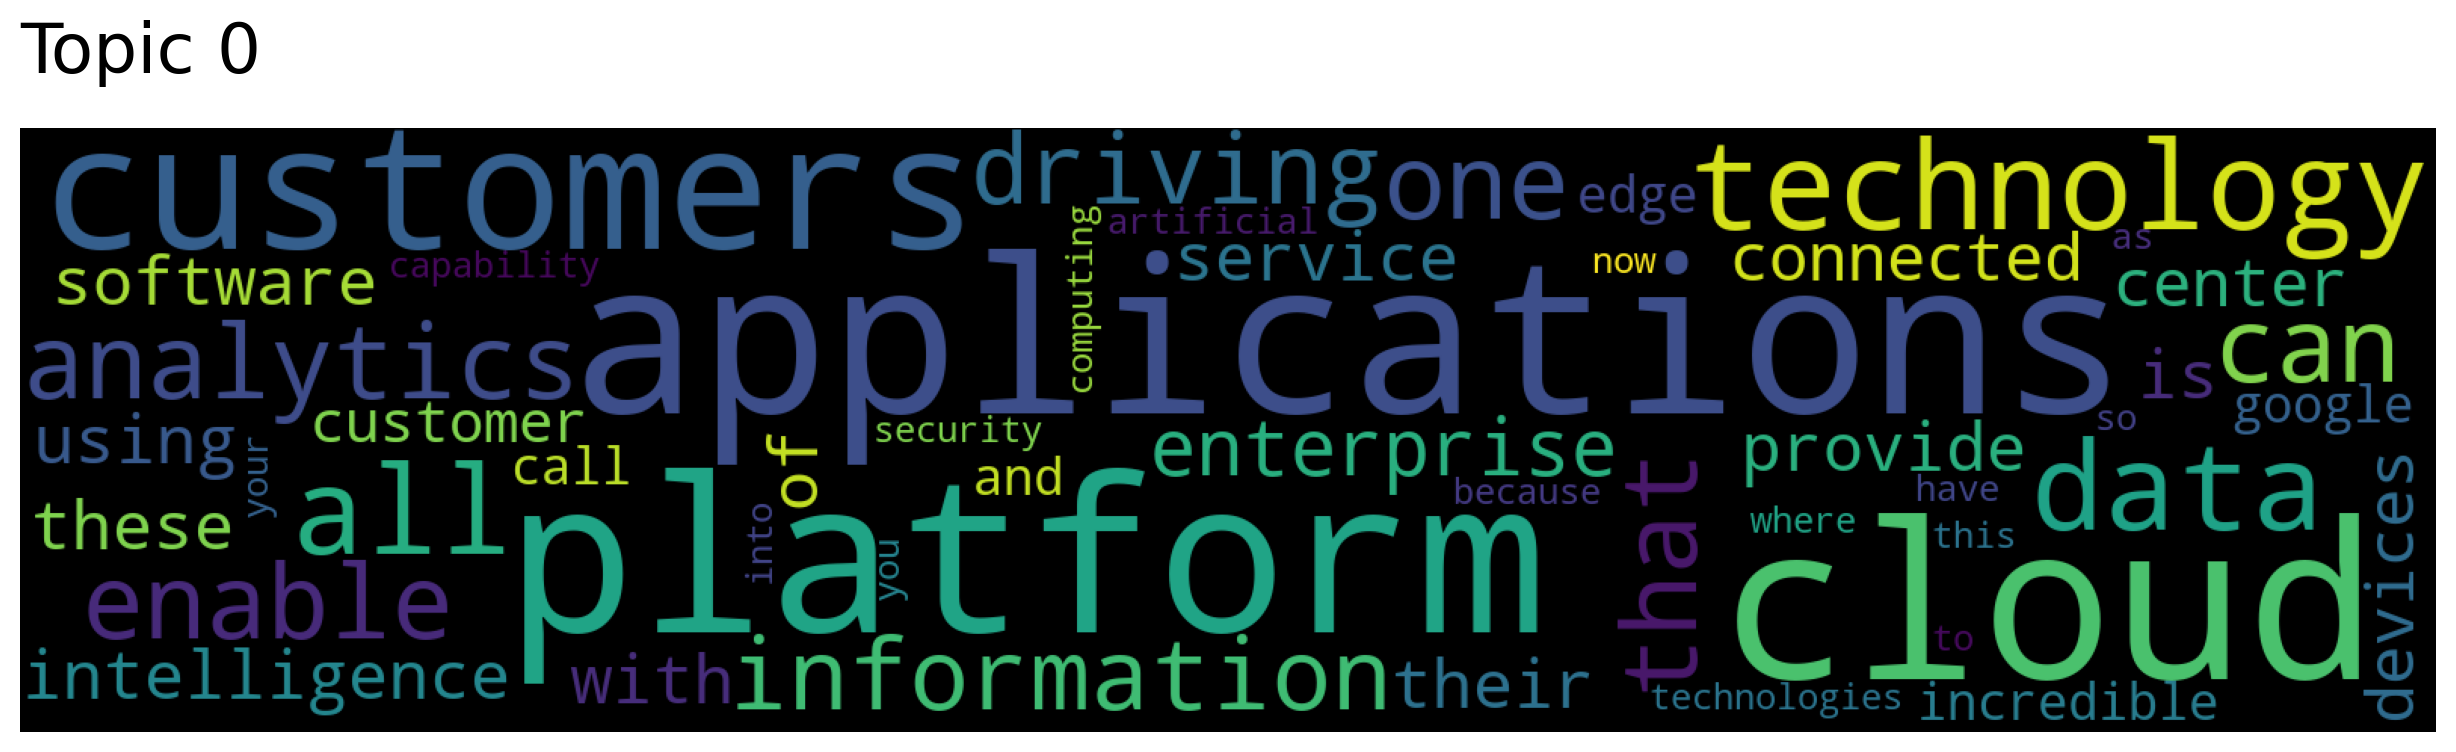

In [13]:
model.generate_topic_wordcloud(0)

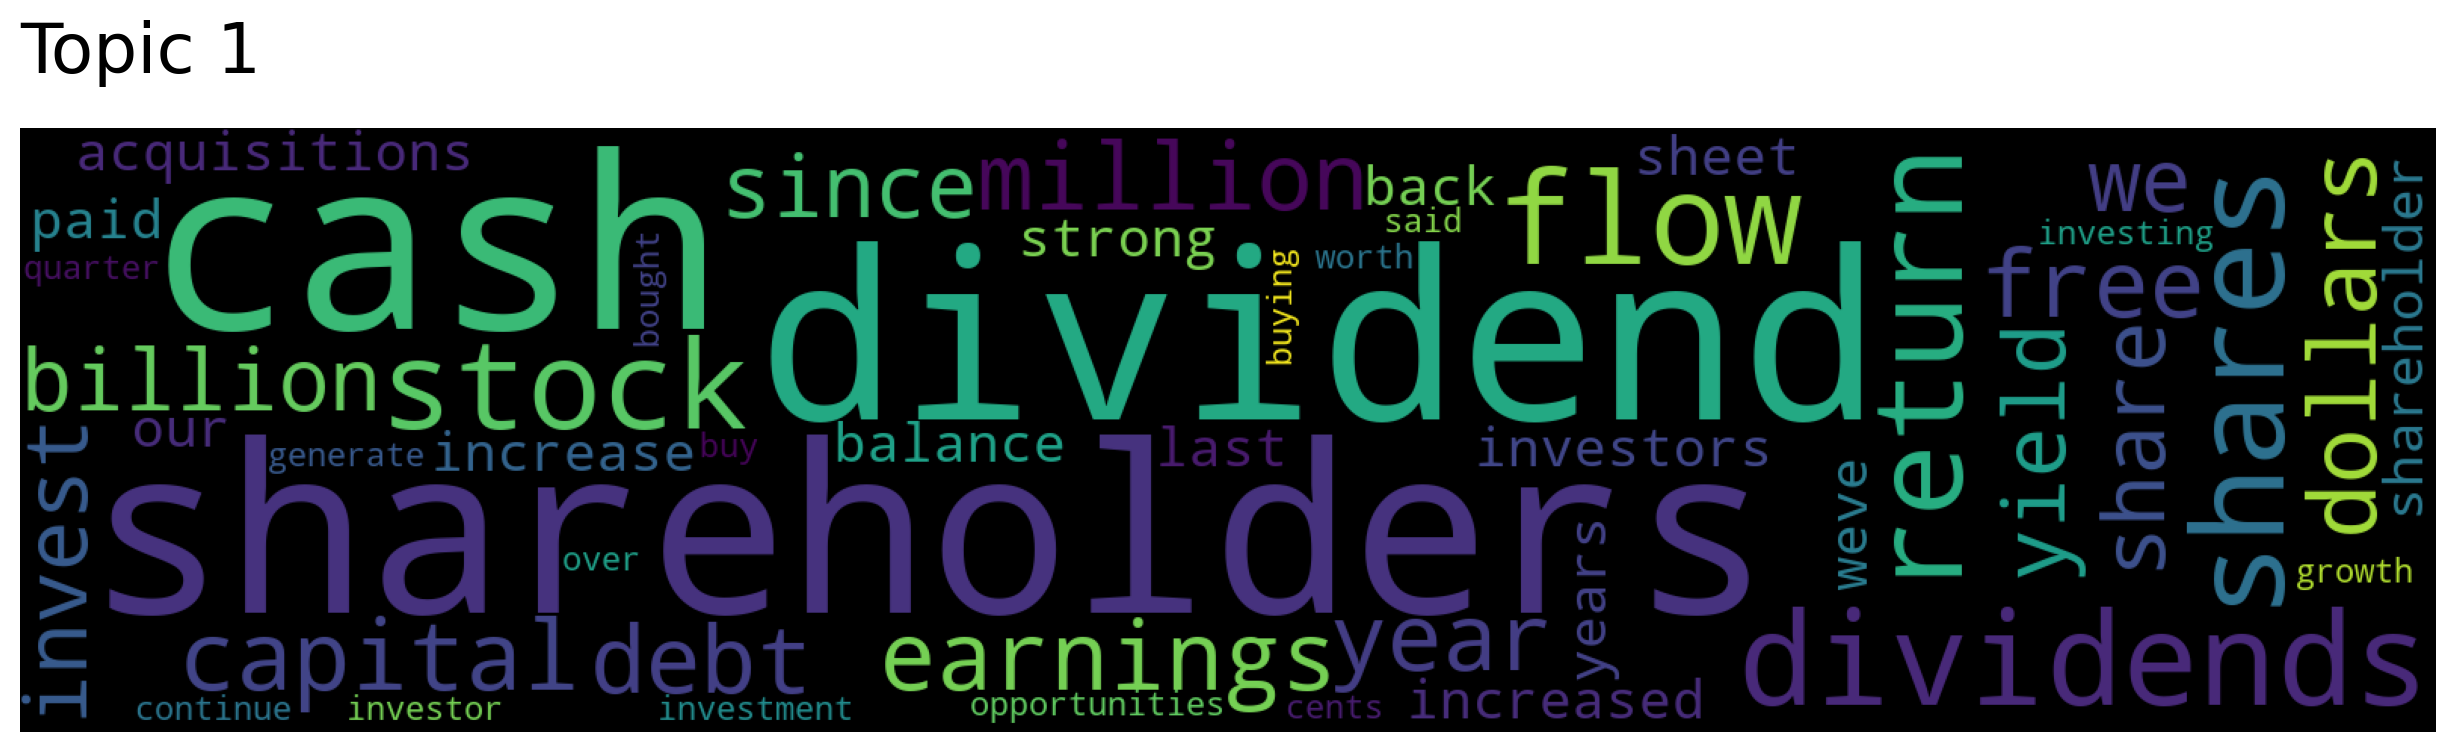

In [14]:
model.generate_topic_wordcloud(1)

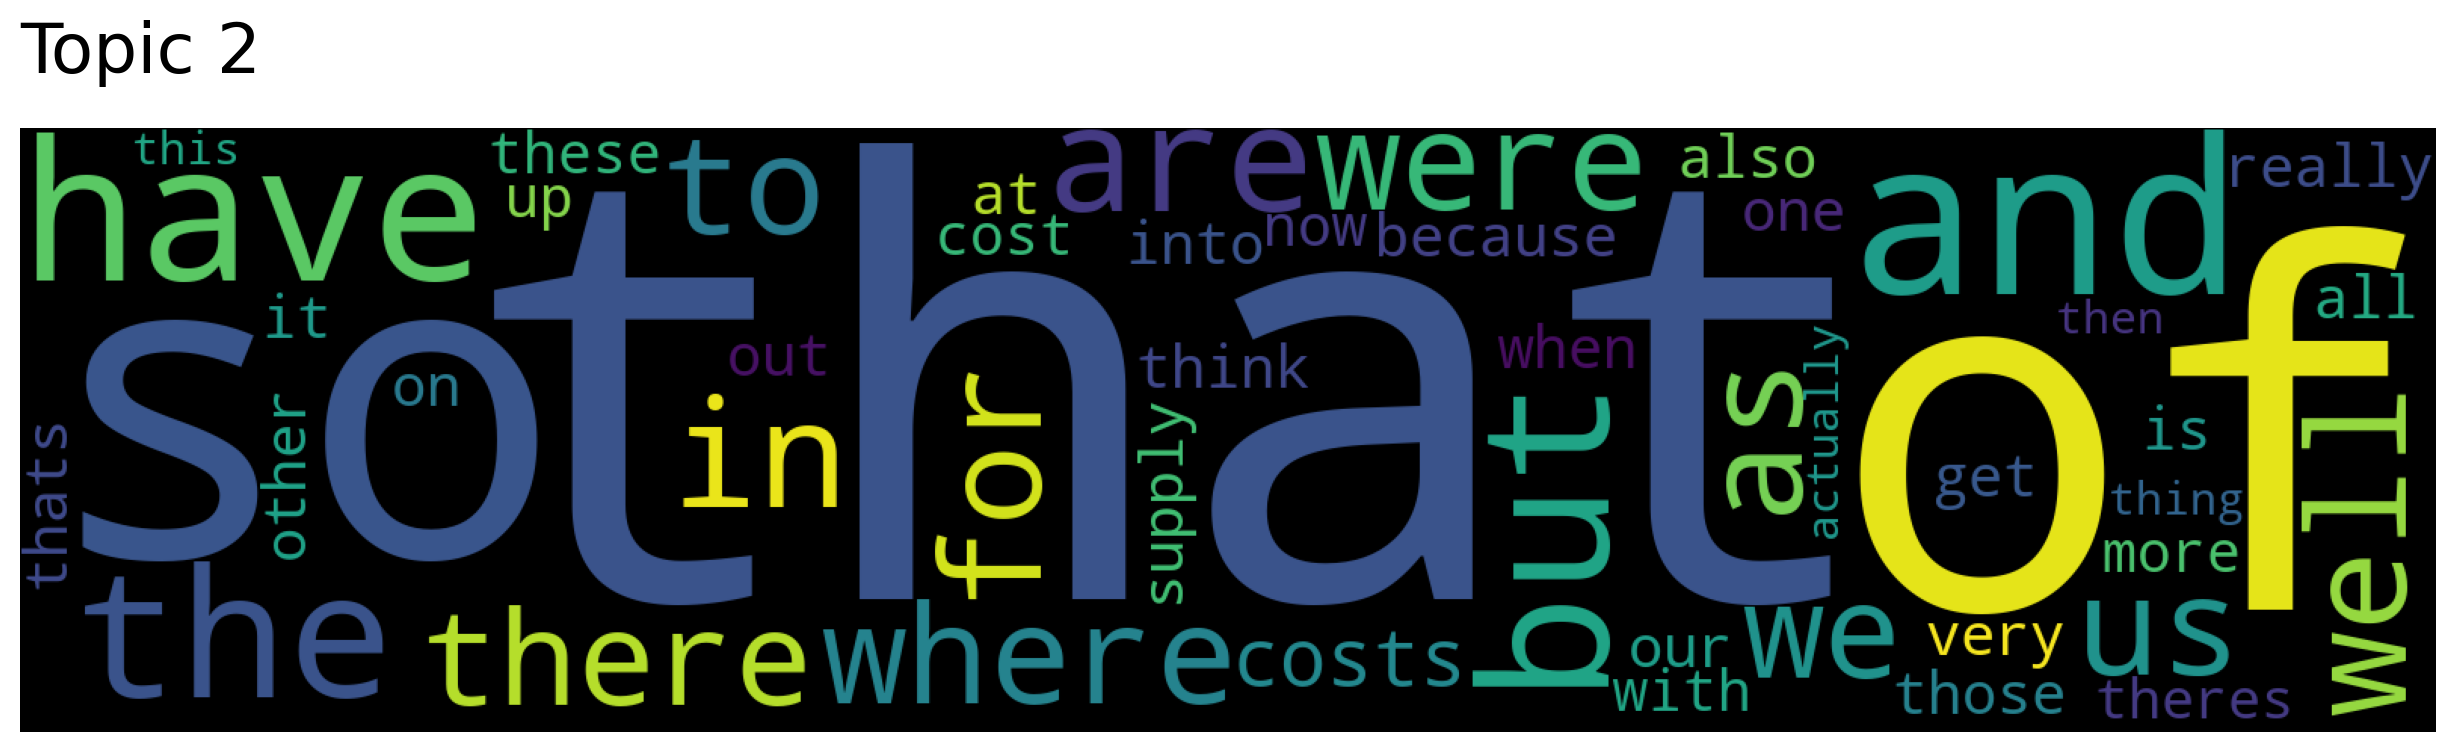

In [15]:
model.generate_topic_wordcloud(2)

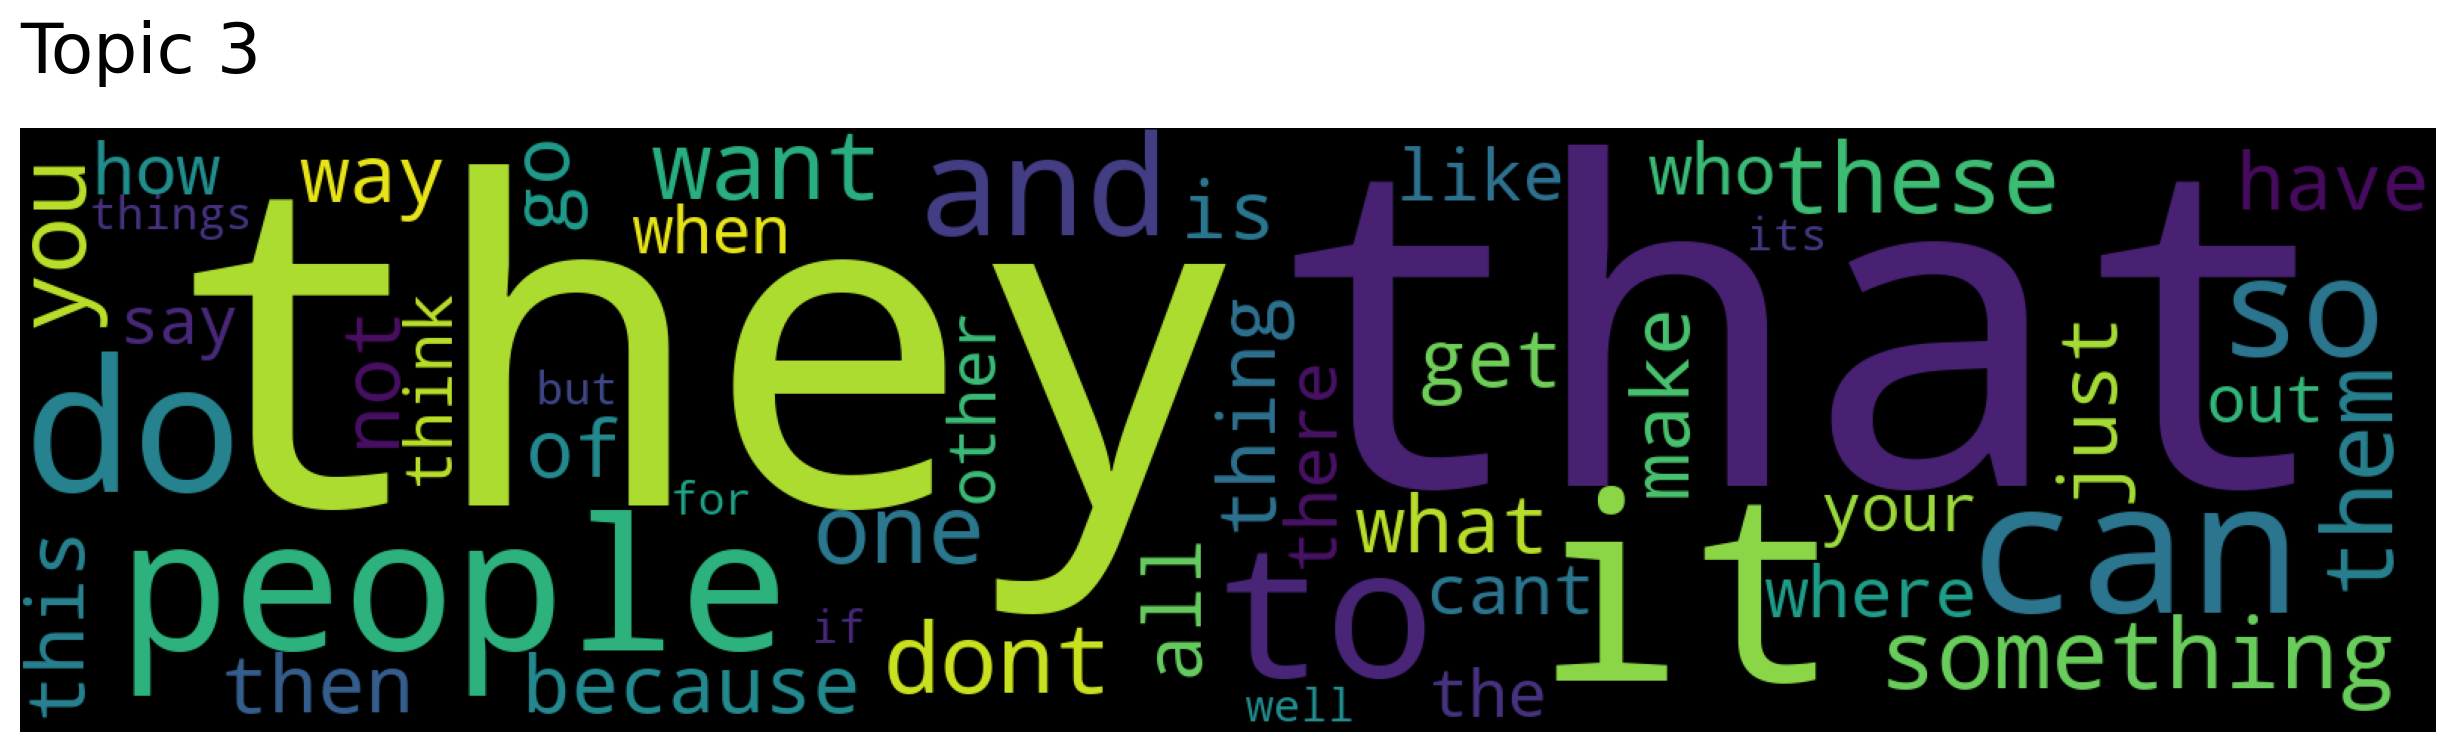

In [16]:
model.generate_topic_wordcloud(3)

### Getting the topics most relevant to the keyword in the descending order of cosine similarity

In [47]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["future"], num_topics=95)
topic_words, topic_scores, topic_nums

([array(['so', 'that', 'competitors', 'our', 'the', 'were', 'really', 'and',
         'in', 'for', 'industry', 'business', 'we', 'but', 'of', 'there',
         'thats', 'think', 'us', 'other', 'is', 'market', 'some', 'more',
         'share', 'certainly', 'very', 'at', 'big', 'do', 'theres', 'are',
         'years', 'well', 'one', 'as', 'have', 'when', 'to', 'continue',
         'into', 'its', 'over', 'weve', 'today', 'know', 'you', 'again',
         'going', 'been'], dtype='<U15'),
  array(['that', 'to', 'and', 'it', 'we', 'way', 'so', 'what', 'out',
         'when', 'you', 'of', 'one', 'all', 'this', 'have', 'do', 'think',
         'would', 'then', 'dont', 'go', 'the', 'not', 'want', 'is', 'had',
         'something', 'like', 'our', 'where', 'people', 'on', 'got',
         'didnt', 'at', 'just', 'said', 'was', 'well', 'actually', 'thing',
         'because', 'an', 'if', 'be', 'say', 'make', 'somebody', 'company'],
        dtype='<U15'),
  array(['cloud', 'applications', 'platform', '

In [49]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["quarter"], num_topics=95)
topic_words, topic_scores, topic_nums

([array(['quarter', 'fourth', 'year', 'quarters', 'second', 'earnings',
         'strong', 'last', 'saw', 'had', 'third', 'growth', 'guidance',
         'first', 'numbers', 'up', 'half', 'stronger', 'momentum', 'pretty',
         'weve', 'expected', 'record', 'continued', 'strength', 'revenue',
         'continuing', 'after', 'sales', 'still', 'see', 'bit', 'coming',
         'cents', 'increase', 'trends', 'we', 'months', 'fiscal', 'yield',
         'solid', 'digits', 'significantly', 'overall', 'currency', 'was',
         'mentioned', 'since', 'europe', 'were'], dtype='<U15'),
  array(['solid', 'quarter', 'earnings', 'year', 'growth', 'quarters',
         'strong', 'pretty', 'line', 'we', 'stronger', 'were', 'had',
         'last', 'business', 'fourth', 'first', 'yield', 'overall', 'basis',
         'still', 'that', 'the', 'up', 'digits', 'by', 'our', 'revenue',
         'momentum', 'continued', 'mid', 'after', 'numbers', 'guidance',
         'expected', 'so', 'strength', 'been', 'in'

In [50]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["profit"], num_topics=95)
topic_words, topic_scores, topic_nums

([array(['nice', 'so', 'away', 'really', 'when', 'out', 'and', 'that', 'we',
         'uh', 'you', 'of', 'some', 'where', 'into', 'it', 'very', 'up',
         'to', 'the', 'point', 'there', 'which', 'come', 'not', 'good',
         'after', 'here', 'management', 'lot', 'one', 'from', 'should',
         'time', 'years', 'give', 'year', 'for', 'having', 'back',
         'operating', 'last', 'way', 'probably', 'in', 'our', 'too',
         'sales', 'have', 'thanks'], dtype='<U15'),
  array(['gross', 'margin', 'margins', 'operating', 'increases', 'earnings',
         'pricing', 'profitability', 'growth', 'expansion', 'costs',
         'quarter', 'pressure', 'year', 'strong', 'profitable', 'cost',
         'significantly', 'basis', 'we', 'business', 'had', 'were', 'high',
         'line', 'so', 'up', 'low', 'last', 'revenue', 'grow', 'side',
         'bottom', 'sales', 'uh', 'revenues', 'still', 'our', 'numbers',
         'good', 'into', 'quarters', 'are', 'very', 'track', 'then',
         'v

### Getting the top 50 words per topic along with their size

In [53]:
for i in range(95):
    print("Topic {}:".format(i))
    print(model.topic_words[i])
    print(topic_sizes[i])

Topic 0:
['cloud' 'applications' 'platform' 'customers' 'technology' 'data' 'all'
 'analytics' 'enable' 'can' 'one' 'that' 'information' 'driving'
 'enterprise' 'intelligence' 'provide' 'using' 'their' 'these' 'software'
 'with' 'of' 'is' 'service' 'connected' 'devices' 'center' 'customer'
 'incredible' 'and' 'call' 'google' 'edge' 'technologies' 'capability'
 'now' 'as' 'have' 'security' 'where' 'computing' 'because' 'this' 'you'
 'to' 'your' 'so' 'artificial' 'into']
481
Topic 1:
['cash' 'dividend' 'shareholders' 'dividends' 'shares' 'flow' 'stock'
 'return' 'capital' 'earnings' 'million' 'year' 'free' 'debt' 'dollars'
 'billion' 'since' 'yield' 'invest' 'we' 'share' 'acquisitions'
 'investors' 'increased' 'balance' 'weve' 'paid' 'increase' 'shareholder'
 'our' 'strong' 'sheet' 'back' 'years' 'last' 'investing' 'investor'
 'quarter' 'cents' 'worth' 'generate' 'buy' 'buying' 'opportunities'
 'growth' 'investment' 'over' 'bought' 'continue' 'said']
336
Topic 2:
['that' 'of' 'so' 'and' 

### The below code gives the topic with the highest cosine similarity to the doc

In [54]:
model.query_topics(df.line[0], num_topics=1)

([array(['thank', 'thanks', 'appreciate', 'profitable', 'sheet', 'returns',
         'having', 'range', 'franchisees', 'am', 'shareholders', 'success',
         'ahead', 'land', 'jim', 'fiscal', 'feeling', 'domestic', 'shares',
         'nice', 'within', 'shareholder', 'balance', 'team', 'individual',
         'cash', 'proud', 'unit', 'competitors', 'challenges',
         'international', 'sometimes', 'optimistic', 'others', 'growth',
         'tried', 'stronger', 'expected', 'share', 'me', 'margins',
         'successful', 'yield', 'hey', 'investors', 'flow', 'much', 'told',
         'leadership', 'needed'], dtype='<U15')],
 [array([0.5151292 , 0.38540956, 0.32250836, 0.26992205, 0.25362062,
         0.22432071, 0.20403479, 0.1838801 , 0.15582202, 0.15109567,
         0.14820664, 0.14251696, 0.13784914, 0.12739001, 0.12503009,
         0.12004545, 0.11378542, 0.1106286 , 0.10704407, 0.1003809 ,
         0.0978105 , 0.09741949, 0.09699623, 0.09481592, 0.09474876,
         0.09333957, 0

In [55]:
model.query_topics(df.line[34], num_topics=1)

([array(['tariffs', 'trade', 'fair', 'think', 'would', 'that', 'not',
         'administration', 'dont', 'steel', 'but', 'china', 'impact',
         'theres', 'economy', 'of', 'so', 'this', 'the', 'american', 'when',
         'issues', 'some', 'will', 'are', 'there', 'have', 'it', 'because',
         'to', 'us', 'is', 'situation', 'manufacturing', 'for', 'no', 'go',
         'states', 'certainly', 'united', 'at', 'something', 'people',
         'deal', 'in', 'through', 'and', 'need', 'optimistic', 'always'],
        dtype='<U15')],
 [array([0.64230156, 0.6199321 , 0.6135441 , 0.5467897 , 0.5431297 ,
         0.53883106, 0.5167454 , 0.51593685, 0.5136746 , 0.51197296,
         0.50938237, 0.5067461 , 0.49548155, 0.4938084 , 0.48651034,
         0.48251408, 0.4817116 , 0.47661865, 0.47558403, 0.47302833,
         0.47193775, 0.46869218, 0.4675079 , 0.46675435, 0.46626493,
         0.46422973, 0.4628001 , 0.46265894, 0.46222237, 0.46158937,
         0.46001488, 0.45994994, 0.45704544, 0.4

### Finding the topic closest to each CEO response

### Using Uncleaned Data for this

In [31]:
data=pd.read_csv('CEO.csv')

In [32]:
data.head()

Unnamed: 0  index                                        video_title  \
0           0      1  3MCEOAddressingSoftnessinChinaAutosandElectron...   
1           1      3  3MCEOAddressingSoftnessinChinaAutosandElectron...   
2           2      5  3MCEOAddressingSoftnessinChinaAutosandElectron...   
3           3      7  3MCEOAddressingSoftnessinChinaAutosandElectron...   
4           4      9  3MCEOAddressingSoftnessinChinaAutosandElectron...   

  speaker_label                                               line  \
0           ceo                                          Thank you   
1           ceo  jim first of all, Thank you for having me toda...   
2           ceo  struggles and this is, this is a playbook, we ...   
3           ceo  Part of our defensive position has been our ab...   
4           ceo  The 3M model is strong and what we're doing in...   

   start_time  end_time  length  num_words   time  
0       57.48     58.20       9          2   0.72  
1       77.81    115.89     685        126  38.08  
2      128.15    149.86     422         87  21.71  
3      164.34    199.01     593        110  34.67  
4      220.15    249.76     493         84  29.61

### Printing the response along with its topic 

In [33]:
topic=[]
for i in range(len(data)):
    print("Doc: "+ data.line[i])
    topic_nums=model.query_topics(data.line[i], num_topics=1)
    topic.append(topic_nums[3][0])
    print(topic_nums[3][0])

Doc: Thank you
12
Doc: jim first of all, Thank you for having me today. Just a great opportunity to talk about the situation we face and let me start with what I said at the beginning, my earnings call, we are disappointed in the quarter that we delivered for three. Um and and it really was driven by some challenges we faced in several and markets that we have been talking about for some time and the declines in those end markets, china, automotive electronics accelerated as we went through february march. And while we took actions to get ahead of those challenges, we didn't do enough to offset it and our execution lead the weak productivity as the way we termed it and so we are taking action. Okay,
47
Doc: struggles and this is, this is a playbook, we know how to do when markets often when Macro softens, we lead into it, we see it in our end markets, we see it in our channel as they react to it, but we know how to take costs down with that and we're behind the curve in what we were do

55
Doc: business as you know, we go all the way from small companies, large companies and all the way from payroll to the foley HR outsourcing. Like we talked about with the, with the P E
55
Doc: balance. You're dead on your dead on jim, I think it's not only about job growth, but it's also about having a healthy, strong economy. I think if the Fed is, you've been saying for now several months, if the Fed tightened to the point where everything comes to a halt, that's not good for anybody, it's not good for ADP. So yeah, we like increasing yields, but frankly yields were coming up with such a low that we still got a little gas in the tank with where they are today because our portfolios laddered. So we still have some gas in the tank in the next couple of years and we'd be really happy if this results of the fed pause results in a strong economy that endures here for a couple more
50
Doc: What's a great question cause I think is unprecedented in terms of how long that shutdown lasted. 

12
Doc: absolutely believe in the long term growth there may be some short term dynamics, but at the end of the day with all of the data that's out there and all the compute needs, it is a great market and it really appreciates great technology. And so that's where we differentiate ourselves really focused on sort of high performance computing. Now,
64
Doc: Well look, I totally believe in margin growth as well, you know, and as I said, this is a journey. You know, we grew margin five points year on year in the first quarter. Now that's a pretty good move. And so the way we look at it is, um, as our products get more and more adoption, we will grow our margins and our long term target is, you know, 40-44%. I think we're making good progress towards that and more importantly as our products get adopted. You know, I think we have just a broader business base overall.
31
Doc: We, we definitely believe that there is a strong opportunity to grow. And then as you look at our products as a new

6
Doc: they're leading their lives. What is that about? Well, we've definitely seen a shift in how physicians want to deliver patient care. It used to be that many physicians were either sole practitioners were part of a practice. You saw the pendulum swing to where they wanted to be employed by hospitals and and or have their practice acquired and so that's really created a different dynamic. It's actually been very positive for the physicians and that they can focus on what they love to do and what they went to school to do and that is deliver quality patient care but it's created a new dynamic for the health care organizations and they really now need to be cognizant of how they staff those physicians if they should have a vacancy and vacancy is up, vacancy is up in physician nursing all areas and you
6
Doc: Absolutely wow,
93
Doc: fire. Well, we've seen a tremendous increase in demand in particular over the last couple of quarters. And it's not surprising we have really strong macr

14
Doc: right jim. I mean what is really unique right now about our digital experience solutions is that we have the first smile and the first mile is content management. It's the web infrastructure, it's mobile applications that people used to engage with enterprises and we have the last mile in commerce, that's the magenta acquisition that we did a while ago, which enables you to make every experience shop, herbal Magenta had a great quarter, we grew that bookings 40% year over year in Q3 and so I know you talk a lot about your rule of 40 Jim we're blowing that away when you think about our growth rates as well as our margin.
47
Doc: Well, we do look forward to the meeting as you point out jim that's when we lay out, you know, the growth opportunities ahead of us. We talked last year about how we had a greater than $100 billion addressable market opportunity. You know, we're growing the top line 20% R Q four targets Show that revenue growth will be north of 20% with the EPA's growth 

27
Doc: our mission as a company. Jim is pretty simple. We want to change the world through digital experiences. And so when you think about the fact that everybody has a story to tell From a k through 12 students to the largest enterprise in the world and this story is being told across new media types, new devices and we have just completely reimagined the creativity process at max. We showed a whole bunch of new products. We think that tablets should not just be consumption devices, they should be creation devices, wherever inspiration strikes on a mobile device, you should be able to do whatever content creation that you have and the emotional connection then that we can enable every one of our customers to have when they tell that story? It's unbelievably unique. And we think we're just getting started because when you think about artificial intelligence, we have tens of millions of people who use our product. We have hundreds of millions of assets that are being created in our pr

44
Doc: You know, when you look at these markets, you know, you really see that people need more computing horsepower. I mean just think about gaming these days. I mean double digit growth, right? Whether you're talking about game consoles or you're talking about PC gaming or you're talking about cloud gaming, all of these markets like higher computing power and that's a great place for us to
44
Doc: You know, we needed to do all of these things right. Certainly the balance sheet was critical. You know, we decided to make the right investments and technology is all about making the right choices. So where are we going to invest? Where we're not going to invest? You know, at that time, three or four years ago, you know, it was mobile phones and tablets and IOT that were the sexy things and we were like, hey, we know that those are good markets but those are not and we focused on what we thought the future would hold for
15
Doc: cyclical. That's right. I think the key is we've got to pro

51
Doc: I'm almost sure that the president didn't know that so well,
51
Doc: He was that they would react like this. Okay. I think it was a surprise maybe, maybe not. I don't
92
Doc: you got a bargain I bought and earned. Of course. Also, so to say, I'm close to owning a million. So all you want a
63
Doc: Russia is okay. So the problem with Russia is it has by far more potential than it's really showing. Uh, and, and people that say, what, what what is good is you can now own land privately. So that means farmers can securitize investments. So that's slightly better, but it's still slow and it's difficult. We have a very good joint venture partner there. So therefore we, I think we are growing, uh, step by step, brazil, brazil is okay. A lot of pressure in the marketplace still, uh, insecurity. The government farmers are not really confident about the new president so much. While in general, I think they support him, Germany Germany is doing pretty well, of course the german farmers ar

23
Doc: We're less than 10%.
43
Doc: more room. Yeah, Exactly. And I say less than 10% to say your daughter is you know, young young woman that's hard. 24. Yeah. In that marketplace we have about 25% of the market from a team standpoint. We have less than 10%.
94
Doc: in North America.
13
Doc: Yes. Well from, you know, we look at it or I'm talking about orthodontic penetration. When you look at GDP penetration, we don't measure it that way. I mean it's wide open. That's where the 300 million patients globally are 100 million patients in the United States there in those hygienists chairs often in the G. P. Office and GPS can do this. You know, the simple cases often to address those patients needs.
69
Doc: Yes. Yes, we were up 41% year on year with teens. We see good strength in North America and overall from a Pacific and also a mayor region also. So that's that's our most underutilized segment also gym and we have great new technology, mandibular advancement that we talked about the l

5
Doc: full where I
93
Doc: they should buy this
93
Doc: plane and what people pay to be on the appliance. Uh, in some cases, it's incredibly intensive, competitive business. Uh, you know, a lot of the fares are in many cases. Um, you know, if, if the entire airplane was full of the lowest fare, we wouldn't come close to covering the cost of the travel. Um, so, you know, it's, it's competitive and so it's a tough business. That's okay. We're okay with that. But it feels a lot better of late. Um, and demand for air travel is really high. Uh, and strong and continues to be. So we feel very good about, I think finally on this, cause I'm
44
Doc: Yeah, I mean, again, we have, we have a lot of, a lot of initiatives going forward um and in some century, right, we're catching up with the rest of the world when you, when you integrate to airlines, uh it sets you back on your technology because we gotta take two systems and make them one. Um so we had to integrate. Not innovate was the unfortuna

9
Doc: Yeah, so, so obviously, uh, in our territory, the central Ohio area is really growing very quickly. Obviously the oil and gas territories in texas as well. And these are areas where you're seeing deployment of technologies around oil and gas activity, but also in terms of the urban setting with our smart cities project in columbus. It's been very positive to drive investment and really focus on society being in a much better place.
9
Doc: Thank you. Jill.
12
Doc: good to be with you jim.
7
Doc: Yeah, a couple of reasons. We have a strong weather year obviously last year, but also for the quarter, we continue to see increases in load. Last year we had the largest increase in energy demand since 2011. So, uh, certainly the economy continues to buzz along albeit it was stronger at the first part of the year than the latter part of the year. But still, uh, it's continuing a relatively tempered base.
68
Doc: Yeah, I think, I think there continues to be advancement of the economy. Obv

9
Doc: yeah, absolutely. You know, we have been working on Ohio and its ability to be able to invest in long term generation. So we offered up an arrangement which was approved by the Ohio commission but the, the federal Energy regulatory Commission had concerns about it because it tended to move into federal jurisdiction. So in order to avoid a federal jurisdictional dispute made the case yesterday that Ap is moving forward to be that premium regulated utility. Our foundation is built upon transmission distribution infrastructure and regulated generation. So in Ohio we're gonna be going through a strategic process associated with the unregulated generation because that provides volatility and our our investors aren't interested in volatility. They really want that constant dividends and earnings growth. So we're looking at the disposition of those assets and part of that is being brought back into play in Ohio and that's why I said certainly we wanted to try to either reregulate in Oh

84
Doc: Thank you. Jim
12
Doc: Good to be back with you. Jim All
7
Doc: Yeah, So the quarter went great. We reported, we beat the earnings expectations for the quarter, uh, load is moving back up. Things are looking great. We continue according to plan. Uh, but as you know, the, the sector is down considerably, but we want to make sure that ap is positioned as part of that portfolio that you want to keep.
41
Doc: That's right in our business, the regulated utilities, our tax taxes are passed through to customers. So to the extent there is tax reform, which there has been, the tax rates get lowered, that gets reflected through customer rates and our customers will benefit from that and will benefit by the expansion and growth associated with it.
54
Doc: That's right. Our industrials last quarter drew grew 5.6%. And actually, for the first time we're seeing across the board, uh the industrials continue to grow, our top five grew 11%, which was led by primary metals and by chemical manufa

59
Doc: Sure. R. I. P. R. Intellectual capital is based on how on first of all how to create very complex but very sort of mutually beneficial master lease agreements with these big national multinational operators. That's one thing we think we're very good at where there's mutual benefits to both very long term. Uh and you can set those up and use that intellectual property that you develop, say in the United States overseas we can export our I. P. Just like a manufacturing company Secondly we've got an organization that's been in place for many of our people 15, 20 years. Just in this business we've got really great retention rates and our employees and our managers and again they can be moved or signed temporarily to new countries and build and bring that intellectual capital. There's really no other organization in the world that's like this. We're on five continents, 13 countries, all the largest free market democracies in the world. We've got
17
Doc: Well, yes, we are and we're t

62
Doc: Yes. Yes. You know, there's no bigger privilege in the world than to work at this company at this moment in time and to be able to work with all the great people I get to work with every day. It's it was beyond my wildest imagination. And there's not a day that I don't go by that. I thank God for it.
21
Doc: Want to get her a new phone, I would suggest you get her an iPhone seven or an iPhone seven plus because they're extraordinary. And uh, you know, I'm getting all these photos from people that are using portrait mode on the seven plus. They're unbelievable. It's like we've all become professional photographers.
43
Doc: know? Because it's always something that you didn't expect. You know, who thought you could better photo like a portrait won't matter. You know, the current ones are better than the previous ones. And uh, and you know the airpods, I get so many emails every day about airpods. What were they supposed to be?
3
Doc: now? People that are using them. They really lo

18
Doc: You know, I didn't really worry about what people are saying then because I care very much about our users and I strongly believe that if they're happy over the long term, other things will take care of itself. And so we had a lot of confidence in its, it's good to be here today, but we don't really look at the stock, you know, because for us it's about the long term and so we're very much focused on long term shareholder value, but not the short term,
64
Doc: Well, I just thought it was absurd. Okay. And people just not not understanding the company,
5
Doc: Yeah, I, I look at that honestly. And we had a great quarter. Uh, if you get into the numbers just a little bit for a few minutes, uh, the Mac grew 14%, this was huge. Services continued this uh, Really fast growth grew 18% year on year and we continue to be on target to be a Fortune 100 company this year with our services business. The watch almost doubled year on here. Iphone grew Uh, in revenue sense because the iPhone s

44
Doc: Well, jim many people talk about trillions of dollars of economic value being created. Technology is going to transform all of these different industries and in the Ai big data era there are a few drivers. One is everything is becoming smarter. You have sensor technologies Many, many smart devices that is growing our business about 40% of our foundry business now is coming from all of those smart devices. The memory business is also growing at a rate that we've never seen before. All of these smart devices are creating a tremendous amount of data. Data is exploding. And the memory business is growing at again, a rate we've never seen. The profitability of memory companies is better than we've ever seen. And also to really capture the value, you have to take the data and process it with high performance computing and that the fundamental technology for high performance computing and Ai. Those materials come from applied materials. So these smart devices, the memory technology, t

52
Doc: That's right shortly after I came on. Um, you know, we went through a full assessment, created this transformation strategy that we said would be over in the second quarter 17 of course, one of the gifts I got shortly after being there was discovering that we had to restate nine years with financial.
17
Doc: that exact, but neither be that as it may. What it did allow us to do is accelerate some of the investments we're making during the time period where we had to go back and re states for about 18 months or so. We've got to listen, we have to get relisted and as we came back as a public company, we were kind of halfway into this major transformation, hard for in a public setting for investors to follow all the moving parts, those moving parts of starting diminish, we've said the end of this transformation 17, midyear, you're starting to see with every given quarter real progress, you've seen platform sales up last reported quarter up 47%. You've seen four times growth on our 

41
Doc: So one of the things that we get with the service relationship and partnership is they will be investing $435 million dollars into the parent company that allows us to reinvest in the business and pay down debt.
15
Doc: business in the short term. There are some challenges right obviously. But if you look at the Brazilian beauty market, women love beauty. I mean everywhere in the world women love beauty and we're in it for the long term, we are still growing our representative base. So women are still coming in. They love the products, they want, the earnings opportunity. And so if you look at the health of the brand, it's still very strong. Is it easy to do business there? No, but at the end of the day, we believe that this is going to continue to turn around in the long term, the currencies will shift.
22
Doc: one of the things women are still looking for jobs, they're looking for money. Good point. So in some ways it's helpful because people need that opportunity to earn?
74

28
Doc: right? It's a cybersecurity is critically important. I've said on on your with your colleagues a couple times that that's one place. There's no we're fighting expense battle to keep it underneath the revenue. There's one place that we just never not spend what they ask which is in cyber security but the key is is to have that device secure because if our mobile phone, people doubted that they can transact security, there's about seven or 800 branch equipment activities. So we have to build 700 branches again to take the activity back into the banking system and you just don't want to do that. So cybersecurity incredibly important. The safety security, the belief that their data is there and then you know the flip side of it is using that data appropriately. Yes. Do we let customers know that we have other capabilities they could use. Yes, but you got to use it in a way that they take you, you present it and they take it as opposed to uh get too intrusive in our lives. Right?
16

84
Doc: So he is and as you know, there's been a lot of debate about the the Nevada joint venture and that is a large part of the missing billions. So I think you know, maybe he's being a little defensive on the bigger deal, but what he has said to the market and what we are engaged with right now is can we find a way to deliver real value out of Nevada where all this conversation started and then we can worry about the rest later.
82
Doc: you know, Jim the one thing about mining is high quality assets, make money. You start with the top line at its highest and you can't make serious superior returns. If you don't start with great assets, we had two great assets, Barrick had three great assets and the potential to deliver two more Newman's got a number of really top strike flight assets and that is the dominant collection of tier one assets. So we, as leaders in the industry, oh, it to look two ways to maximize the return. And, you know, the industry also needs a real genuine introspec

26
Doc: That's what happens today. Now I've heard so many stories for example of the conflict in the Middle East and and our veterans there that are doing the hard work of the country and when they're pinned down or in a dangerous position and they hear the sound of those Apache helicopters coming over the hill right. They know they know their lives are going to be saved and that's part of what makes our business work.
51
Doc: Well, we've had a great relationship and I'll tell you what, the thing I love about President trump is, he's, he's really focused on helping business succeed, right? We've got open communication lines, He's taken some of the actions to help us drive economic growth. I think the work on tax reform, uh, the work that's being done on regulatory reform is very important and just having a seat at the table I think is so important for business today. And so we think about what's going to benefit the economy of this country, how we're going to create great manufacturing

94
Doc: camp. Absolutely. And we've mapped that, We've mapped out the whole country, state by state, uh and we've gotten to a number of exactly 202 150 doubling too, 500. So we think we can double the store count soon to be in pennsylvania. So we're getting closer and closer to new york and hopefully have investors going see, I am
19
Doc: it is part of it is so what, what pays the bills really is a a boot that is this a western boot, but it's worn every day, it's got a rubber sole bottom and it's a functional purpose. Now from a fashion perspective, we do have some brands and some styles that, this is a boot that we brought out under the idle wind by Miranda lambert line and this is a fashion boot, right? Absolutely. And we're excited about the launch of idle wind and its growth and it's been really nice contributor to our overall sales growth. But the most of our product is commodity replenishment staples. Our customer doesn't go in looking for Western, where they're going, looking fo

Doc: Great to be back Jim. Thanks.
19
Doc: Well jim what you're seeing is really the results of a lot of hard work by our team. When you go back a few years, we rationalize some product offerings. We went ahead, took some capacity out. So what you're seeing is a lot of the cost come through, the cost savings come through. And at the same time we were working on a lot of innovative products. And so over the last two years we've come out with more innovation than we have in a long time and that's starting to show up in the margins too. So it's really the execution of the strategy and a lot of hard work on the part of our team.
31
Doc: Well yeah, if you look at the last few years, obviously the housing market being down um, has had an impact on us because when people buy new homes or they buy existing homes that are first time home buyers for them, for example, uh they need power equipment and they want to take care of their their their investment. And so basically what we've seen is with

0
Doc: Well, one of the big part of the dude allegiance we did was on uh, was on the receptive product as animal.
82
Doc: And as you know, Celgene has said, they're getting ready to re file that we believe that's an important part of the pipeline. It goes beyond those animals. But obviously that is an important part of our pipeline. So it's about new medicines to patients. This is a great company. It's a great transaction and I am very excited.
62
Doc: like. Well, first of all, thanks for having me. Of course it's a great time for us at really important moment. The new bristol Myers Squibb is a leading BioPharma company that can transform the lives of even more patients through science. Uh we have the number one cancer company in the world and leading franchises in cardiovascular medicines and other immune disease. A lot of really good things have happened this year and in every one of our franchises, we have leading brands growing businesses were working on seven new medicines to laun

64
Doc: instantaneously it's one of the benefits of scale were a national landlord to all these retailers. We've taken the time to negotiate foreign leases with them. And so you know where we can get people open in less than 30 day are not open but signed in less than 30 days and then open quickly thereafter. It's a real opportunity just can't
75
Doc: a great opportunity. We've gone from Some an industry where we were producing 200 million square feet a year to first quarter 1.2 million square feet of new retail space in this country. So it's really a great tailwind for the business and that lack of supply gives us really good pricing power
8
Doc: very focused on where they see value and they think the stock is cheap at these levels and we don't see him as a seller here. They'd like to continue to sell at higher prices
24
Doc: Yes, we just Did a bond offering just last week, 3.8, on seven year money replacing Close to 6% debt. So real opportunity for us to continue to make progress on 

27
Doc: Right? So absolutely is the younger audiences. It's more, it's not so much the ownership. And a lot of people keep thinking about boats as a rich man's product. It's only for the wealthy. Uh, we make products for middle class America. Absolutely.
60
Doc: Yeah, I think, I think the fact we took the guidance down a little bit, talks about some things we're seeing in the market place that may continue a little bit more so in big boats and the fitness segment, but a reminder of the vast majority of our businesses someplace else and it was doing extremely well. Well
41
Doc: Well the fact we took the guidance down says it doesn't turn within months but we're, we've got a number of things, we've got a great new line of cardio products that is coming out that were part of uh, you know, we also from the standpoint of uh things were doing on the standpoint of customer solutions moving beyond just the pure product. So at a recent analysts day here on November seven, we had an opportunity 

52
Doc: We love that then it's true. Well, we we have number one market share of the United States in any high end club or in any self health club if you will because our equipment goes in, it works forever. Doesn't break down. So if you're in a 24 hour fitness where you want to swipe and go in, our equipment is going to be there to take care of you.
10
Doc: Assumption. Yes, it is. We spend 3% of sales on R&D. You're in and you're out. We spend 4% of sales on Capex. But we, we allocate 65% of that Capex on new product, new models, expansion, things like that. So we very quietly file lots of patterns, especially in our engine business and our fitness business then followed a bit voting business.
52
Doc: we have one. Uh, we've been testing it for years at, at the Miami boat show. People aren't buying, uh, they haven't gone there yet. Why not? So we're waiting on this. They
44
Doc: They'd like to smell the diesel, the field of the engine. They feel there's a little more independence if if

56
Doc: this, they can focus on their strategy, our strategy is to help them do better with their strategy by providing them with better real estate
56
Doc: done. We do it for hundreds of companies around the world. We do it for hospital systems, we do it for government entities. We save them money, we help them operate better
19
Doc: Well jim it's our acquisitions but it's also the organic growth that we've had in those markets and it's following our customers around the world. All three of those things. We've had a lot of talent, a lot of capability taking market share. All of those things that help us have helped us to do well. And of course the U. K. Market in London performed a lot better this quarter than they did a year ago.
11
Doc: Well we certainly helped them with all their real estate needs. So we help them find locations, we help manage locations. We do pretty much everything they need in the real estate arena. That's our outsourcing business that allows them to focus on th

4
Doc: Well the U. S. Is a huge market and real estate fundamentals are good. This you know all this concern about real estate. Here's the
56
Doc: for the facts are the following, rental rates are going up occupancies are going up
46
Doc: Other. I'm 30, almost 35 years in the business. Unlike any other uh time in the industry for me. Any other cycle I've been through? Not a lot of new development. Well, that's what
56
Doc: Well, it's good for a lot of people. It's good for owners in real estate because you don't have, it's good for finances of real estate. It's good for service providers like ourselves. We have a healthy market. This has been a slow growth environment, but a long growth environment by the way, we think it's gonna keep running for a while. That's been a really nice thing for real estate because it's, it hasn't caused over building, it hasn't caused interest rates to spike and it's caused companies to remain confident that if they do something that they will be good resu

61
Doc: Well, you're right. I mean online is just amazing and our customer is voting and saying this is how we want to shop, which is why we accelerated our whole omni channel strategy, which we call one pier one. But Jim the amazing thing about this and this is what's so cool. About one pier one is 50%, of our sales are actually touched by the store in some way or other. So what I mean by that is 25% of our online sales are booked through the the pcs that we have in store and we're putting more of those in and 33% of our order online is pick up in store. So that's very a very sort of powerful, very powerful model and we see the stores and the online business is inextricably linked. They really sort of play play together. And that's what our customers like now having said that on the margin are we going to take a very, very close and, and hard look at our store portfolio. Absolutely. And there may be some three store markets that only should be to store markets and maybe some seven sto

76
Doc: No, I don't think about, it would cancel trips even last year when the hurricanes were in the Caribbean vs the panhandle. They didn't cancel their trips unless it was just in the port, they couldn't get to to get to the ship. But the reality is that every year there's hurricanes, typhoons and cyclones, somewhere in the world, you know, and we've been in this business for 45 plus years. Um, you know, hurricanes are just something that happens, we sell to over, You know, 700 ports around the world. We have 100 and six ships we had two or three ships that has some minor rerouting. But for our business, it's not a major impact.
36
Doc: the case. So it hasn't been the case. Jim, you're right. We set a record in our last quarter, the biggest quarter in the history of the company. We've had consecutive years. We raised earnings expectations, etcetera. So all that's true. Our business very strong where we do have capacity increases as we shared in the quarterly call. Um, and in many pl

17
Doc: Thanks. Jim
19
Doc: Thank you, jim glad to be here.
12
Doc: No, the bid ask has come in and we're trying to take advantage of that. So really the main reason we did the equity offering is we have some deals in the works that were trying to close, none are guaranteed. But we think we're going to get some of those closed and maybe about half the proceeds would go to closing those deals, some that have production with them and then the rest of the capital could go to drilling on those deals next year depending on what oil prices do
53
Doc: that in the Eagle for for instance, we could drill wells for $4.8 million. That will break even at 40 to $41. I think 80% of our inventory breaks even at $41 or less in the Permian. The wells are more expensive, but some of the ultimate recoveries of these wells are higher than the Eagle ford. So we think that the break even prices are probably going to be in about that same area and that's why we're focused on that region.
86
Doc: We have done 

3
Doc: Cost. It's gonna say, have you seen the lowest number over 10 years is $25 trillion $38 trillion.
34
Doc: mean, the total budget for 10 years is 58 trip. But
90
Doc: Well, that's that's that's nice concept. What they're saying is we'll do with the insurance companies. The money we save there will help pay for government really is much more efficient than private enemy enterprise. It's not gonna work. I've not met anybody that believes it has any hope of being that the only way single payer works is a withhold services. Right? And americans are not going to accept.
19
Doc: Thank you Jim. It's great to be here.
12
Doc: The medical costs have been very stable. The trend continues to be stable. We commented the inner call low single digits as we have expected.
8
Doc: what is very
7
Doc: very good.
12
Doc: Well if you're looking for Dallas. We we have said quite all along that we will be helping them with their medical management costs as a result, some of the G. N. A. Will go up S. 

19
Doc: Way too expensive. All right. We can't afford it.
92
Doc: don't like it either. All
82
Doc: You're right. There were a couple issues that I don't think people took time before they wrote the notes and questions to understand one was the taxes the tax rate. If you look at the gap, we had like a $24 million dollar text If you look at the adjusted it was 490. Okay. Now. So they said you looked at 24 said you had a tax better, but we didn't, what happened is we took a deduction for the closing cost for Fidelity Fidelity,
65
Doc: that we made earnings and they did exactly the second thing. They didn't, I don't think they fully understood. We had a one time game from a risk adjustment for the in home support services program that had been discontinued in California. Okay. We also had a one time expense on the veterans, a program that we shut down. and so the one was 140 million. Again, there was 100 and $10 million expense. Now we don't like to take one time gains and put in the earn

3
Doc: I think they'll have a lot of trouble because they're worried about the block pants. I'm fine with that.
17
Doc: We are because we're local. Most of them it's very centralized. You know, there's a big difference. Plus our systems, we have systems that we can manage it, we can work with the physicians. We put the physicians at risk, shared risk, but not at risk. They can't afford to take if they manage it. Right? So we have a lot of things that work for us. We have systems that predictably tell us how what's wrong with the patient where it's going. So we're supporting the doctors. You can plan that
6
Doc: Optima has some of that. Sure. But if you look at it to companies that are best position for this ourselves and operate actually
92
Doc: Well, what we're gonna do, they are great company. They're profitable. They do well, they have the right mission which is consistent with us taking care of people that need it. And so what we're gonna do is we're gonna give them systems that's 

87
Doc: Well, I'm not sure. I can tell you exactly why it was, uh, the right time and why they have traded the way they have. They're very good company. They they've they've done a nice job hydrating their portfolio. They've got good management and we'd like everything about it. It's a good company, good assets, good people and a good deal
94
Doc: in the Permian basis. We, we really like our position, the Permian, we like it even better now that we've been able to combine with or when we combine with with Anadarko's and it is, it is a great resource for our country and a great one for our company.
54
Doc: Years or decades,
16
Doc: We have, you know, we're right now drilling hundreds of wells. We see thousands and thousands of well locations and multiple benches that will be able to drill and the technology does continue to get better. The practices get better. And uh, and we see a lot of running room in the Permian
90
Doc: Well, it's a beautiful gas resource and we've operated in Afric

6
Doc: Thanks jim. Glad to be here.
19
Doc: Well, jim, that's a great question. I think I would answer that by different companies have different time horizons, some are private equity, some are built to flip. They're looking for an exit point at seMA rex. We have a long time horizon, we're trying to build a company of enduring value. We invest through the commodity cycle. So when we make investments at seMA rex, we understand the commodity can be up or down, we want to create real value, real measurable value for the long haul. So the ideal owner of Sima rex is probably a long term holder because we're creating long term value right?
64
Doc: Well, it's been an amazing couple of years Jim since the industry turned in 2014 and the oil price collapse, the industry has been remarkably innovative in getting more productivity out of our wells were taking advantage of the lowered costs as as demand is lesson than the service side. And so we're drilling wells today that are longer longer hori

88
Doc: Well, you know, I'll leave that with Kelly and our treasurer relative to how we're driving our share buybacks, but we're very committed to the, the shareholder return. We're committed to greater than 50% of our free cash flow and will remain committed to that in the future. Jim
1
Doc: Well, jim if you look at what we're, what I'm talking about when I talk about accelerating those things that are working to talk about our operational capabilities. I talk about clarity and simplicity and our culture and talent. The real thing about it is that there are times when we can just execute more effectively on something that is already working and so I think there are a lot of areas of our business that we will continue to accelerate. I talked about Muraki, I talked about collaboration, we talked about security on the call. We talked about how we're doing in the data center in the switching portfolio, our high end routing and service provider. So those areas, we will continue to accelera

54
Doc: Well, europe has got a lot of geopolitical dynamics that are creating uncertainty and businesses don't like to invest in uncertainty. Right. Right. And so uh I think the thing that's happening in the U. S. Is people are pretty confident that there are going to be uh you know, it's a good business environment right now.
56
Doc: Well, we had I think the fundamental issue is that um last call we had two big issues, right? We talked about service provider and we talked about emerging countries and emerging countries continue to be a child. We have seen strength in Mexico strength in India. And and then we have challenges. Although, you know, even Russia and brazil are beginning to show a little bit, a little bit of positive movement. But overall, you know, I think the general belief is that there's more optimism in the U. S. Economy and again, when the U. S. Economy is positive is good for the world.
13
Doc: jim, It's a pleasure to be with you again today.
19
Doc: Well, jim, I thin

54
Doc: Well, I think there's a couple things, kelly kelly is fantastic by the way, and she spells her name with a K. So there's definitely no relation, but she uh she has talked about there's a little bit of a headwind left, but it's getting a little better. And we're also seeing some of the, you know, the benefit of the software shift that we've talked about in our margins. And so our guidance was slightly higher relative to what we have been guiding on the margin side. And I think it's attributed to both those things, but we still will see a headwind, as she said in the next quarter, but we think long term will be able to navigate that.
22
Doc: Well, if you look in silicon valley, it's it's the third highest rate of chronic homelessness for a county santa clara County in the United States. And and look, the reality is is that we need healthy thriving communities and we need everybody to be able to participate in in this economic growth. And we need inclusive growth and that starts w

24
Doc: No, not at all. Really. Yes.
17
Doc: Sure. So it's a distribution business model or we sell into the service companies like the halliburtons the slumber days and the bakers, they rebrand it and then they push it out to the Anadarko's of the nobles or the apaches and that's the, those are the folks that use the
70
Doc: No, that's exactly right now. You know, all the numbers about how much employment has been created because of the Shale Revolution. And you know, we've gone in the last year and a half, probably from around 400 people to 530. We talked about this morning about how we have the highest number of revenue per employee and operating income for employee. We think in the industry, you do, Yes, we do. And uh, it's all about the people of flow tech that have driven the performance of low tech.
55
Doc: I don't think so. Jim. And I think the environmental, uh, effort has curtailed finding more and more that California's won your state here in new york's another that I think 

4
Doc: We have seen competitive price promotions in certain categories, for instance, are glad trash bag business is one of those and we're seeing that because commodities have been somewhat favorable and then what companies tend to do is recover lost market shares by reinvesting into trade promotions. We are not afraid to defend our business if that makes sense. And we have done some of that on glad trash bags, but we really take a long term view and we try to focus on being balanced and growing our business the right way and growing our business the right way for us means to invest in our brand equities and to invest in our innovations. And we're in the very fortunate position to have a lot of innovation in an environment that's really innovation starved and that's working well for us over time. We think that this price promotion will subside because commodities are expected to firm up over time. And we think that the business uh from a competitive point of view is going to return to

11
Doc: right, that's been a hallmark and we're here in the Bay Area and that of course puts us in a position to partner with world class companies to build capabilities to market and sell out products online e commerce business, which accounts for north of 3% of sales right now is up 30% fiscal year to date, A largest customer in the space was up 75% last quarter. So we have a lot of momentum because we're investing in innovation for instance, like britta's Dream which is here um that's an innovation that delivers 10 times faster performance, filters your water 10 times faster. And it's off to a really, really strong start in e commerce because consumers who shop online love this innovation.
11
Doc: Why? Because we have strong brands and because we bring dollars to them to invest in category growth.
15
Doc: very rough for
7
Doc: Yeah, we just announced this week that we've made an acquisition of a company called neutral Next. Uh it's business with a lot of leading brands in the fast g

28
Doc: Because we sell to each of them. I mean the some of the bottling system, they know who these 27 million are. I mean they literally are going to them every week there in a database. So really it's about how can we leverage this incredible asset that are bottlers have built uh to sell more and to help our customers grow faster. And apparently
71
Doc: besides your wife and lots of other people. Well diet coke in the U. S. Finally growing again. How come
19
Doc: No, it's a great product. It's a great products, a safe product. We've reinvented it. We've reinvented, we've reinvented the camp, we've reinvented with some cool flavors. We've reinvented the marketing and you know, we've made it relevant. We just we just hadn't brought it into the 21st century. We got four million new households in the diet coke franchise in the U. S. Uh We've got Brand indicators that are going up and that's while coke. zero sugar is growing. Double digits actually grew the fastest ever in the third quar

49
Doc: Well, you know, the Chloe thing was really interesting because the sorrel product, as you know, it's become much more fashionable due to our great team there, but it's really a utility product and it's great to be recognized that there's something there about Cyril by a prestigious fashion house like Chloe and that's been a real fun project together and I wish I could take credit for it. But frankly it's a lot of really hard work by our teams in Portland.
10
Doc: Well, jim, thank you very much for inviting me. It's great to join you as
12
Doc: Well, you know, it's it's interesting and and and this is not disparaging comment about our investor base, but people get fairly myopic about the company thinking it's just a US company. And yes, we we always want our all of our customers to do well regardless of the geography. But you know, we have a big business outside of the US and we like our customers to do well. But we're not strictly dependent on us customers.
29
Doc: Well, we we 

23
Doc: Right. So uh again this business has very low barriers to entry. The apparel and footwear business are easy to get into. So you have to be able to differentiate yourself. So you know, we use lots of um developed uh innovations, technologies that we've developed in house with our team of scientists that really work heavily on on solving problems for people who like to spend time outdoors. Now that coupled with my mom that nobody can replicate has really been a winning formula for the company.
38
Doc: Uh huh. Well, you know, our company was founded by my grandparents and my mom and I took over the business when my dad died was a tiny little business. Uh, frankly the year my dad died, the company was doing a million dollars in business the next year my mom and I took it over. We went to half a million and we struggled mightily. But we had some big help from our neighbor here in Portland. Uh, we had one of the early employees that Nike helped us on a, on a board of advisors that he

82
Doc: So we consider that we are a high, high profile target for them and we act accordingly. We are very focused on reducing the cyber threat. We have a four stage philosophy prevent detect mitigate and respond and
91
Doc: prevent means having secure firewalls, good cyber hygiene and testing that with outsiders on a very regular basis, detect many times when there are intrusions? The people have been in your system for many months before they actually act collecting data that looking at patterns. So having detection mechanisms to know what that somebody has has intruded into system is very important, mitigate means that you're able to respond. You know how to isolate parts of your system, you know how to operate without those parts of the system and then recover means that you have the resources and the plan ready to get back to full strength. Our industry has one particular that we have what's called cyber mutual assistance in the same way when there's an overhead storm, we provide

23
Doc: Well you know, let's not forget Sveta Sveta was up in I. R. I over 6% in the in the most recent quarter and we've got a lot of opportunity with the brands that you mentioned to to really grow our spirit portfolio. We're excited about it. A lot of its craft, a lot of it's where the consumer is moving the whole premium ization trend but that whole sector of the business is going to be important to us going forward.
35
Doc: You're too jim
92
Doc: Hey jim, good to be here.
83
Doc: It is at the high end continues to be strong and we are the leader in the high end and you're right, the end of February wasn't great weather wise, but our year overcame the whole thing. We were almost 9% growth in depletion in our beer business. It's just a juggernaut and we're thrilled with it.
68
Doc: Well, as you know, we've said, we plan to return $4.5 billion to investors over the next three years and you're right, this is a cash generating business And now that we've Excised a piece of our wine bus

85
Doc: Well, it is in the sense that it has a very strong core Hispanic group behind it, but in the last two years we've seen a 60% increase in the number of non Hispanic consumers who have engaged with this brand. But our household penetration with Mondello is still significantly less than corona as an example. So we really feel that the sky is the limit on Mondello.
50
Doc: right? We certainly feel like the tariff issue is behind us. And as you know, our beers are authentic mexican beers, they have to be made in Mexico. This was not a choice, this is where they have to be made from their authenticity standpoint. So we're quite confident that that's behind us and we're quite pleased that it is
88
Doc: Well re fresca is our focus for this year and as you know, we just introduced re fresca nationally a little over a month ago and we're thrilled with the startup, I was just with all of our beer sales leadership group today and I'm telling you to a person, they were excited by the potent

36
Doc: this is our unfiltered sculpting um sculpin is really the flagship of the balance point line and is a huge award winning product. This new unfiltered product, we think it's gonna be really hot.
36
Doc: Yeah. Between 20 and 30 minutes, less than a billion, right? It's a little less than a billion.
43
Doc: That's the l to be is a it's um it's an extra anejo which means that it's um aged more than the typical anejo and this one is aged in robert Mondavi uh french oak wine barrels. So it gives it a very unique characteristic. This one sells for about $1500 a bottle.
24
Doc: it was a big price. I I know those guys are good guys though and casa amigo is a is a hot brand and you know, it's got Clooney um um and randy Gerber and Mike Mahlman behind it. So good guys, they're good guys. Hey we wish him all the luck in the world. There's enough category, there's enough
71
Doc: Rufino is an incredibly hot brand in the United States. Chianti is hot. This is the new top of the line. Super. Y

34
Doc: hit harder than they deserve.
59
Doc: Hey jim. Thanks for having us back on mad money. And how about those eagles?
37
Doc: Not so Jim. The application of technology is catching a lot more and more in the oil field. If you just look at the efficiency of drillers in the us in these unconventional plays. Break even used to be up somewhere around $80. Break giving now is down around $40. It's a lot of applications of core lab technology That helps them do two things. Number one produce more oil and gas every day and number to produce more oil and gas over the life of the field right now, on average, an unconventional play only produces about 9% of its total in place. Oil with core lab technology that we're developing. We're hoping to increase that number up to maybe 14 or 15%, which would be a 50% increase in the amount of recovery from these unconventional plays.
24
Doc: Jim. If you look over the last 10 years, uh starting back in 2008, we had a strong run from 2008 all the way up

86
Doc: So historically and I think the same will probably bear fruit here as, as processing power has become more efficient, therefore less costly. It has enabled more use cases for data and as a result the demand has continued to exceed the improvements in processing power. And there are some things on the horizon that require probably this kind of processing power to really go commercial in a big way, you know, autonomous driving vehicles, internet of things, artificial intelligence and a lot of the Really cutting edge data analytics that I think we'll see over the next 5, 10, 15 years
0
Doc: I think that's right
7
Doc: know. I think, I think we have pretty much all of them in our data centers and you know, a lot of our peer companies do as well. These companies have great demands. We just, we just are in that space that has a little, is a bit more differentiated and we provide a bit more customization that creates a certain value proposition for these customers in the in the big ed

36
Doc: Thank you.
12
Doc: Thank you Jim, thanks for having me back.
37
Doc: Absolutely agree. Yes.
57
Doc: So if you look at it, I mean we're the number one in wireless connectivity uh, when a customer like amazon or any customer wants reliable high technology uh, connectivity products, they have to go to the leader that Cyprus today, that business has been doing great for us, driven by the connectivity or in other things in general from homes to cars to just widgets all around That business grew 80% year on year, 80% year on year, that's tremendous growth and that has established our leadership even more for years to come.
88
Doc: I'm with you. I obviously don't agree with it. I have full confidence in our execution, you know, we've proven it when we have outlined that we will exit this year at 43% gross margin look at us. Uh today we've pulled that 43% in two Q three And we've guided up for Q4. So I have full confidence, it's all execution, execution, execution.
31
Doc: Uh, well we 

18
Doc: It is, you know, the stock shot up to 16 and frankly, I think it was, uh, euphoria, irrational exuberance to use the famous phrase, uh, because of the merger, not then it dropped down to nine, even a little bit below nine. I have no, I don't know why I asked a lot of people, I have no idea. But I know if I look at price to sales ratios, We are below our 10th%ile point were grossly undervalued. I know the stock is going to go back up because the fundamentals I am well aware of are just fine. So right now we're a good thing to buy, invest in and we're putting our money where our mouth is
5
Doc: I don't know. You know, I think part of it is, you know, I come from a football state Wisconsin and, and I played football myself and I'm kind of a school instead of mouthing off in the middle of the game. I just point up at the scoreboard and talk about what we're doing. And, and I guess in this world of instant pr and and social media uh we're not getting our story out well enough and I'

86
Doc: Hey thanks very
37
Doc: you know better, but they're both in different parts of the market. Right, arrest. There's more on the network side. Mds more on the CPU side. And so I think what you're seeing is a rotation from the cloud companies wanting to do more of their own networking stuff and that's I think the impact that you're seeing on Arista and everything else is up into the right. I think all CPU and storage is gonna continue to boom for many
2
Doc: I don't know if they're constrained. Not constrained enough, but they are booming boom. That's what it's been a fantastic ride for us having no sales in that business four years ago, it's about 40% of our, of our company's revenue right now and it's accelerating.
52
Doc: there? No financials in the industry? We've done a really nice job. So a couple years ago required the Chicago, mercantile exchange data center in Chicago. So all the futures trading now goes through our facility in Chicago. We tie that into platform, we acqui

1
Doc: for? Well, distribution, warehouses and and they're black and Decker for example, a lot of that warehouse is used for e commerce. Uh they're fulfilling e commerce orders out of there in addition to fulfilling their customers store their, you know, their stores.
61
Doc: They rent from us. They also no doubt own, I'll give you an example. Two examples. Both Fedex, we had A 50 acre parcel we assembled over a period of time in Chicago just right by midway airport, just outside of the city. As close in as you can probably find 50 acres. And we, it was three different sellers. We aggregated that parcel and started uh with plans to build normal distribution. Fedex came along. They probably would've rather bought but it's not for sale, right? And you know when you got something somebody needs. The result was we entered into a long term lease with Fedex. Uh Someone with with ups were had a property in Hayward. It's a building that wouldn't what was vacant. We bought it, it was a good bui

85
Doc: Well that would be pretty hard if you do the math
50
Doc: Look, we've got a fabulous business and you know, an incredible team, you know, 20,000 engineers, scientists, phds constantly innovating, you know, we've invested, you know, well over $20 billion in the last five years in R and D. And the combined innovations, the customer relationships that we have. I think we're incredibly well positioned and when you layer on top of that, what is happening in the world today, right? With the explosion in the number of connected devices, the absolute explosion in the amount of data and then 5G coming around the corner. The requirement for new infrastructure is tremendous and we are the essential infrastructure company, whether it's in the, you know, uh you know, wherever that may reside, right? The private cloud, the public cloud, the telco cloud, the boom in the edge we are gonna, you know, serve up that that capability better than anybody on the planet. I
0
Doc: Well, you know, we'll

6
Doc: The company stores, we kept the best trade areas. That's what they're usually a little higher risk. Higher rank in L. A. L. A. Or scattered around the country upstate new york. Yeah, we have some of our highest volumes in this state.
73
Doc: Than 190 in the state of Texas. We could use hundreds. Morning
67
Doc: We solve a serious problem as this year has gone by every quarter. We've had incredible growth and it just continues and and awareness of decks. Com product continues. We worked very hard to make it more accessible for patients easier for them to get and all these things are leading to just significant growth.
87
Doc: Well I would tell you that the type to businesses is almost where it was when we first met. It's like it's just barely starting the shift of the pharmacy and access is happening. Uh we have coverage with most of many of the major players right now so patients can get products at the drugstore. Were recently announced an agreement with Walgreens for our Medic

64
Doc: of this. That's right. The pipeline of new patients and patients wanting to reorder the new system is more robust than any time we've ever had.
87
Doc: look, things are great.
7
Doc: still more who have still more who need to learn Jim
90
Doc: Well, I was as shocked as you were
7
Doc: had heard wind early in the week that something might be happy, okay. And things started going very quickly towards when the approval was announced and you
33
Doc: JP Morgan telling people 2018
70
Doc: teleconference. That's incredible. So it's good to be wrong. It is really good to be wrong. And This is a huge event. You know, I get emails continually from 64 year olds who have had continuous glucose monitoring technology in their lives, taking care of them for a long time. And they write and they say what happens to me next month and I don't have an answer. We have one now and we'll be able to go to that senior population and the way the wordage is written, it appears to cover type one and type 

0
Doc: so the gen six will be a dex. Com product. But shortly after that our first barely product will come And that will be in no calibration, 14 day sensor that will community
17
Doc: 14 days. Very big breakthrough. Very big breakthrough and we haven't started studies on that but we will. And then the product after that one is where we take really all this miniaturization, put it in a package about the size of a penny. And if you can put something that's the size of a penny on your body and wear it and measure glucose continuously as we look at the future and diabetes management and pre diabetes management and type two diabetes. This is the solution we believe that'll work for everybody and that's why we were so excited about the relationship and progress has been great. All right, well
55
Doc: you Jim it's good to be
7
Doc: It's a big beat and it was a lot of work but our new G6 platform is such a strong and powerful launch. The people have spoken. Well they really want the technolo

62
Doc: You're gonna need a lot more data centers to support driverless cars.
43
Doc: You may well have both. Okay. I mean it's a it's a hybrid portfolio approach. But the advantage to using a company like digital is first of all time to market, if a company such as one of one of the ones you mentioned wants to do it on their own, they have to find the land which takes time. They have to entitle the land with the local authorities. They have to find power for the data centers. They may well have to run fiber to the site. They build the data center that could be upwards of four years. So we're gonna have an entitled site with power and fiber and frequently a shell. And if we have the shell we can put somebody in business basically in 90 220 days.
76
Doc: We need a lot of space we need uh but we have secured our supply chain. We we bought a lot of land in Virginia in Dallas and Chicago, secure supply chain. And in parts of the world like Asia we build up so we we we have to build vertica

12
Doc: Well, this is an important quarter for us. So keep in mind when I saw you back in November, we've gone from a 14 comp at family dollar 192-4 And we've accomplished 1000 of these H2 renovations. We are so excited. We're putting another 150 to get those done before September finishes. So that will give us over 1000 for this year. So we needed Do more H2s. But the whole fleet of stores did better in this last quarter, we've sold more of what we are creating in our impact sections across our stories. So it's a good quarter for all those reasons.
19
Doc: You all? I would invite everybody in by an H2 for us starts with the impulse right at the front end of the store. You're going to see incredible $1, 3 or $5 items expanded party. You're gonna see what I think is just allow discretionary on our clothing set. You're gonna be surprised at the amount of dollar product to the store and you're gonna see impulse items around the store, you're coming into the store and you you don't have a 

10
Doc: Well we did a deal with facebook. They're going to open a very large data center in central Virginia. Uh We did a special rate. We constructed a special rate that we would be able to provide them and other uh large industrial customers uh for face for data centers in particular that will power the data centers completely from renewable energy. Uh This will be solar
77
Doc: wonderful deal. I
66
Doc: I approved that I didn't come up with all the concepts. I I did direct that we create a new tariff as we would call it the utility business to serve these kind of customers. And we did a different kind of a deal but also very creative with Microsoft about a year ago to bring a data center. There's here as well. Yes, you know, jim more than half of the internet traffic in the United States runs through our service territory And we provide the electricity for all those data centers. We've already opened 11 new ones this year. I
75
Doc: That is exactly why we get
57
Doc: Yeah, it's our 

9
Doc: history is important for all of us. Just so
44
Doc: you can buy it on DVD or downloaded today. It's called Field of Lost Shoes.
39
Doc: Field of loss Field Field of Los Shoes. Okay,
39
Doc: Good evening Jim, Good to be with you
7
Doc: Well, we started this program. Jim, thanks for asking about that. It's 20% of all of our new hire since 2011 Have been veterans, which brings our total of our workforce. We have a little about 15,000 employees A little over 10%. About 11. Almost 12% of our employees now are veterans And we're going to continue that pace trying to get at least 20% a year. It's not a quota system but Veterans uh fit the job, the culture of our company and of our industry. Generally. We started the program in 2011, we're trying to get it industry wide across the United States. Many of my colleagues in the industry are doing similar kinds of programs. I come from a military family. My father and my grandfather, we're both career army veterans. So military very I grew u

1
Doc: So, jim there's, there's some noise going on in the industry, you know, but we're really focused on our customers and our franchisees and I think if we can continue to deliver great value, great food to our customers and can continue to support great cash on cash returns with our franchisees, I think we can continue to gain market share and we're fairly agnostic as to where that comes from.
61
Doc: Well, we we've been taking market share across the industry. Jim
20
Doc: you know, Jim, I love our pizza, You know that said we're constantly working on the food still. I mean very happy with the product. It tests really well with consumers but we do a lot of innovation behind the scenes that you don't you don't see every day. We're not constantly launching new products, but we are constantly looking at how we can make that product better for our consumers.
61
Doc: Thanks for having me. Jim Of
37
Doc: It absolutely is. I mean at the end of the day this is about, can you get great peop

78
Doc: Absoluteed Jim. You know, in the first quarter in the us are retail sales grew 7.9%, you know, and that's in a category that grows at very low single digits. So we're continuing to take a significant amount of market share.
8
Doc: Yeah. Jim If you know, if we want to win for the long term and we sure do. We've got to do a couple of things really well. You know, number one, we've got to provide great service and consistent service to our customers. And number two, we've got to be the lowest cost delivery provider out there. This Fortress ng strategy really works on both of those dimensions as we tighten those delivery areas down From our historic nine minutes or so. Drive times down to five or 6 minutes. It shortens the time to get to the customer. And instead of getting there in 30 minutes, we can get there in 25 or 20 or even some of our great franchisees who are getting it done in 15 and 16 minutes. And then secondly, the more runs that we get per hour, it just improves the e

79
Doc: We're getting there. We don't we don't have that. We don't have the online rolled out yet. But certainly you know that's one of the things we can do is we can roll our platform out around the world. Oh,
93
Doc: Absolute. There is. We can, we can clearly build at least another 1000 stores, maybe even more than that. But I keep going back to our share. I mean we were 12.5 share. I mean we're still small. It's still early for us.
61
Doc: as well.
7
Doc: Thanks jim, I appreciate
74
Doc: You know what? I accomplished the goals that had set out for myself when I took over in in 2010, our franchisees are doing great. They got the best unit economics in the industry, we're number one in Pizza now. And so really the third part of this for me and I always thought it was going to be about a 10 year deal. This could be about 8.5 by the time I leave at the end of the june, but it was really do I have the right leaders in place and you know, the board, this is ultimately their decision on wh

70
Doc: Yeah. We're we're testing that as we speak. And so we've got that in some international markets. We've actually got a market in the US. And uh, and so that's part of where we're investing. We're testing that tweaking things like that. Um, but you know, still a lot to come on the technology front and part of that is around the delivery experience.
61
Doc: Thank you. Jim appreciate it. It's pretty pretty terrific.
74
Doc: Yeah. You know I think it's a couple of things. Jim I mean, first it is just the culmination of a lot of things we've been working on, we've got the food right? We've got the service right. The technology is driving, things are, advertising is terrific. The team's just doing a great job. But most importantly, with all this volume coming in, our store managers, our franchisees are handling it very well. The execution is excellent. So, you know, it's a lot of different things that have been going right. There was no specific thing that drove it. It just, it's this

70
Doc: Well, you know, they certainly have taken a little bit more share and you know, I don't I don't think we're feeling it. Um But you know Mcdonald's big player, Mcdonald's starts growing again. There's gonna be a little bit of a share effect but it's really going to be at the margin at the end of the day. Pizza category is so not consolidated that there is room for us to take share within the pizza category category is still growing. So you know, it's our job to put up good, strong numbers again, I feel really good about the momentum in the business, there was some puts and takes from an earnings standpoint, but I feel good about the about the momentum. Same store cops, both domestically and internationally.
61
Doc: it? Well it doesn't work in the same way. Did that way. We certainly have the same indispensable content which is data and analytics and insights but today it's about making our data and insights available through more modern ways.
0
Doc: Exactly.
57
Doc: Well, look, 

36
Doc: The period will be, well, they, they're going to go for shareholder vote. There'll be an S4 file here shortly, uh, a proxy seeking that vote. And again, we didn't buy everything. They'll have a few more assets. They'll continue to liquidate. But we think in the first quarter, beginning of second quarter will have the vote and we'll close on our
33
Doc: top Golf still continues to do incredible with every opening. They continue to set new records. So again, we're, we're actually getting closer to you. We've, we had a recent open in mount laurel, there's continue some things
44
Doc: Taking on. So as we move closer to the to the East coast, people get to experience that and understand it even more. But it's done phenomenally well.
71
Doc: looks good for your 2017 slate. Looks great. I would say 16. We were a little worried about coming up against the Star Wars, but we're coming into the holiday season up about 3 to 4%. So we're actually gonna finish positive for the year which com

29
Doc: return? Well, jim thank you. It's like you were like you're part of my earnings call yesterday because we said with the growing recognition of the experience economy, especially in millennials, we started our call was saying welcome to the party because if you look at our portfolio, beit entertainment, recreation education, we partner with some of the greatest providers of congregate experiences in north America. These are the type of experiences that millennials desire. They build memories. It's what this new segment of demographic shift is looking for and we're at the front edge of that and only see that being that growing and being more valued by investors as we move forward.
76
Doc: Well, we, we look at it similarly in the sense that the economy of stuff or we talk about is really moving to the economy of experience. We've been very successful with it. We're seeing the trends grow. But remember what I said, our operators are not setting back on their laurels. They continue 

86
Doc: Thanks jim. Always good to talk with you guys.
71
Doc: year. There could be some very
92
Doc: eaten there in great
19
Doc: Hi jim. How are you tonight?
7
Doc: jim on the issue of and I'd like to address the two issues. I think we're a concern for investors in our second quarter result. One obviously was our clarification that we are not able to do a tax free spin of any significant business out of eaten until five years after the original closed date of our acquisition of cooper. Now let me step back on this in every public settings since May of 2012 when I announced the Cooper transaction. We've emphasized that it was not our plan nor our strategic intent to divest our vehicle business. Unfortunately, I think over the last couple of months and what I would call inversion mania, there have been a number of investors who have indicated they thought it would make sense for us to lay the ground for someone else to invert their business. That's not been our intent. Although we did 

87
Doc: just to step back these three drugs. They work in similar ways. That's true. But we've had decades where there's been nothing new for migraine. 30 million Americans suffer from migraines. About half of those have what we call moderate to severe, which these drugs are indicated for in our drug cuts. The number of migrants per month, roughly in half If you have what's called moderate migraines. In our study, you had nine a month. Can you imagine nine out of 30 days of migraines. And that number could go and have some patients had complete migraine free months, which is with dramatic. So these drugs are changing lives with a lot of women, middle aged women in the middle of their life. So it's an exciting time for migraine treatment. How will we win? We're three or four months behind and in one month behind tva it's a horse race between three great companies. But we have some skills that were we think will come into play. We're good at consumer reaching consumers. We will build tha

51
Doc: We see some unique assets inside there. Would love to get her hands on. And from the standpoint of, I'm hoping he'll, he'll have to eventually raise some cash. Right? The baker Hughes is situation, they have to unwind that. I think there's some assets in both cases there. I'd like to buy nothing really big but unique assets and our approach right now, our underlying growth rates can be somewhere around 67% this year. With the acquisitions, we're gonna be 15 to 20% growth. I'd like to figure out how to do some more acquisitions for for 2019 and 2020. And that's what I'm looking at. One last question.
18
Doc: I'm still excited. You know, I see right now we're gonna grow this quarter. They're wondering right now about 7% earnings will be up over 20%. I think. I think for the second half the year will be in the 67% growth rate airline growth rate and I think our earnings will have a phenomenal year. Tax reform is good. Regulation reforms, good investments are going, I think there's

29
Doc: best on a marginal cost basis. Nuclear is very very cheap. What we've seen is with the really lower natural gas prices that drive those markets because of all the shale that what's going on that's suppress prices. And then also the market design in the competitive markets in new york and new England doesn't really compensate nuclear plants for the attributes they bring their carbon emissions that there are, aren't any no socks, no knocks no co two, they don't pay for the reliability of the fuel on site. Other technologies are subsidized to provide those. And so that actually further suppresses the price that the nuclear plants get.
86
Doc: We have very little cold, very little coal in the south. And uh, and and you know, while they do have their detractors, they've been very, very reliable for us. All of the above is what we need obviously in the, in
9
Doc: Um, and there's a lot of natural gas being built. We're building a lot of gas ourselves in the south.
9
Doc: it had a lot 

5
Doc: Alex. It's good to see you. Thank you sir. It's a
12
Doc: Okay, now take a look at it. We are 82 years young. I was actually Northeast Vermont last week, I got a little bit of a cold, it's minus 40 there and I'll come back to Vermont, you know, we are going through another major invention We have in the last 82 years now I myself, 30 years have been involved with a number of inventions. This is major because you know, the world has changed today when you take a look at the world, we are, we have the impact of globalization and commoditization one hand, we have the impact of you and consumer attitudes. It's interesting on one hand, a lot of consumers don't want service. But then on the other hand, you talk to them, your services that we really miss having good service. And then finally is technology, all of these are making it for us. Really. We're going through the next, I would say a reinvention.
27
Doc: that? Yeah, if if you are not vertically integrated as we are, we are from

91
Doc: No, our sellers work really hard to try to recycle things and the things that you buy on, etc. Are the things you care about, their, your new favorites there, your belongings, not just stuff. In fact, we've just launched a television campaign, the essence of which is don't fill your life with stuff by fewer things, but things you really care about. And that seems to go to a place to go to buy things you really care about.
32
Doc: You know, we thought it was a great quarter and uh, you know, not, not my job to try to get in the inside the minds of every single shareholder. We just gotta keep putting up good numbers. We feel great about key one. We delivered a really strong quarter and we raised our guidance so we're going to keep focused on executing.
38
Doc: team. Yeah, I mean, I'm so proud of the team. So it was my two year anniversary last week and the team has done an amazing job coming together and really continuing to execute. They bring their a game every day because you 

42
Doc: Well, listen, we've always strive to have a track record of delivering strong, healthy top line growth and healthy profit growth. That's good business. And you know, as we look at a lot of these companies that have gone public recently, nice top line growth, a little bit shy on the profitability. And listen, I think at some point investors, what do they want? They want to see that cash flow flowing and we built a great company that produces great free cash when we're pretty proud of it in one of
35
Doc: Yeah. Listen, I think consumer confidence still remains pretty high. You've got this secular shift from things to experiences that is Buoying travel from what we can see if you look on a global basis, travel is just going to continue to go up up and up and we're absolutely thrilled to be at the center of it all.
60
Doc: Absolutely. What do people do when they get a little bit extra money in their pocket? They said, listen, let's go and explore the world I did when I was growing 

75
Doc: want to shop the big difference these days. I think we're onto something now.
3
Doc: Yeah, no, it's been very it's been really good. Listen, demand needs succeed supply, we're not splitting the atom here and when you're in places that where demand exceeds supply and that does tend to be the areas we're in, we've got some choices. So it's always about the tenants of tomorrow thought leadership provoking the future, not looking back to the past.
35
Doc: I definitely feel a little different about this. I I think that what has happened not only with online shopping but the entire trend toward urbanization and it's under, you can't argue it, the trend to urbanisation, it's fallen right into our business plan, that's where we are. Because I was
32
Doc: your it's not that look, you know, you have to focus and real estate is a local business so you better be able to have a team on the ground, you better be able to able to be close where we believe in the highly there's so much educatio

92
Doc: Okay. Right.
57
Doc: You know, there's always a lack and, and as I talked to, uh, my compatriots in this business and everything else, we all know that certainly at federal, our income stream is very much expected to continue to grow and it has grown for a long time. And it's
17
Doc: crazy. You need to show it and continue to show it because what I'm hearing people say is, yeah, this is different than ever before. So that past record doesn't matter. I don't buy that in our locations. Well, the
5
Doc: when you have great quality real estate, you have more choices. It's it's that it's that simple and when you sit and you think about the notion that we have been an urban company for 30 years. We've been around for 50 years and the places that we were in became more urbanized as the country is becoming more urbanized so you can see it coming. And if you had real estate that allowed you to have choices, you were able to act on it. Don't forget the balance sheet, man, because if the 

89
Doc: Our plan is to begin that in Orlando in 2015.
42
Doc: down? I think the one that we're concerned with is chicken for next year. Chicken. As everyone, I'm sure everybody has been telling you is really going to be big and very expensive next year. But we have Over the last two or 3 years made sure that what we really want to do is make sure that our price value stays of one of those cornerstones for us. So we've kept our prices low for just this reason. So we'll be able to take a price increase to make up for that increase in chicken and
85
Doc: business. Yes, judge, Just drive through right now is over 50%.
44
Doc: It is, it's just, it's a convenience food. So people go through the drive through. So if you imagine the restaurants in Miami that have over three million average unit volume, Some of them do $4 million, which means the drive through it, lunch is a million dollar business. I wish
61
Doc: Hey, jim, how are you
83
Doc: You know, Jim I'll be really technical with you. We

3
Doc: Thank you jim It's great to be back.
12
Doc: Yeah, thank you for the opportunity. I am excited about how our position and I'm excited about the momentum that I see in our business. If you, if you look at our first couple quarters of this year, we spent a tremendous amount of time focusing on the integration and doing work to make sure that we minimized any adverse impact on customers or customer relationships and and that involves everything from training to conversion communication. We came out of the conversion memorial day weekend with pretty strong loan growth for the quarter about 8% annualized Period in 4-5% loan growth are net interest margin improved for the quarter. Our deposit trends were strong and we came out with what we thought was very good momentum in our banking business. Our fixed income business was off a little bit in the quarter and that impacted our top line revenue growth. That has to do more with Something. We talked about a while back with the volatility

56
Doc: Yeah, you're right. We, we don't have much in the energy space today. It's less than 1% of our loan portfolio in the neighborhood of $200 million in aggregate Leonard energy exposure. And only about half of that is in Houston. We do think we've got a great team of bankers who are long term experienced in the Houston market knows the customer profile, the customer base in the marketplace and in some sense as you described it, we're looking at like this like 2009, 2010 when we had a fairly low or modest exposure to commercial real estate, great opportunity to pick up long term relationships and do it with the strongest borrowers In, in the marketplace. So we'll pick our spots. We think we'll have some opportunities in 2016 and those opportunities will continue to grow in 2017. At some point, the oil markets will bottom out. I wouldn't be in the business of trying to pick when that will be, but we'll be there will be prepared to pick up those relationships when we have the opportu

19
Doc: Trust must love you. You know, uh look, it's been a tough run for real estate. It's really coming around And you know, there are real estate, uh, landlords, you know, they want thriving retailers were thriving retail. We bring new traffic and that's just a match made in heaven. one
56
Doc: Yeah. Well, you know what what's great about retailers? You get feedback every day. You know, I played sports every week, every year growing up as a kid, you got feedback every day after the game, retail is the same way you wake up every morning. There's your sales. Did you win or did you lose? And you got to love that because it's got to be in your blood.
38
Doc: Yeah,
36
Doc: you're correct. It would puzzled us as well. Um as I was on the show last time we said, we have a very consistent message whether the price oils at $100 a barrel or 50 you need to be able to use the right technology at the right time to be able to get the most oil out of a well. And so we did have a record quarter, but

38
Doc: and, and, and we just came back from Lamont and have lots of people asking for GTs and things of that nature.
75
Doc: Won, which was a great accomplishment by the team. And again, helps our brand. Again, that gets back to the heritage issue. We won 50 years ago. We won. Now it's a company that that sets winning aspirations and provides technology to do it. But overall, when you look at our electrification plans going forward, we're, as I said, we're leader today and we're going to be a leader going forward and making sure that we provide products that people want.
42
Doc: Well, absolutely. When you think about mobility services, people have to get around and if you think about our core business, which does tend to be cyclical. If you think about these mobility services, if we do it right, it's, it's a little bit less sensitive to the business cycles, more recurring revenue on an ongoing basis. And that's why we're really pursuing these, these, these mobility services. We think 

41
Doc: Sure, relationships are excellent gym, I mean today in our investor day we had the president of national retail for a TNT brian Shay came and spoke to our team about the importance of the relationship with us in our Apple relationship is great, I think what's interesting jim is over time, our relationship has gone deeper with that and you know, we're over 1000 stores now, but it's also gone wider. We're merchandising DirectV and Digital Life and we're talking about some other media properties, they're migrating to be in a media company, an integrated provider of media and we're of course looking for growth to be a great provider of distribution. So it's been a great match.
52
Doc: We are, we're selling gym thousands of direct Tv packages every week and it's been a great addition, you know, one of the reasons we got into the partnership with a T and T many years back was because they showed us that the future was not just wireless, the future was going to include peripheral prod

1
Doc: dollars consensus next year? You know, it's probably between 16 and 65. You know, we've laid out a plan to do aggressive cost take out. We've got strong organic growth between the buyback and acquisitions, good boost to earnings per share. Our E. P. S. Last year was above the excel. I write organic growth was above the excel. I so, you know, if we
1
Doc: Look Jim the whole company is different than it was 15 years ago, We're 50% financial service earnings, right? The whole company has been repositioned. So if you look over the last five years, we've outperformed the S. And P. 500 the excel. I if you look over the last two years dramatically outperformed the Excel I in the S and P 500? I like the way 17 is positioned. Look, I'm, you
33
Doc: guys rode through the financial crisis in two
71
Doc: Sharon has owned the company. Right? Again, I go back to the last five years, outperformed the S and P 500 strong two year performance. Well positioned in the transitions that we've done wi

11
Doc: you will want to buy them. We absolutely tell me why look, consumers values are changing. There are, there are things that they want, things they don't want, they don't want gluten in their cereals. Were listening to them. We're going to get the gluten out of cheerios, which is the largest brand in the category. You know, five or 6% of the population either have celiac or their intolerant of gluten. They're going to love us for doing that, retailers are excited about it. So we're going to get that done. Half the people that we interviewed say, could you please ease off on artificial flavors and colors. We've heard him, we're going to get those out. We're going to go to natural, that's going to be big news for the category. So you know, we're listening to our consumers were renovating changing these products to make sure that their contemporary. Now, I
27
Doc: we did. We did jim. But frankly, the pace of change in these consumer markets today is it's just, it's faster than I've 

5
Doc: That's the way, well, that's the way it worked. And, you know, something, uh, not even, not only am I not denying it, I'm not even denying the fairness. Look, look how many people that were hurt that we're a million miles away from ground zero. And if they were hurting people were, you know, people were looking, you know, at the end of the day, people borrow too much money, which meant that people lent them too much money. And, you know, if you want to look around, uh, it was a bubble, let's not, let's not, let's not make a big mistake, like, let's
92
Doc: know that we worked together for a long time.
38
Doc: each other. I don't
58
Doc: You know, I have to, can I take kind of? Yes, I was very kind to jim. You've always thought that I was kind to you because you were doing a rotation as a new, as a new employee people. So they sent you from place to place and you always remark how nice I was. I was trading. I was in the commodities business at that time. No one ever visited visit

88
Doc: I'm impressed that you found the one restaurant that we're not cheapest on.
89
Doc: Uh, I have not bought a ton of stock recently. Right. But yes, I have in the past look because of our partnership because we partner with the restaurants. We don't put non partner on the platform because the restaurants subsidizing part of that transaction, feet, we are always cheaper and that's what people don't understand. There's a lot of bait and switch pricing going on. That's not
70
Doc: Wow, this is a good one. I would say you are going to have to make better choices if I use the language I use with my young Children because the problem is the public markets are not going to accept the the poor decision making, the short term decision making to show growth, short term growth at all costs. What they're going to look at is are you building a sustainable business for your partners? Are you allowing restaurants to be profitable or are you just thinking about your very next price?
64
Doc: The 

34
Doc: Well J and J is really interesting. These guys, you might not know it but they serve a billion customers a day but their goal is to serve three billion customers a day. And they know they can't do that with traditional manufacturing. They just had, they gave me one example. This is a multi jet fusion part. I hope you guys never see this part. This is what they call a spinal spacer. And if you go and have back surgery uh they open up a bag of like 100 and 50 of these things and they try to find the closest match with three D. Printing. You can make the perfect spinal space that they take our multi jet fusion technology and they complement it and they coat this with a nanocrystals encoding and that enables it to be safe to be inserted in a human body. And just imagine the patient outcomes when you can do that, Let alone the waste of having to throw out 140 of these things when when you've selected just one of them now they'd be sterilized.
49
Doc: Well I think all of those kind o

Doc: Back at your billionaires in America. Yes, it did resonate and it did two things for us. one clients, customers, consumers all fell in love with it. We had very high awareness quickly. They associated with H and R. Block. Our numbers were off the chart. But really the great thing it did for us was it galvanized the system because here was one of their tax pros who became the spokesperson for the brand. He's a cute little guy with the bow tie and every office I went to. People were just fired up and we had the cutouts of him. It actually worked out to be terrific.
18
Doc: It is, it is working, we have about 10,300 offices, you know what we do as a company is we have uh, we assist people in preparing taxes or we let them do it themselves are principle is we want to serve clients the way they want to be served. So we cover the entire market.
65
Doc: I think what happens is we've been in this business is going on 60 years now. We understand how to adapt to all the tax changes, the tax

54
Doc: Hey, jim how
83
Doc: So, hey, you know, one of the thing is this here, we're tough on ourselves and you know, we put out great food and you know, with, with what we put out there, you got to be tough on yourself and what I said on the call. I have never seen the demand for natural organic food by more retailers out there, whether it's walmart target whole foods et cetera. On the other hand, there is more competition, but you know what, there's $800 billion dollars a food sold in the U. S. Every year. So there's a big market and he is not going to change that market by itself. But on the other hand, there's 94 million millennials. And let me tell you something, they are demanding, clean labels, clean ingredients and that's what pain does. I've said it, we are the only company out there where 99% of our products are gmo free, over 40% of our products are organic. So there's a big
35
Doc: get the word out
7
Doc: you know what spit. Listen spending if we're going to grow that top l

35
Doc: Listen and I'll be I'll be glad to stock his aisles with plenty of products between Ella's and earth's best. Listen, we had meetings with, you know, with Target, they don't have terror chips and garden of Eden, like what have you been missing here, They're going to have it shortly. But you come back and look at all our products. Look
35
Doc: you know the whole thing would you know target is doing and they're made to matter and how they're bringing up more and more products. So as you just take that and move it across so many different chains. You know, before I got here today I was with Panera a good part of the day and boy are they changing their recipes? I know, but the
27
Doc: that. Listen, there's a lot of change going on that Ron
35
Doc: but the big thing is wrong. What big thing is jim what Ron wants to do and what his consumers are walking in and saying, hey we want the experience of healthy nutritional food. Okay. They know what antibiotic free is. They don't want to be

38
Doc: Thank you so much.
12
Doc: Yeah, thank you. Well today we announced, as you say, the results of our face to study looking at peg page 20 in patients with advanced pancreas cancer. And just as a reminder, pancreas cancer is one of the most devastating cancers. As still today, if you have advanced cancer, the probability of survival at five years is less than 5%. Uh So what we reported today was positive results in terms of the two primary endpoints of the study, We met them, the first one was the ability to improve the time to progression um in patients receiving our drug. And that was a statistically significant change. And we also reduce the rate of a uh blood clots um in the patients receiving peg page 20. But I think where most people have wanted to focus and we're being very excited by the data is to look at patients who have got high levels of a sugar called how your own and around there you are. And in those patients in a subset of this study which we call stage to. Uh An

14
Doc: You know, I couldn't comment about that. What I will tell you is, we first and foremost are investing in our business. We built these capabilities of the brand blueprint over a 10 year period. You know, you're seeing our performance come to the fore. We always are looking at how we return excess cash to shareholders are bored, just approved the rays of the dividend to a 11% raise. That's really been our focus. And I couldn't comment on any M and a speculation
1
Doc: I know monopoly from strength to strength. It's because the team keeps reinventing monopoly year in year out. In fact, I'm very excited. Jim. You'll love, our new version of monopoly is for people who cheat. So it's a monopoly cheaters edition is coming this year
44
Doc: complete with handcuffs. For those who may cheat and get caught, you just don't want to get caught. But we think in this environment, it's very topical and people are already buzzing about it.
72
Doc: That's a great idea, I'll tell you, we are launc

66
Doc: Well, we are seeing a little bit of puts and takes in the UK that came out of a lot of discounting around the last holidays for our, for our retailers, not in our behalf. Um Latin America is performing very strongly uh but we've seen throughout 16, all these regions have performed strongly. We use some of this is timing early in the year as we get into the second quarter. You know, we're going to get into new movies like guardians of the galaxy, the brand new spiderman, our own transformers, which is our movie. And then of course in partnership with paramount. And then of course in the fall we have our first animated feature film, My little pony, the animated feature, which is going to be fantastic. We can't wait to launch that. And Lionsgate's distributing that for us.
14
Doc: Well, it's actually called the Forces of Destiny. It was just announced and it's all about great cast, particularly iconic heroes, focused on a lot of our female heroes in the Star Wars universe, lucasfi

14
Doc: Well, we don't give guidance in the beginning of the year. We talk about our belief in the year and so we did and we said we could return to profitable growth. We also talked about the prospect of tariffs and what it would create in our second quarter with our great results. We still spend a lot of time Deb thomas, our CFO talked about what tariffs could represent both the deployment as well as just the avoidance of tariffs as it would pertain to our supply chain. So we've tried to give people a lot of description. I just think people needed to understand in real time what it meant, but also that it's a short term phenomenon and that we're going to move past this as we have other challenges that have been in front of us. We have a great team and they're ready to go,
64
Doc: Hi jim how you doing?
28
Doc: Well, we did have a very strong quarter revenues were up across all of our different regions as well as all our brand categories. And our franchise brands grew tremendously. Our

14
Doc: Well in particular, as you look at what we're doing with Magic the Gathering in our new arena product, which has gone into open beta, what we're really offering that audience and that consumer and that gamer is the opportunity to play in the digital space. We built that product ourselves, we're publishing it in open beta, it's really exceeding all our expectations were getting great feedback From our gamers and we'll roll to an official launch early in 2019 and as we go forward, you're going to see a suite of mobile and PC-based games for magic. The gathering as well as dungeons and dragons and wizards of the coast is really activating our whole activity in that space. And the other thing about magic the Gathering, that's fantastic is it's been a competitive card game for so many years in the tournament based game and that allows us to go into E sports. It really gives us an opportunity and you'll see an announcement from us shortly talking about how we're going to enter into E

1
Doc: as a company. We've been buying back a lot of stock because of that reason we're also investing in the business of
1
Doc: Well, the business, the companion animal in particular has been a good business, a good grower for many, many years, the baby boomers are investing in pets. The people in the developing world are starting to own pets. So the pet economy in general has been very good for companies in that
69
Doc: vaccine business continues to grow? Obviously prevention is a very, very important and it's important part of our business in the United States
13
Doc: Jim Every market is competitive. I wish we don't have competitors were competitive markets been competitive. I've been the business for 36 years. I don't remember a year when we've been able to say, Wow, there's no competition leaving us alone. But when I
44
Doc: our promotions. But uh the markets are relatively stable and I think uh over the long run we will continue medium run short term, medium long run continue to 

36
Doc: Must be amazing. It's killer to watch. The guys that do that work are amazing people. We literally bring the inventory and every 45 minutes and everything we make today ships today. I love it. Well, you're an
71
Doc: Yeah, I think, you know, you hit on some of the high points before we've had, You know, in addition to being disrupted at two of our big hotels in Miami that together comprise close to 10% of our Ebitda. We had those offline for a whole year and they're back online but we have to close a hotel for a year. It takes a year to two years to ramp up. I think the south florida dynamic with the convention center being open again, the Super Bowl coming next year, Miami is expected to be the top growth market of the top 25 M. S. A. S. And so that gives us a lot of optimism on on really filling that hole, which we've been living with for about a year and a half now. And secondly, you know what we're also noticing is that it's a bit of a risk off environment right now with ho

83
Doc: aerospace. But
7
Doc: to be. Uh, that's true on aerospace. It's one of those things that we have to deal with because the biz jet market is declining, but commercial, uh, is still doing fine. DNS defense and space will define. I did say though that oil and gas was going to bottom this year. I've said that several times and we were more definitive saying it's bottomed in the third quarter.
17
Doc: actually take it back. We also talked about fourth quarter how you Opie in particular is going to be coming back. But it just seemed like, and we tried to say is, you know, on the guidance for the year is we started off at 6 to 10% mps. We took it to 8 to 10% in july and now we made it 8 to 9% which is hardly dire
4
Doc: Because the long term message seemed to have gotten lost. I
76
Doc: well, it was one of those where I think I give credits sometimes for, we've said some of the stuff enough that everybody gets it, but we didn't really put it together in an overall package. So shame on

12
Doc: It's an exciting category for us to become involved with. The natural organic consumer growth has been really phenomenal. It's not a fad. We really view it as a movement and to be able to partner with the leading brand in the space in terms of the meat based items. Applegate is really fantastic for us and
11
Doc: We think it will be a reasonable investment for our for our shareholders of the growth trajectories combined with the margins support the purchase price, but it really is an exciting growth area in the store. All right. I've
31
Doc: Absolutely. Steve will be involved in an advisory capacity with the company. And clearly we were with the team there today in Bridgewater and we made the promise to them that we intend to honor this brand and make sure the consumers have the same experience that they've always enjoyed with Applegate. Now
60
Doc: Sure. So Applegate sales are in the $350 million holy guacamole. But this is new territory for us and clearly a lot of consumers a

87
Doc: them? Yeah, this isn't important. And I tell you one of the most important things I think we all have to do is I've worked on this problem and I agree with you. There are not enough um You've got to keep women in the workforce. Whether it's through having Children, caring for elder parents, all the things and not that husbands and spouses and partners don't do those things too. But it's often what takes them out and then to get him back in as hard. So we've done a lot of things. Whether it's as simple as if someone has a baby want to keep working, we shipped their breast milk to where the mothers traveling right to the baby. I mean you keep them in the workforce, your odds are much higher. And that's just one of the many things we do.
49
Doc: true. Yes. Yeah. Well I say the other thing I learned and it's really about our whole talk today? I learned from my mom. Do not let someone else redefine you. And this goes back to when I was young, my father left and he left my mom with f

69
Doc: We are theoretically over two thirds of our businesses us base, we make good profits in the U. S. And we paid the U. S. Taxes. Yeah so any kind of a tax reform will benefit us. You
54
Doc: You know, it turns out that this bond we have with our pets cuts across every single culture in the world. Maybe it's genetic, I don't know but people say pets make them feel better and we're in countries all over the world. And as you say we're growing faster internationally on a constant currency basis and we are even in the strong U. S. Growth
69
Doc: Actually they don't spend as much on their pets. They're really earlier in this whole mega cycle trend in pet care. Part of that is that we're still veterinarians are still learning how to adopt technology and how technology and medical care can advance the health and well being in life span of pets
69
Doc: Well vets are excellent credit risk. Amazing is very low bad debt because it's a good business. It's a growth business and average veteri

63
Doc: It. Exactly. And that's the reason why you really have to segment your consumers and that's what we do. We do every single year round about 500,000 consumer interviews to find out what is specific, what is going on? What is the latest trend. And then we design our products.
11
Doc: Right? Absolutely. And we have outgrown our older ingredients plant in china and that's the reason why we built a new one with a more capacity and with a better sustainability footprint as well to make sure that we basically comply to all the regulations and that we can show what we can do in china and that's mostly actually for the chinese market and some export as well.
34
Doc: This? Actually companies under 28 years years old. So there are two secrets, I would say one is differentiations through technology and if you look like to a product like this it's a lot of technology in which helps us basically to create these products. We acquired a company called powder pure and Oregon earlier this this y

0
Doc: Well, it certainly gives us the ability to take, you know, sort of a hit in terms of some economic pressure in one area and offset it with another part of the company that is doing pretty well. I think that played out very well and In Q4 overall where we had a couple of parts of the company like. Otto as you mentioned and also food equipment that maybe we're a little softer given some nurture market conditions and more than offset by test the measurement welding in our specialty business. I think the over go ahead please. I
90
Doc: Yeah, absolutely. So that one of the real issues in the, with a lot of trades these days is that there's a growing shortage of skilled and trained labor. You see it in the automation arena, certainly in the welding arena. So a big component of our innovation focus there is to take some relatively sophisticated technology but create user interfaces that allow you to apply that sophisticated technology to a lower skill level of trainee if you will and t

37
Doc: Uh huh.
88
Doc: In that 100 billion times a day. 14 times for every people or maybe a couple of teenagers
57
Doc: Every time somebody touches the internet, mobile or otherwise it runs through a set of I. D. T. Chips. So if you look at all the infrastructure that makes the mobile internet work or behind that technology and one of the big sleeper events in the market, we all know mobile video is a big deal. We've all seen it. But if you look at what that does to the infrastructure, the superhighways of the internet if you will it's being rebuilt and is being rebuilt with technologies like what we provided I. D.
93
Doc: Yeah super great example. So memories have gotten faster but not much faster, processors have gotten a lot faster and now the industry can put up to eight process in a single chip. So just keeping up with the interconnect between processors, memory and networks, nobody has really touched that space in a meaningful way. This is what we do
76
Doc: It's you two, it's 

58
Doc: you know, there's no indication because we committed to get those software patches out to them and have them in the, in the latest uh, Cpus as well.
55
Doc: Yeah, completely unrelated. This was about me just simply doing a diversification. Intel has a very complete process that I go through any time I want to sell that insurers, I have no insider information. And then as you said, we put it on a ton BV phone plan and have lose control of it after that
16
Doc: Well, it's still my my biggest single holding, so still my biggest single investment I have and I'm more excited about the future than than you. And I, you know, I listened to Pete earlier this morning and yesterday, excuse me. I think the only thing he got wrong is it's got more room than even when he said so.
21
Doc: Well, I do think we have to be careful about making sure that, you know, I believe in Fair trade and we need to make sure it's Fair trade, but a trade war in a trade. You know, uh, complication doesn't help 

62
Doc: Absolutely, absolutely. It's
93
Doc: You know, in so many ways? Um the constant has been changed. So over the course of almost 10 years, I was at Ebay uh the evolution of the digital transformation and the impact it would have on shopping was, was stark whether it was Ebay, whether it was Paypal, which is, you know, as part of Ebay or whether it was Skype digital transformation was dramatically changing the experiences that consumers and merchants or financial institutions could leverage the technology that was built to enable new and different experiences from that standpoint. The similarities are significant. We have this wonderful core platform called a pc centric platform at Intel, maybe a little bit like Ebay and we've dramatically evolved the role to be not just pc centric, but data centric, We've expanded the role that we've played in a variety of different ways in to a certain extent that commonality between broad based Ebay and broad based intel are very similar and th

66
Doc: Yeah, absolutely. It's a double-digit growth. We do wrong about 80% of our business outside of this this country. Middle East and Africa is certainly one of the leading regions for us in terms of growth but we see good growth in latin America or in asia as well.
13
Doc: First of all, um we can do it in a synthetic version or we can do it in a natural organic version as as well. And we cater to the taste of our customers and the consumers as well. We basically do more than 500,000 consumer interviews every single year to find out what is the taste preference of the different consumers in the different regions of the world
35
Doc: Absolutely. They sit together with our perfumers and they come up with the right creation which is right for them and then they basically starting to promote and to sell it. And it might be interesting for you to know that performers are very scarce resource. There are just 600 performers on this globe which is already The same number as you have living

8
Doc: Yes. Well there are 60 million people in the United States who have a 10 40 Ez or 10 48. A very simple tax return. And they go to other places and spend hundreds of dollars to get that return for those families. The tax refund is the biggest check they get all year. And we said that can't be the way it happens. And so we came out with a program where you can do your free federal and you're free state and you can process and get a $2,800 extra tax refund on average. And we love this program. It's helping families get access to this money and it's helping us expand our market share and how much they charge you charge
65
Doc: No now next year if they come back and they're on their feet and they end up having a child or they buy a home, then they move up the product line. But they'll remember we were there for them when they needed us. And it's a program that continues to give,
92
Doc: Up? You know, it's interesting. We had 62% share as of last year, so far this tax season, it looks

71
Doc: You know, maybe 10-15% or so at most. You know, I've been involved since the first generation way way long ago And it hasn't expanded that much. Even today as we talk about 5G, which is exciting. I can't wait to get one of those two. It's still all going in the same places, which is where primarily people are in cities and towns and on roads, but they're still the same areas of drop call. And when you get into the oceans or you get in the air or you get across the way, which people might not be, but packages are containers are and trains are and fishing vessels are and airplanes are, that's where we fill in what
44
Doc: We're not really like another. If you look at all the satellite companies are out there, most of them use Geo stationary satellites and they have big Capex programs and there every year they do it. There's nobody else like Iridium that has this periodic Capex, which creates really high free cash flows For the next 10 years. We're going to really throw off a lot 

38
Doc: You know, I, you know, that's the question everyone has and they've been having for the last five years, last 10 years and there's gonna be a place for electric vehicles, it's gonna happen over some period of time, but when you look at where the reality is around the technology, where the reality is around the current car park um it's gonna be a ways off. Okay, I'm
21
Doc: I'm not worried about that. I I you know, as I look at what's happening in the in the world and I think about our business, most of the markets that we serve. We actually manufacture and deliver in the markets. So we're not moving products um from country to country as much as you think. We actually are actually manufacture and serve the customers where they are. Okay,
10
Doc: Well, if you if you just look at think about the retail experience, we don't know a bunch of companies in the retail space actually came with the Taiko merger and when you go in and buy a buy a sweater in the past, there's been security

26
Doc: Well, you know, I just felt there's so much going on in the world, obviously in our country the past few days and people are thinking and I think being here today right before Veterans Day, it's a great example of the importance of how we all come together as a country and all the common values that we share what we stand for and making sure that we think of when we come together, we're much stronger together than we are as one and making sure that we keep that alive and I wanted to keep that spirit certainly alive and our company at johnson and johnson. But I think it's a very important message for everyone in the United States. I
26
Doc: Well look, we understand it's been a very political season. There's been a lot going on health care. You know, is, and it should be an important part of the debate. When you think about it. What's more important, what is more personal than good health care At some point in our lives? That's going to touch all of us. It's 18% of our GDP and re

4
Doc: You know, net interest margin really does reflect a lot about the interest rate, environment liquidity where you're getting your asset growth. So I do think a focus on are you growing revenue is probably a better indicator than margins?
46
Doc: You know, we've talked a lot about over and above efficiency is the notion of positive operating leverage. Are you keeping your revenues growing faster than you are allowing your expenses to increase? And our beat as you noticed was on a revenue beat on well controlled expenses. So that operating leverage is really critical to how you drive efficiency more than just that ratio.
31
Doc: who
3
Doc: You know, broadly that's a technical term on our balance sheet. It really is a proxy for our commercial customers across our community and corporate bank, which was 12% growth 13 consecutive quarters in that area where we've been growing. And it really helped contribute to our level of investment banking and debt placement fees. It's the virtue o

86
Doc: Well professionals, we look at it for the whole year. Jim. And so you know, for the year we had uh you know a couple of points of of organic top line, it was a little weaker in the in the fourth quarter, some some different causes in the U. S. Distributors took their inventories down a little bit sore sell through is still at uh at better levels than that. And markets like brazil which is pretty big for us there you are, seeing GDP actually declined And that is having an impact on overall levels of employment and business activity. So kind of a mixed bag. But we've got a strong franchise in case he professional and expect to see that continue to progress in 2016
4
Doc: Jim, we
7
Doc: Well, Jim, I try to remind our team, it's their money, right? So we we we run the company for the benefit of our shareholders and so they should get the benefit from it. So yes we believe in a strong dividend, we've paid a dividend for for more than 80 years and have increased the dividend for more

60
Doc: in this country so quickly. I think, you know, I mean, I think two things we, we really hit on a key point when we created coz cash, which is, do you know anybody that doesn't love a good deal And how about a good deal where you earn money and then you get to use it again later for whatever you want to spend. So I think we've tapped into this desire by customers who appreciate value and also the value that keeps on giving. So I mean, we call it our iconic savings program and it is we, this year alone, jim more than $2 billion where the kohl's cash will be redeemed by consumers and it's growing growing in terms of its importance. And I do think it's really iconic. There there are other companies have tried to do something similar, but I think we own it. No,
44
Doc: disadvantage. I mean two things on that physical presence is important in people's mindset as they think about where to shop regardless of whether they shop in the store online. If you have a physical presence, your t

0
Doc: No, didn't make the turn about 210 is by the way. And is it a bite. So it's a lot of data and it's not the data of old. It's not the structured data of spreadsheets. It's now unstructured data. And the valley proposition comes from insight and action, which requires very, very high performance compute, which is the leading edge silicon story
0
Doc: world. It's very fundamental. The socio economic challenges of the world today have no practical alternative in terms of a solution set an artificial intelligence and cognitive decision support and that's that's the role of big data and that's the role of Silicon and that's the role of land research,
0
Doc: absolutely autonomous vehicles, you know, judging by the amount of time it took me to get to your studio today. Uh there's plenty of opportunity for global gridlock to be solved by autonomous vehicles and smart infrastructure and that's a great example where silicon is playing a much bigger role. If you look at the amount of data t

63
Doc: exciting time for us.
14
Doc: Jim thank you very much appreciate it
74
Doc: No, I think the headline for the semiconductor industry broadly as innovation is never more valuable, never more important. And some part of that is a is a challenge for innovation to overcome technical challenges and some of its economic And you're right to say that at a, at a macro level, the pc headlines and the diagram headlines are kind of well publicized at this point. And we adjusted our expectations a little bit since january. But the three D nand marketplace, the SSD growth opportunities and the strategic spending in logic with 10 nanometer ramps ahead of us, compelling opportunities for the company And obviously we're very excited about our performance but also our prospects
31
Doc: Yeah, I mean or was a strategic action like this is a byproduct of two things. It's a byproduct of need uh an opportunity and maybe opportunity is the best place to start because the Foundation of lam Research is a

24
Doc: You know, this is our 10th year anniversary of going public. And 10 years ago we had the same thesis that live was gonna be the center of the wheel. The artist was going to have to go on the road to pay the bills and to build his community And if you look at it now we're doing almost 25,000 shows, 41 countries. Um and every day an artist wakes up and says whether the brand new artists out of the garage or the Rolling Stones, They've got to get on the road. It's the best way they can monetize their audience and connect with their audience and deliver their music.
48
Doc: This point. You know, it's a global business. You know, one of the things that were gifted in is first, it's a global demand. And if you're a 19 year old lady in any country in the world right now, you're on YouTube and you're looking at the new Rihanna album this week or coldplay. So it's a global business. So we want to be in a global business in terms of distribution. So we're in 41 countries and growing beca

27
Doc: Well, so first let's put this in context, we have about 20% of our profits in Macau, 80% of our profits are here in the United States. That said, let's take a look at Macau. The chinese government has done a really good job over many, many years trying to uh sustain growth for Macau, what they want to see is not a lot of knee jerk growth or up and down growth. They want to see consistent improvement in tourism and revenue. I think the controls the chinese government has put into place are consistent with the kinds of controls they have put into place in the past. So I I know there's a lot of chatter about this today, I don't want to minimise the significance that will reduce some gaming revenue, but the long term play in Macau is an extremely positive story and we're looking forward to opening up a very, very entertainment laden new resort in Cotai next year.
34
Doc: So more pros and cons. I can say that uh the gaming business, hospitality in general does best in a growing econ

9
Doc: are. I doesn't own a single crane that we manufacture our cranes are way much bigger than what any normal you are. I national rental company would use now some of the larger firms like all and maxim. Uh those guys utilize our cranes and they're a different type of model and their utilization czar high, they're starting to get a little rate because their utilization czar are very high particularly in some segments. And so you know these guys think that you know you read these reports that we've already reached our max, we're nowhere close to our max based on what we've done last week and seen with our Our customers and our crane days last week and our new five models that we've just introduced. We're increasing our backlog already for 2019 in some areas were sold out through 20
71
Doc: mean we've we've used the man, it's walkway and Arlene technology to working on working capital in particular. We've worked that down by almost 50% over the last three years and we put that back in

15
Doc: We are and we're really pleased about the trends we see in our business in Europe in particular. But if you look back five or six years ago, international client volume was only about 10% of our total volume. It's now almost 30%. And europe has been a big part of that. And they've really discovered the benefits of this all to all marketplace driving transaction costs lower. So we're really pleased that this has moved from primarily a U. S. Story to a global story.
13
Doc: Right. We sure are. You know, they're both very successful. Global electronic fixed income business is uh so we are not at all surprised that they had a successful I. P. O. And that they've traded very well since because there's a scarcity value In electronic trading venues. It takes a long time to build these networks and it costs a lot of money. So if you look at the ones that have been successful there people like trade weapon market access that have been in the market for 20 years but they participate most

67
Doc: the wall, nothing like that happened. All right. Well,
18
Doc: martin marietta. Well the permian matters because we're starting to see some comeback in that permanent. But really if we're looking more at the Eagle for the Haynesville, the Barnett, some of those actually could matter even more. But part of what we're seeing right now, if we go back four years ago we sold 7.5 million tons, two different shale oil plays across the United States last year, about a million five. We clearly think that that can see at least a doubling over the next several years. If oil states above $50 a barrel,
24
Doc: there. Well, let's think of it in these terms. If we look at what's going on in the gulf right now in Lng there about six projects of varying degrees of building right now, 17 and 18 If we wrap them up, it's probably about $47 billion 17 million tons of aggregates, about 1.6 million cubic yards of ready mix concrete. These are enormous, multi year projects.
80
Doc: They'll both be imp

23
Doc: And we're very proud to be one of eight companies out of over 250 applicants that got invited. Uh we hope to have a solution for patients at home that are prescribed opioids. Even those with illicit use, they can connect our device before they go to bed before after they've taken their opioid. And if something's gone wrong, Hopefully uh they'll either be revived by our alarms or a loved one or a caregiver or even maybe the nearest police car with Narcan can be called and be dispatched to save that patients. Well this is amazing because otherwise these people could die. Yes. Last year we lost 72,000 people, 72,000 people in the us because of opioid overdose and 20,000 of them were prescribed opioids. One of them was this young guy, 21 year old in Utah six ft four guy healthy, goes in for a tonsillectomy, goes home with opioid for his pain. He takes half of it goes to bed. Doesn't wake up.
43
Doc: It's awful. First of all.
17
Doc: of all, I think we unfortunately need to figure o

15
Doc: we're going to create a lot of shareholder
33
Doc: well, jim, it's been almost a year to the day since I was on your show and you were no pushover. You asked a lot of hard questions and this was a deal that wasn't universally popular, but at the end of the show you told your viewers that you thought it was gonna be a hit and you were exactly right. We have had tremendous success with these brands And uh and the viewers who listened to you and took your advice actually would have beaten the S&P by 10 points and bad about our
5
Doc: you, I've actually got something special here,
89
Doc: One of the things we said when we bought this, these brands was that these were fantastic food brands that were trapped in a non food company, You put them into our business, you know, we're the experts in flavor, we've gotten tremendous placement and restaurants, we've been able to expand at the shelf. It's really been good for
85
Doc: that's absolutely true. You know frank's hot sauce actually h

82
Doc: But centers are there, they're giving away uh through the hospital is a gift. You can't pay for percent of our donated organs. And our staff is there to collect the organs and put them in a special fluid and bring them back. And what do they look like? Well, I've got one sample here. This is one of the larger grass. It looks like a piece of wax paper, but it's uh this is it, that's it, that's five year shelf life. And in that grass, you
94
Doc: that is human amniotic membrane that comes from the placenta. Run through a very special processes patented And and when it comes out the other end, there's about 200 plus proteins in here that are basically the same proteins that are in the percent of before we process it.
58
Doc: there were people are
19
Doc: correct. There was a A couple of products that were on the market for about 10 years that we used in advanced wound care that we're bioengineered products. They were very expensive. One size. Our product line comes in sizes from t

26
Doc: people. Yes, it is,
17
Doc: Um, we look at everything that's out there, you know, but I feel very comfortable with our portfolio as it exists today. We have a very robust set of growth strategies designed to take these iconic brands and, and and bring them to the next level.
22
Doc: Look how we love our power brands. It's 70% of our revenue and they're the brands that, you know, best. They typically have higher margins. They're growing at twice the rate of the rest of the portfolio, But the reality is the other brands. There's some very good brands in the rest of the bunch, they're about a third of these non power brands. Our brands like Mila Nilla wafers, nutter butter that you that you know, well that have had very good potential and very good growth potential. There is a portion of those brands like cheese nips for example, here in the US to just provide scale for us in our in our trucks and on the shelf and then there are some that actually are candidates to be taken out an

50
Doc: of netflix. I hope you enjoy it as much as I did. Stick with me.
92
Doc: Thank you. Jim. Glad to be here.
12
Doc: That's our target. Uh, the shareholder and unit Holder votes are set for November 20 and assuming we get approval, which we certainly expect from all the entities, we will close very shortly thereafter, so we should be closed before thanksgiving. Yes.
33
Doc: Well, I think we're living in a volatile market. I think actually after we announced our earnings which were very much on target. In fact, if you look at the present company configuration km I is expected slightly exceed its budget for the year in terms of dividends, K and P and e p b right on their targets for the year. I think that reassured people and actually Wednesday, thursday and friday and monday of this week. We were up pretty nicely. So I think the market recognized that we're not as subject to this commoditization game as some others are and we certainly don't think that we are all
1
Doc: Well, we th

56
Doc: Of all, I mean I think that brand is a great example to all of our employees on how to do brand building and brand development properly. This brand has an over an 80 share of its segment of the writing market in the us and it's it's the whole proposition is based on the functional performance of the product. All of these products are designed to perform better than their competitive set sharp has been built through a clear positioning, built around product performance. Alright, well I saved best for last
11
Doc: else, is it? Well, I will tell you this product fresh works is just beginning to ship now. So this is a great innovation that's flowing through the market as we speak. We've had other innovations that have gone ahead of it. But fresh works is unique in that it leverages a proprietary membrane filtration filter technology that doesn't allow oxidation to happen in fruit and produce. So your produce will last 80% longer than it would otherwise last. And its original major.

92
Doc: put it from over southern right now? Certainly into the dividend? We've we've we pay a solid dividend. We have for a long time and we're using excess free cash flow to buy back our own shares as well.
1
Doc: The great thing about our sustainability story is that it's integral to the way we do business. We are a more fuel efficient mode of transportation. So every ton of cargo that moves by rail moves in the most environmentally responsible fashion possible because of our efficiency. We burn less fuel. We have a relatively modest carbon footprint by virtue of the nature of our operation. So
86
Doc: trumped the energy expenditure overall per ton mile of freight that we move is far lower for for for freight rail, because it's such an efficient form of transportation.
9
Doc: jim, how are you today? Good to be with you. Well, I
62
Doc: it was, look, uh, the, the industry continues to do fantastic. Our company, uh, in particular is outperforming, hitting on all four cylinders on all 

85
Doc: It's a combination of having a great product and limited supply. Jim, I wish I had more ships today. I mean that's um, and um, one of the things about the cruise industry that keeps uh, competitors away, the barriers to entry are high. You can't go to your neighborhood um, uh, shipyard in order vessel and pick it up tomorrow. Long lead times. So it's a long lead tied business, which is also very good because we have great visibility into the future. You know, people book today for crews are gonna take 689 months down the road. In fact, I've always said the government should look at the cruise industry is a leading economic indicators. It should
84
Doc: to right, I have a great ship in china today. We, we inaugurate Norwegian Joy in june. She's performing very, very well profitable. The first cruise line ever to be profitable in its first year in china. We're going to be much more profitable next year. We keep
12
Doc: go. Well, I'll tell you the, my predecessor, my peers that pa

53
Doc: Well, in the sheet business, automotive, we've actually grew our automotive presence in 2017 by about 7% over 2016. Even with automotive production decreasing by 3%. So automotive would be one example. Uh, Energy is a big business for us, also a large portion of our, of our business in particular, sheet and engineered bar products goes into energy In 2018 were expecting the ship about 1.8 - two million tonnes into the energy fields.
88
Doc: Well, it's a little bit of all, all of the above, frankly, the optimism that we see in our customers is uh, frankly, it's the best that we've seen since about 2004. So things are looking uh really good from in terms of optimism, I'm personally optimistic about 2018 we have the tax reform going for us. We have the potential of a much needed infrastructure bill. And then we also have the potential of a much needed and long awaited Trade action to deal with those imports that you've mentioned, those illegally traded imports, which by the way, w

23
Doc: Absolutely. If you look at the last 67 years, we've, We've invested over $7 billion dollars growing our company and we're doing that in an environment where we're not sure we have a sustainable industry. Okay, can you imagine the action that new core would take and others in our industry would take in growing our business creating jobs if we were assured of a sustainable environment in which we could operate our industry, there would be no fear of being able to supply the steal our customers
20
Doc: I absolutely agree. And when I hear things like the industry will not be able to support our customer base. I said this in Washington, I give them three words, Bring it on, show us, let us show you what we can do if we made $7 billion of investment and grow our company the way we have creating jobs during this period, long period of difficult times. You can imagine what we would do if we had a sustainable environment in which we could operate our company.
57
Doc: It's the, when you 

0
Doc: No. And I think china is going to love it. And the reason for that is is um, if you look at the way that that data centers were built in the past. They took a bunch of chips and this is one of our state of the art GPS, this is like a supercomputer and as the size of a candy bar, you see that this is the chip that goes into google's clouds, amazon's cloud, um all of the edge servers that people are talking about,
0
Doc: Exactly, this is the artificial intelligence engine that's gonna sit in this little edge server and this basically puts the entire cloud into this box and in here are a bunch of video GPS and Mellanox security networking and storage
0
Doc: and because we are, we have a common vision that in the future, the way that you design computers is really about connecting a large number of brains together into one gigantic powerful brain and that connection that interconnect is what Mellanox does for a living. They are, they are the world's best at connecting high performan

17
Doc: Thank you very much. Good to talk to you.
12
Doc: Well me too.
92
Doc: that be? Well, I think it has a lot to do with us going public nearly two years ago already. I think the visibility that going public that it's provided Ali's, we're more meaningful to the manufacturer were more meaningful to everybody that has product, because we can buy more product, we can sell more product, we can take the goods, we can pay for the goods and the visibility that going public has provided us really, really has provided a spark. Okay,
35
Doc: Well, you know, that's, that's been the question that I've been asked 34 a half years ago and it just will never go away. Nor should it, because you know, that's the jugular vein to our business. Can we get deals you said last week and it was in relation to the clothing business about the right item at the right time. That's what Ali's is all about. That is retailing the right item at the right time, but for Ollie's, it's at the right price and that's 

94
Doc: Polls. Yeah, well certainly and you know what I, what I tell everybody is to stick with me 1-2% columns. Just stick with me. I don't turn to register off when we hit 2%. Our business has never been better and our procurement side of the business has never been better. There is a, uh, we're just locked and loaded. I feel really, really good about where we're at the American consumer is very strong for Ali's brick and mortar isn't dead. Ali's is thriving.
92
Doc: Well, it's, it's an absolute zoo. It's packed. We do spend a lot of money and advertising and a lot of money and promotions. Sometimes we bring in some of my buddies who are nascar stars or baseball stars to, to really help create the hype. But the new store in grand opening process is really, really exciting. There's nothing like going to a store and seeing a pack parking lot.
52
Doc: Risk? 1.7 million. Okay,
92
Doc: we do is we tell the truth. Look it's it's it's not the cfl's it's not incandescent, whatever it is, wha

0
Doc: So if if you would think of Oracle in its traditional business, we would actually do their data management what you would call their their database business. We sell middleware, we actually now sell actually the computing infrastructure that houses both that database in that middleware and then we have a large on prem applications business. That business now is shifting very dramatically to the cloud where we've invested heavily as well.
0
Doc: The trick with leadership is for scale to be an advantage, not to be a disadvantage to your point. The fact is we have, we have the ability to invest, as I've just described, invest in R. And D. R. And D. Is now over $5 billion are not more importantly, I think our yield for the R. And D. Has been significant. We have the ability to have broad distribution which we have as well and we've invested in both to take advantage of what we think is a tremendous growth opportunities.
15
Doc: Do I talk to him about um every day? Every day.
18
Doc:

8
Doc: Oh yes, You know, we're a key supplier to many of the global brands, BMW Mercedes, even the, the Toyotas, all the players globally were involved in supplying them.
42
Doc: Yes. What we see, we see one market, the automotive oM sales market in europe has really taken off these first three or four months now. Our sales typically come with the builds that's trailing a little bit, but we're really encouraged high single digit growth and automotive om sales in europe. We think this is the start of something now. Much better. We've had a few false starts in europe, but we think now with the low interest rates. QE lower oil prices, weaker euro, it's going to set the stage for further growth. You
8
Doc: year in half. You know the the european interest rates are very low. So we thought this was the best time to position ourselves some longer term seven and 12 year debt won a little over 1% rate. It is a great time to borrow money in europe. We think it's helping us but it's also going to

4
Doc: jim I tell people if it moves, we painted, if it doesn't move, we paint it every were very strong all across china and all the manufacturers? Uh, those small cars are part of our business as well as the big cars. So we're somewhat agnostic in that regard. But overall the china market we are very bullish on.
13
Doc: No. Jim we're really engaged in buying back stock on a regular basis. As you know, we'd rather do acquisitions first, but in this case we've been buying back stock. We narrowed up the range, We said, we return 1.5 to $2.5 billion back to our shareholders and either acquisitions or buybacks. We've narrowed that up 2-2 and a half billion over the 2015, timeframe. So you know, we're going to continue to be engaged, but acquisitions is our first choice.
1
Doc: Well, it's certainly possible. Jim We find that the painters always try to shift their work from outside. Inside is a transition from the third quarter, the fourth quarter. But by and large, you know, the paint seas

30
Doc: No, I think you're seeing department store business across the board. What we've seen is a strong surge, especially in the month of november. I think inventories in particular are under much tighter control as we go in and I think you're gonna see sales improvements and I think you're going to see if the trends continue. Gross margin improvements across retail. Okay, so
31
Doc: well, look, I, I don't, I don't think any, any well run company in corporate America today is capital constraint. So if I need inventory, believe me, our balance sheet strength, we have, we go out and we get what we need. We've continued. We and I think others in our industry and in corporate America in general, balance sheets are in great shape. The ability now, if this tax proposal goes through to bring back uh monies from overseas, I think clearly will be a positive. The real question is is it going to go to stock buybacks as they're going to go for investments? I think where there's appropriate inves

7
Doc: Yeah, I think, you know, we really reacted to the challenges we faced in Calvin klein. We made decision to close our collection business very quickly and I think we've repositioned the brand a lot of the uh the fashion directions that were off, I think we've got them back on track and I think you really see the benefit In the second half of 2019, so we're very had
30
Doc: Yes, we feel were the results in the fourth quarter, ahead of where we talked about pretty significantly, the operating margins are up over 80 basis points. And that's a big turnaround from where we were in the third.
4
Doc: Yeah, I think that both brands, that Tommy Hilfiger brand is up significantly internationally And it had a great fourth quarter here as well, so that brand continues to put up strong sales growth. The earnings for the quarter at Tommy were up 25%. So we really saw what
30
Doc: our e commerce business overall is strong, but I think we're really drove to Tommy businesses, the continued connec

94
Doc: look, we just came out of the fourth quarter and if you look at the Calvin klein business on a constant currency basis, Revenues are up about 6% and profitability was up about 9%. The Tommy Hilfiger business revenues are up on a constant currency basis 9% and operating income up 10%. And for the quarter we reported on a constant currency basis, almost a 30%, increase in earnings per share. So again, I, the fundamental businesses are just very strong. Yes, I mean, there's a reason, I think it would be disingenuous to come on here and say there's a reason the currencies in europe a weaker, the market is weaker. So obviously there is some pressure on consumers in, in brazil. I mean, just read the papers, it was a badge of honor for us to talk about how big our business was always
30
Doc: I think that's, that is a business that over the next two quarters you'll start to see a strong bounce back and that is a business that historically has delivered 10% operating margins for us and 

30
Doc: You know, we're optimistic about it. We're being cautious on the top line, but pretty aggressive on the gross margin and bottom line. Uh I think given our guidance, uh I'd like to think that we're being very prudent about how we're really projecting the second half of the year. But if trends continue, there actually could be some more upside against the numbers we put out there.
31
Doc: Well look Calvin and Tommy, we're seeing pretty significant growth with Macy's and our department store customers the tough part of the business for us in North America's own retail stores in tourist destination. Okay, but
30
Doc: We have very big stores then we may that represents the chains volume somewhere in that 35% range. So we're talking about big stores that do big volumes that are still very profitable just like Macy's Herald Square store most profitable department store in the world. But I think they're being impacted to a degree by international tourists in new york
61
Doc: That's tha

30
Doc: Well look, wholesale businesses in departments is very strong. Our retail businesses for the nine first nine months of the year, it has been tough. We've talked about the international tourists, we've talked about the dollar really causing some issues there and that trend continued in the third quarter despite the big beat we had, we started to see as we got into the second half of november and into Verrier as we're gonna go now in early december. It seems to be some momentum. I think we're also starting to, to lap some of the dollar strengthening that happened this time last year where we were up against a much stronger, weaker dollar prior to that. So again, we're feeling good about it. But I don't think this is the time to go running it. There's a lot of noise out there. Be at the election. Be what the ramifications of that is. I know there's some Wall Street seems to be celebrating the election, which is, which is great. But let's uh trump's got to take over. Uh, there's a 

44
Doc: thank you so much for having jim
12
Doc: I think two things are happening one, our results are very strong. Like you said, our revenues were up 22% to 3.24 billion are non gap PPS group 31% to 46 cents. Our cash flow $840 million 36% but the stat that I think caught the most attention was our net new subscribers, 8.2 million in the quarter up 90%. So those results are, are strong and good. But I think the other thing people are seeing now is that digital payments is exploding. Cash checks are beginning to dissipate people are moving to mobile as you mentioned. And so I think we're at the early innings of a digital explosion in all parts of our lives and digital payments as a part of that,
4
Doc: Well, I think if you think about the under 30 generation, the millennial generation gen tech as I call them, they grew up with a screen in front of them and so they think about everyday processes like payments different like you and I do. The public private boundaries are different than

19
Doc: Well it's our HR outsourcing is the primary one that's growing double digits, very strong demand for those services and perfect time that we've introduced more product enhancements in the last quarter. That will really help small and midsize businesses bring in more employees and keep them and retain them in their business.
8
Doc: we really are. You know, sometimes it just starts with payroll and basic HR support, sometimes time and attendance solutions and then it quickly grows to retirement and now our learning management helps train employees as well as performance, manage them and data analytics. We're adding a lot of data analytics using our large client base for companies to see how they compare two other companies across the country.
55
Doc: We are and it's really because of the client demand, you know, jim a lot of clients and their employees really are demanding self service now they're looking for ways to go in and get answers and do things themselves and the chatbots

55
Doc: Well that's the hard part. You really need to be sure that you're tracking all that time that you're paying the right rates, which can get very confusing. And of course we've got a number of clocks. We have actually have a mobile option now too. You can punch in, punch out on your phone on the paychecks app. So you really need, you know, these regulations have not always been great for business but they have been good for paychecks because we're able to help small businesses grow with those with all those issues
55
Doc: Well certainly the board has been very consistent, that's their decision, but they're very consistent in trying to keep us in that, you know, low 80% kind of payout ratio. And we've been consistent with that last year, an 11% increase in last July when we saw that. And I think, you know, you would expect consistency from us and we like having that high yield as well as that top line growth for our shareholders.
1
Doc: Well we are winning, I think, you know, havi

91
Doc: Look, we are jim, it's absolutely what we're seeing. You know, what's happened with us over 80% of our clients are on our SAAS product. It's a full, you know, the full suite of products that we have, it's integrated. And uh, and I think what people are saying is they're trying someone else maybe for a little bit lower price in the short term. But what they're not getting is the service and the full breadth of the products that we offer. So we are seeing some losses that were small and now they're coming back to us.
93
Doc: Well, the moderation is really in the Czech growth. So the checks per payroll. So what we saw is that slowed down. So the hiring of the existing clients tended to moderate and not grow as fast. I think it grew faster early and then started to moderate out. So I think they've done some of their hiring and are now being careful. The biggest sale season was new clients more product, more revenue per client than we've seen. But the sales were double digit revenue

25
Doc: No it's it they did moderate and so you know it but but we do look like you know we introduced the small business index yesterday it's the highest increase for the in the first quarter. So for the last three months that's the highest three month increase we've had in two years in small business job growth. So on the other hand small business job growth looks like it's coming pretty well. We did moderate a little bit in checks but overall I think things are going pretty good right now.
50
Doc: Well it definitely is leisure and hospitality and other services. You know we've seen this before and they've been the strongest they're having the best growth. So these are discretionary services and some of those jobs jim are part time. So we are seeing that construction picking up in the south east and the west coast and we do see that in the in the housing industry although new starts new housing starts are flattening out a little bit but we have seen that construction up as well.
25
D

39
Doc: Right. We, we we've created it over the last uh, last 20 years. In fact, you'll recall, we were together in 2004 when I sold my power tools business and I doubled the size of our water business, all focused on that water quality availability on the one hand, and our other focuses on, on food and beverage industry because because they water is the feed stock of food. So our focus really is on uh water quality and water sustainability, so that we want to help people reduce their use of water and the water they use, we wanted to be the best quality possible.
72
Doc: We'll try and is one of our largest shareholders. And Ed Garden has been involved with our board for a couple of years now and actually they've been very constructive and participants in all of the different options we looked at because this wasn't the only option we looked at. We looked at at all of the shareholder value creating options that also left our business is to create a better, a better future for our employ

92
Doc: so much. Jim. Always a pleasure.
92
Doc: percent. We have the proverbial moat around our core business. We've got strong market share. We've got good market position. Uh, there's regulatory barriers to entry and that sustains the cash flow and that that gives us a degree of flexibility as we run our business.
15
Doc: So, if you think about what Pitney bos has meant to mailing over the last 100 years, literally we haven't originated male. We don't own the mail. That's what our customers did. We didn't move the mail. That's what the USPS did. What we're positioning the company do going forward is to do that same workaround. Shipping takes the complexity out of shipping. So we're not gonna own the packages. That's what our customers do. We're not gonna move the packages. That's what Fedex and UPS and USPS do. But we're gonna take the complexity out of shipping in the way we're going to do. That is a series of applications delivered on an android device offered as a software as a s

23
Doc: No, I mean, we, we will certainly lobby to get things that work in our favor. But you know, we truly have a remarkable team at all levels of the, we've got about 11,000 employees and you know, their owners of the company and and really a really strong leadership team across the board. And and and we don't like all of the adversity comes our way, but we like to challenge
49
Doc: Uh you know, obviously the tax uh tax policy was very helpful for the consumer. We think some of the regulatory relief over the last year has been helpful for the consumer. And uh we're encouraged by what the year could bring.
54
Doc: in a long time
64
Doc: Thank you sir. How are
12
Doc: Well, it's been 20 years, it will be 20 years at the end of this year. And uh, we have a great team in place, great leadership or in a great industry and uh, as time goes on, I think that I should have unleashed them to the future and continue our track record of growth.
1
Doc: Well, first of all our revenues come from t

20
Doc: this year, we do expect stable to slightly better chicken prices, which is way better than a year ago. And that will allow us to be really competitive. We also have our normal pipeline of exciting new products coming this year.
85
Doc: Actually, our franchisees are very excited about our investment in what we call one technology. We've never had one technology platform for our restaurants and today it's a real asset, as you've noted in dominoes and other companies investing in technology. So we think we have a chance to leapfrog to very contemporary technology for our restaurant managers for our guests and for our employees and we don't have any legacy systems to worry about. So, the franchisees are excited to move to new systems. Okay,
89
Doc: is I call it a triangle on one side. It's the back of the house and keeping really sharp about controls in the restaurant on costs, labor and food for the employees. There's all kinds of new technology about how to set schedules and comm

32
Doc: Well, absolutely. We were excited to report that our board approved that $200 million dollar authorization. We think that tells you how confident we are in our future gym.
62
Doc: you sir. Pleasure to
7
Doc: american. PNG has gone through a tremendous transformation in the last several years and we're very different company than we were 10 years ago. Nelson Peltz often talks about data that has been supplied to him by somebody that left eight years ago today. PNG is back on track. We've made changes in our portfolio to get more focused. We're now in 10 categories. These categories are once where performance drives purchase. We are the company that brings you all of these all these brands. PNG has also gone through a dramatic portfolio improvement in addition to the port, the productivity improvements. These coupled together along with the cultural changes we're making S PNG back on track. We just finished fiscal 16 17 and we delivered our top line, we beat our bottom line numbe

15
Doc: for sure they D. C. T. Has historically not been a very large developers. So their land bank is actually modest but it's very well located and they have a number of buildings under construction and of course we'll complete those when this transaction or if this transaction is approved and uh we're gonna start on the remainder of the land when the opportunities are. Right so again we have a very robust development business on our own and they will be even more attractive with the two companies combined.
76
Doc: Well it's interesting. I was at the at the conference um where there was there were five different individuals to from the retail business, couple of customers and a venture capitalists. And that question was asked And the VC answered 100%. Which is of course optimistic. And the retailers the retail property owners said maybe a few points more. Uh today it's 10%. I would guess it would be north of 30 and 40%. It may take some time and that's in the U. S. I think overseas 

Doc: Well, I think we're pleased with the progress. If you look at what's happening in the trials, we've got some situations like the announcement that the G. S. K. Drug is having response in patients as well as as reasonable safety associated with it. So in addition, we're starting to look at some various ways to use plasma of folks who have survived Ebola try to figure out if that can be used in a larger treatment setting and
78
Doc: Well, what we do is we help them test. So we'll work with companies to help them test to make sure those drugs are safe and that they really work. So we are doing some work around Ebola trials. All
90
Doc: Well, that's right. There's over 10,000 drugs. So they're in the pipelines in various stages and basically what we've got to do, we've got such great targeted therapies. We have such a burden of disease in the country and around the world that we've got to make sure these drugs are safe and make sure they work. So for us right now and as we look out ov

61
Doc: Oh, absolutely. And and what we try to do is uh, remove the chaos, right? And simplify the business. And not our third clients deal with the up and down promotions of a typical retail business and the business. Yeah, terrorist is another story. But you know, we'll see what happens. Everybody operates in their own self interest, I think. Yeah, it china and America will find what's the right medium. But as far as membership goes, we wanted to simplify the business. Our customers can focus on their projects and not focus on the promotions. We wanted to accentuate and amplify our design services. So you get free interior design services and not decorating, right? We don't come in here and send some kind of junior visual people to kind of hang a few things on your wall. We have really trained interior designers coming into your home and helping you re conceptualize your home and, and it's it's you've got to remove. I think the clutter in our industry that's happened uh, over the pas

58
Doc: correct, correct. We have, we have 95% I believe the fortune 1000. So as you think of that we were with the customers that are growing, we're with the customers that are doing acquisitions. They need to go ahead and find ways again for them to do it more efficiently. There's so many ways for companies now to reach out to their customers, we want to be the ones that are doing that and we want to make it easy for them. So when they think about their communication piece they just think of us and come to us to have them help them do that.
53
Doc: now and then look, the whole idea behind us doing this was to unlock the value. We think we're good now. We need to shrink in order to grow. Right? And that's the reason why behind we decided to go ahead right now are were really from a position of strength. As you think about financial, strategic and operational. And john Whitehead once told me when you want to do anything, any major change, make sure you do it from a position of strength

58
Doc: it's very similar. Their soft tissue robotic company, we're a hard tissue robotic company. The only one in the market. It's very polarizing. Even as I srg has been polarizing in soft tissue. People either believe in robotics or they don't believe in robotics. They believe that they can do the procedure themselves without the need of a robot. So it's disruptive and anything that's disruptive by nature will create polarization. We believe it's going to transform orthopedic surgery. It's an absolute game changer. It's going to take a bit of time. We have to put our total implants, the striker implants. We're going to make them compatible with the robot and they will be on the robot next year. So we're going to really see the upswing starting really towards the end of next year and into 2016. But we believe it's a game changer. Okay. And which
90
Doc: today it's just done on the partial knee as well as hip. And they're the old Meiko implants. We're gonna put our striker total hips 

54
Doc: Great to see you. Jim. Thanks for having me
37
Doc: jim. It's great to be back. How are you
7
Doc: Well, we, we talked about this at the beginning of the year, Jim three years ago or 2.5 years ago, we started down a path of trying to get our customers in three year agreements by getting them in three year agreements on Lenox. It gives us time to go then sell them new products. And the problem with that is those three year agreements are typically fixed and so they don't go up in value every year. So the bulk of our Lennox business and these three year deals isn't growing at all now. They will next year when these first round of three year deals come back up for renewal. And we talked about how next year with a lot more renewals from those, you should see more growth. But for right now that's a key driver of it. We did say we expect this is the bottom that it should reaccelerate from here. We have good visibility in our total backlog, grew 20% this quarter. So we have a pretty g

56
Doc: 57% of our revenue is services and software. So we do the whole value chain, we do design, we do build, we do operate. We consult them, we manage it for them. We actually run the largest in branch network in the nation. We've got 22,080 under management in the US alone. Okay.
55
Doc: We're still in the crawl phase of our turnaround. We've said we're going to save $150 million 75 million the business 75 net savings to the bottom line we're eyeing walk, We've harvested the low hanging fruits which came through for instance our service margins went up some 600 basis points in the last quarter. We're now re engineering, the company were engineering our back office. We're re engineering I. R. R. I. T. We're investing heavily into services and sales. And most importantly we're having investing heavily in innovation and R. And D. Now
43
Doc: Both in the established market the UK is probably one of the hottest growth markets right now because banks were sweating assets for the last 10 

39
Doc: and, and the millennials and gen xers, they bring their parents and once they try us, we own them and we own their parents. So that is the whole thing, the new ships, the new experiences, the new technology, all of those things keep people in touch allow people to, uh, facetime allow people to instagram from the ship. All of those things is what is driving this frankly incredible strength were really quite excited to see it. And I must say it's very fulfilling.
66
Doc: Um, you know, and I think one of things we're very proud of in the cruise industry is the economic benefit that we bring to these places and they see that too. So they're seeing the value of cruise tourism as bringing in the economic benefit that will help them recover quickly. So they've also put the effort into bringing themselves back and if you go to most of these places today, it's a tourist. You don't even see much evidence. They've worked to bring their islands up to snuff. And I'm really convinced that in

21
Doc: that's interesting that we've added in from those days is ways to connect the dots. So we have ways that are sovereign analysts are financial analysts, are corporate analysts, energy commodities, etcetera. They get together and they talk not just in the region but also globally. And we look for credit indicators. We look for credit bubbles, We look for credit risk and this is something so that it gets then built across the entire practice.
0
Doc: Well if you think about it, we are not just a rating agency. We also have you talked about in your opening segment but have these subscription businesses with Platz and market intelligence. And then sometimes there's actually almost upside when you have some kind of issues and ratings. You've got the index business which is picking up the volatility and doing very well in that kind of environment.
44
Doc: Well, if you think about what we did over the last five years is we we narrow down our focus and everything we do is about markets. 

31
Doc: I was on my way to this incredible meeting, two meetings actually to get the money to buy twitter and um, it was with the bond bond companies and they ended up giving us great ratings. So they didn't know that my leg was pushing blood and I had ripped my achilles, I'd rip my meniscus and I had, you know, on the way in falling on the pavement, it probably was an omen right that the shareholders were not going to be happy, they may have created, it are given me some energy in that
28
Doc: jim I I believe so strongly that I have to value all of my stakeholders that if you have a belief that guides you like that, then I believe that my shareholders are always going to give me the right direction as my customers are, as my employees are, by the way as our local school kids are. I was just at one of our local public schools in SAn Francisco opening your playground, giving a speech and they brought the kids in. I'm looking in the kid's eyes and when I was looking in the kid's eyes and

28
Doc: jim, it's great to see you. How are you doing? All
7
Doc: Well, I think that's a great place to start. You can see jim these are record numbers for a record quarter and you're right, it includes over a billion dollars in record cash flow for the quarter. Pretty awesome for Salesforce.
4
Doc: I love amazon and of course I love Jeff Bezos and we're thrilled this quarter to complete a significant and very strategic transaction with amazon where every amazon employees getting access to. Salesforce is services to help them sell and service and market and build communities and analytics and apps. All the great things that Salesforce does of course, Salesforce is also a great customer of amazon as well. I mean it's really been a great partnership
49
Doc: well, jim I think you know Uber is building a one on one relationship with all of their customers and when you say Uber customers you probably want right away think about their writers, but they're using salesforce to do something fas

32
Doc: well, you're absolutely right jim We have dramatically expanded our relationship with amazon web services which as you know, is the number one cloud in the world infrastructure. They're doing a great job at amazon, I know you follow them very closely as do I and they're really growing using Salesforce's sales service and marketing solutions. We're even running some pretty big advertisements with them around the world on that very subject. And number two Visa. Yes, we expanded wall to wall in sales with them and three IBM we're helping them transform their customer service experience. So this is a really powerful time for Salesforce. One
0
Doc: well, you know, you're absolutely right. Last last year, of course we had Brexit and the great british pound had unbelievable volatility. That was unprecedented in its history and we suffered from that as many companies did. And right now, of course, it's a stable currency environment. So we're able to just show our results and show the, 

0
Doc: that? Well, I think Salesforce is just such an attractive, attractive company because now you can see next year In 2016, I mean it's clear as day, it's our been our dream. But next year we're gonna be the fourth largest software company in the world, Behind only Microsoft oracle and Asap. We have climbed through the hundreds of thousands of software companies over 16 years ago. Since we started to become what will be the fourth largest software company in the world. And we're still growing at an incredible rate. But why is that? It's it's the customer focus. Jim. It's
0
Doc: And that's a double and tundra. By the way, we not just build the technology that help you connect with your customers look how we behave with our customers. Were showing the example of how to treat your customer right? Well,
0
Doc: you, Mark. Thanks jim. Great to be with you.
19
Doc: Yeah. Hey jim great to see you today. I'm in Chicago.
83
Doc: Thanks. That was a lot of fun. And boy was great to address tha

0
Doc: Well, today I talked to so many Ceos and if I want to give them one piece of advice is there's no more nothing more important than trust that you have with your customers, with your employees, with your partners, with all your key stakeholders and that's a major transformation a business in today's world, you've got to have trust is your highest value and when you lose trust with your customers. Like what we saw with facebook? well then you've got to really work hard to build it back and in that case we have a crisis of trust, we saw that last year here in san Francisco with Uber as well. Um these are companies that go through incredible crisis because they have to reboot their values. It's better to start or to look at those values. Now before you get to that point of crisis, you are focused on, Trust is trust your highest
28
Doc: Oh absolutely! I you know I totally think that all of these companies and these ceos they could have a moment where they have to go, wow, you know I 

74
Doc: true
64
Doc: Mhm. Well, jim, I'm gonna have to leave that one. All right. You
7
Doc: and we're doing that jim. You can see that that's one of the reasons that we acquire demand where now delivering our incredible commerce cloud this year as part of our marketing cloud efforts, you can see huge winds this quarter with gaps with Levi's, with Yeti with a lot of amazing companies that Commerce Cloud far exceeded our expectations in the quarter. And then of course our marketing cloud, you know, here's a billion dollar business that when we acquired it just a few years ago, it was only a few 100 million And you probably know Jim that marketing cloud has 450 million users on it. Are commerce cloud has 300 million users on it. I mean, this is the information that lets us provide more intelligence to our customers to help them be more successful with their customers. Okay,
40
Doc: Well, there's a lot of incredible players out there and artificial intelligence, of course you have number 

84
Doc: Well, jim as you know when we actually conduct business in the quarter, very little that actually appears in this quarter's revenue. It's deferred revenue and it's kind of like a subscription service, like a magazine or a newspaper. Our customers subscribe to our services and so we recognize the revenue as we deliver those services over time. And so that's why we're able to give you such aggressive revenue guidance for next year of over $8 billion dollars
4
Doc: here? We had great revenue growth across the board And I think you can see from our revenue growth in here in the United States and europe, even in Asia was really strong and we had a quite a few marquee deals actually. And to your point, we had amazing transaction with intel. We had an amazing agreement put together with a calm. And we even did some amazing work with General Motors. But I'll tell you the, probably the customer I am most excited about for the corridor is a calm. The world's largest engineering company a

55
Doc: Well jim I'm gonna have to disagree with you on this point because when we've talked about this before on The show now for more than 18 months that I feel so strongly Jim that we are at a point in our industry where enough is enough and we need to like get the values straight with these tech companies and there are some things going on in regards to the manipulation of their consumers, the misuse of the data it's serious issues with privacy and those values need to change and some of those companies need to be held accountable for what's going on. So I'm actually all in on this. I actually think it's maybe a little too little too late. They should be more aggressive. We're following behind what the european union is doing. Jim the european union is the ones who are the leaders in this area, not just in privacy with GDP are, but with their european action against these companies when they misuse data, misuse privacy or take advantage of customers. I mean there's things that have

62
Doc: I love amazon also. I love all of our Children Jim and we're gonna get to google to, I'm sure. But no, well today we have an amazing new relationship with amazon. We're taking our relationship with amazon Web services to new level that whole community developers is here. Those are the AWS developers, They call them. They're doing incredible things on the cloud. We're cloud brothers, amazon and Salesforce and we're going to just show how you can use AWS in a new way. And by the way, the number one development environment Roku on amazon is Salesforce. So we're excited to have a great relationship with amazon. I've always
27
Doc: I so strongly believe and I should say Lynn and I so strongly believe that business is the greatest platform for change. I work on that every day with salesforce already. You know, we're building salesforce that started with our 111 model, 20
27
Doc: what it is massively profitable. It's not possible. It's a media company, it's a very well run company. We

72
Doc: Thanks jim. It's good to be with you again.
19
Doc: Well, it's a it's a function of us really hidden on all cylinders when all our channels, all our geography ease and a lot of new product segments are all kicking in at the same time. Um you know, you go into overdrive and you sort of saw the effects of that.
94
Doc: Yes. Uh typically what you see here is that these very large institutions are are sitting on large numbers of disparate legacy systems and they're going through a process where they want to massively consolidate and standardize on a fresh new platform.
63
Doc: Yes, I mean were customers of Workday as well and uh Workday is a customer of service now. So we actually have a very good value out of a relationship. We're really focused on processing the work that comes into HR organizations, uh people, employees and large companies have a constant flow of requests, tuition reimbursements. You know it's just issues with paychecks and so on and that workflow is run through

0
Doc: getting thrilled to be joining
19
Doc: Well, jim that's our core purposes company. We actually say we want to make the world of work work better for people and what's behind that is Over the next 5-10 years. Technology is going to change our lives at work profoundly over the last 10 years in the consumer mobile revolution. Technology has transformed our lives at home with cloud based applications like an Ebay or Paypal or a or a Uber on our mobile on our mobile phones. But technology today at work is complex, frustrating with cloud based platforms like service now over the next 5 to 10 years, there was no reason why we can't have the same kind of experiences at work as we have at home.
40
Doc: Well what's happening jim is customers and companies everywhere are embracing digital transformation and it's no longer just a business buzzword. It's a strategic necessity. You must digitize your company and service now is an essential strategic partner to help companies transform their c

39
Doc: well past 13 years we've wanted to build a solid brand and building a brand takes investing in that brand. So we've spent years and years building the shutter stock brand and all of our associated brand names around that. We've also invested heavily in search engine marketing in S. E. O. Um in getting people to understand how and why they need to license the images that they're they're using to sell their products and services. And all of that is kind of create this halo effect around the brand, allowed us to bring in footage, allowed us to bring in music, allow us to bring in digital asset management services and sell all of that stuff um to businesses all around the world, do
52
Doc: Um Generally the content creator will find it and tell them. Um but it's it's it's been an educational process over the past decade. And and we've we've we've gotten customers in the door, we've gotten them to understand that they need to license these images. That copyright is important, that th

74
Doc: board. No, but we, we've said very clearly, if you look at our goals, look at the $750 million of modified Ibadan goal that we have, that we see the opportunity not only to increase our, our dividends in the high, single, low double digit level, but also to buy back shares in that period. I
1
Doc: park? Well, people who have put up theme parks have failed. Yes, they have failed failed. So it's one of those things where people speculate that there's a theme park coming, but there's nothing competitive with our theme theme parks, it costs 5-700 million dollars if you can get approvals to build a theme park, even meaning that it's
44
Doc: Record, you don't have any record. And we've got 56 years in this industry of proving that we can do this and we have 20 parks, we've just taken over to parks and open them up. So you know, you
4
Doc: moment, you know, 30% increase in our season pass sales. Jim. And I think, look, I'm going to say some things to, you know, I was first of all, we 

64
Doc: 4G upgrade the automobile. The automobile is a huge market for us today.
70
Doc: Hi jim, how are you? Thanks for having me.
37
Doc: Well, thanks. That's a great question. So what we as you, I think, you know, we were an early mover in taking and deploying technology that we perfected in cell phones and wifi and connectivity into a whole host of IOT applications and vertical markets. So we're in the home or nest thermostats and smoke detectors were in of google and raku entertainment devices were in light bulbs were continuing to round out the portfolio And the and the value is the same one. And the same with our cellular customers. They're operating over multiple frequencies with lots of different communication bands and were able to simplify that with our scale and with our breath the technology make it easy for the consumer and easy for our customers to integrate all the technology. It's about 25% of our revenue today and it's it's growing sequentially. It's growing year over

58
Doc: with Yeah, but I have confidence in the comeback. Okay, I mean I have confidence in our business. The tools business was down primarily because the tool storage and that has to do with how do you get people to say I've already got a toolbox, I can't live without that new one and it has to do with the new product. We weren't that effective in the, in the new product. We expensive.
58
Doc: yeah. Okay. We think the market is pretty strong. I would say the good news is the vehicle repair market is pretty strong if you want to understand that, look at our our S and I. Business or repair system information business Cells into the garage is up 8.3% this quarter after 7.8 the quarter before that after 8.9 the quarter before that. And if you want a business that you feel good about think about that business software based 40% software every time we sell a diagnostic unit it ignites a plume of updates in terms of software. So that's a pretty good business. So you look at that. So the mar

43
Doc: Because we have a lot of different places to go. You know, we're just, we're just penetrating, some were just starting to penetrate to some of those things. So military was down oil and gas was down, but mining was up. General industry was up. Heavy
45
Doc: right? No change in car dealers and no change in technicians. It's just the drive of the different changes in the vehicles. People say, people always ask us, you know, there's a lot of new cars out there. They're going to sell a lot of the cars this year, Right? But it doesn't, it doesn't matter that the vehicle park in the United States has aged every year since 1980, Big years and small years. That's an interesting thing. People have talked about this quarter. People ask me a great question today. They said, you know, we have these headwinds, you got the headwinds, We just talked about it
59
Doc: RRO. I margin was 17.5% up, 130 basis points. They asked me, are you cutting, are you cutting, have you cut back? No, no, no. We

85
Doc: Well, you know, for Houston, I think they're just much more diversified today than they were 30 years ago. So our business is held up extraordinarily well, I think the other points that Bob and I were making yesterday about Houston is that we've been able to establish a lot of momentum. We're bringing a lot of new things to the market. We've opened up a new international terminal, we've added new international destinations and it just has created greater awareness for Southwest Airlines in the market. But even midland that you mentioned interestingly enough, there's still a lot of activity going on in midland and our business is very, very strong out there. So, um, I'm glad, but obviously the results really show that we've just benefited from strength across all of our system, but you know, fortunately the oil patch is held up fine for us coming
61
Doc: Well Jim thanks for that question that there's the classic southwest opportunity where fares are high, we can come into a mark

62
Doc: Well, you know, we've worked for a decade building this is what we call the digital flywheel, the ability to connect with customers personalized offers to them. And we've done that in our company operated stores, mainly in the US, Canada Japan and the UK, but we have licensed partners around the world that run different technology stacks, different point of sale systems and we want them to have access to the digital flywheel. We actually want all food and beverage merchants in the industry to have access to it. So we licensed our digital flywheel software too bright loom with Adam Brotman at the helm and they are creating a company that's going to focus on providing commercial, cloud based services to all food and beverage merchants so that they too can enjoy the benefits of
0
Doc: first of all, I would say, you know, the same way we built this great global coffee lines with nestle, we have a very important strategic partnership with Alibaba are china digital partnership. And i

26
Doc: Well, I think the rules of engagement unfortunately have changed what's going on in that room behind me with these thousands of kids and these and these companies is an example of servant leadership. And I think whether you're Republican or democrat, unfortunately, there's a void in this country with regard to servant leadership and businesses have to demonstrate. And I think we are emblematic about that as a company that not everything is for profit. Uh and things like this today will add value to the companies that are represented today, culturally they will be better for it. They're going to hire great young people and at Starbucks, not only are we going to hire great young people today who may not have an opportunity, but because of the college achievement plan that we have indebted in our company, it is a pathway for free four year college education. I'm not here to criticize the government, but I am here to say that it is a time in America where businesses and business le

21
Doc: now, we're the largest provider in terms of growth uh products to office based physicians in other words, physicians that take care of their patients outside of the hospital. We have the fastest growing business in that field. A big part of that business is the vaccines and we're doing very well in the vaccine area and I think over time there'll be more and more vaccines available for more and more diseases and will prevent people from getting sick through vaccine.
6
Doc: to physicians where the largest provider of vaccines, a distribution company and the chances are the flu shot came from us. Big chance.
77
Doc: The bottom line is we have a phenomenal culture where we take care of what we call the five constituents that make up the Henry schein mosaic success. Our suppliers were the best vehicle for them to bring their products to market our customers, we help them run a better business, a better enterprise so that they could provide better quality care. We have a terrific tea

92
Doc: Listen, what we've got is remember I took the company over 2.5 years ago and the fascinating part about the growth of the company is we've gone from the end of 2012 from 33 million customers to 57 million. We did an acquisition to write that was about, that was about 8.9 million. So most of this is organic growth and what what's taken place is two years ago right now we announced the first un carrier move 100% no contracts equipment installment plan. Do you know that? It's not even two years ago that we got the ability to sell the iphone. Okay so now you know you got on the stage here, this is a full range of devices the Sansom Galaxy S six edge etcetera. The note the LG G four that just came out and now we have all the major devices what this was part of jim is when I came um on the way and people said yeah but who is this guy? He's not a wireless guy. And you know what? It became my biggest strength because I wasn't, I mean I needed wireless for dummies but you know what I di

14
Doc: I hope so. All right.
10
Doc: a great question. And something we have to think about. We've vastly increased our charitable giving. No, we haven't done that yet. We'll think about it will be
44
Doc: You know, it's it's actually exactly what I thought would happen. It's why I went to Crystal Dynamics, which was my first video game company. And in fact I thought that the video game business had the creative opportunities and the economic opportunities that the motion picture business had in the thirties, which no longer has, but
14
Doc: to do it. So Crystal Dynamics promise at the time was it was going to be the first maker of high definition video games and it was one of the very first to do it, but they sure didn't look high definition compared to what we see today now.
14
Doc: Well, I think it came out hot because it's gritty, It's authentic. The soundtrack is unbelievable. And I think we've set a new standard for a cinematic video game. We're not trying to make interactive mo

31
Doc: It can be very big. So in the case of grand theft auto, five were five years after the original release and we just had another great quarter for grand theft auto online, better than our expectations. Up sequentially quarter over quarter, only slightly down year over year. Even though we said we expected the title moderate because it's been in the market for so long now the
59
Doc: net bookings are up 10% every year is
42
Doc: that that's a good result there, there is some possibility that actually units sold will be somewhat lower this year than last. Uh, I'm not certain that that will be the case. We're pretty certain this will be a record breaking title no matter what and so far biggest selling sports game of the
14
Doc: well, we just launched NBA two K online to in china and revenues are up about 85% year over year for NBA two K online in china. It's the, It's the biggest PC sports title in China. 40 million registered users.
14
Doc: It's a great idea and there are so many 

62
Doc: Well, it takes both the launch of hardware and there's a little bit out in the market, not very much and the launch of software that people love. And it's still it's still a $0 billion market at the consumer level. Now, where will it go? We'd rather not vote because we are where the consumer is we are doing R and D and our intellectual property will make great VR games if that's what people want? But we never we don't need to bet the farm on a particular format or platform, we need to always show up where the consumer is. But
14
Doc: You know, I don't have. Mark Zuckerberg has to vote because he owns Oculus Oculus rift. So he already committed a billion dollars. You know, I like to be in a position where our commitments are to the intellectual property, not to a particular distribution mechanism.
17
Doc: right? We've had 92,000 teams play two million games and this is our first time at it. And why are we involved? We've never done this. No, we've never done it. Why are we invol

65
Doc: and we'll be here. All right,
44
Doc: We opened a new outlet center north of columbus Ohio and the consumers loved it. We filled a niche that nobody else had filled over the time that Forever. And we put the first outlet center in the Columbus market and backed up traffic about six miles on the interstate.
75
Doc: in good times. People like of Oregon and in tough times they need of Oregon jim.
23
Doc: Well we have close to 90 of the best brand name and designer name stores offering 30 - 60, 70% off every day.
44
Doc: Most of them are out of business.
94
Doc: Part of our skill set is identifying the new hot retailers educating them on the success of the outlets as a distribution channel and then installing their first doors and rolling them out.
36
Doc: it was there before it was bankrupt.
36
Doc: It's very lucrative for us because we always put the best brand names that are the most popular today and offered to the consumers, fortunately they're able to pay a little bit more re

73
Doc: Well it is, but it's also back to jim making sure the assortments right for the local community. So Tribeca baby is going to be really important. It's going to be a family store on the college campuses? University of Maryland. It's a very different assortment. I've got to have the right home essentials. Technology is important. Food plays a different role. So we've got to make sure we're customizing our assortment in those flexible formats to really represent the local consumer we serve. So every one of them has to be custom tailored. We opened up a location in Chicago on street or bill by the navy period. One of the first things I heard when I talked to the team about what assortment do we need to add was they said brian, you need converters and adapters. And I'm sitting there saying converters, adapters wide. Well, it's all the tourists that are down there for the navy pier, they're stopping in our stores saying, all right, do you have a converter? You have an adapter? So eve

41
Doc: Well, I'll tell you, we're we are privileged to have a very wide and broad portfolio from a couple of dimensions. First, geographic diversity. Second is a product portfolio that bridges from the PC ecosystem to the most sophisticated data centers. And third we have 100 and 25,000 customers mostly concentrated towards SMB. So we find that to be a really good market right now.
17
Doc: well, you know, and anecdotally we believe that SMB is much stronger than large enterprise at this point in time. And we're taking advantage of that. And again, it's the diversity of 100 and 25,000 and Oh by the way, in tech, something is always hot. So you know, we have a flexible salesforce that's able to move to where the demand is quite quickly and take advantage of that.
36
Doc: bad. No, that's right. Uh So we were again privileged to represent the best of the best in our portfolio. So we have excellent vendor relationships and even within those big categories, something is hot. So the categori

26
Doc: I think that a lot of employers aren't as familiar with the tremendous qualifications, both in terms of technical skills, but also in terms of teamwork and leadership skills that veterans bring. But our experience is that once you hire the first few into a company, it is easy to get them to hire more. It's a great talent source for us. And while people may start out thinking that it's an obligation, something that we should do to help our veterans very quickly. It becomes not an obligation, but just a tremendous sourcing strategy for companies
26
Doc: Well, I think the affordable care Act is going to be a very important transition point for our country and its use of free agent labor Right now, about 40% of Americans go to work as free agents, temporary employees, independent contractors, freelancers, and so on. The biggest reason that more of the technical and professional people don't do that is access to healthcare. And what the Affordable Care Act is going to do is make it 

47
Doc: You know, with our technologies, they really are for good purposes, right? And they enable our customers to make the world healthier, cleaner and safer. Um But there are times that technologies can be used for other purposes and in one particular case we've got a set of facts, we evaluated it and we made a decision that we would discontinue the cell
0
Doc: Yeah. So we have a really exciting portfolio products that come out of that very large R. And D. Investment. One area that were excited in this precision medicine. And our sequences have done really well in helping doctors identify the right therapy for an individual specific type of cancer. So that's an area that's really been a focus for us in terms of
87
Doc: Right? But the medicines are curative, Right? And that's the thing that's super exciting which is the market. The individual rare diseases can be small but these are patients that don't have really any prospects without these great breakthroughs and we're enabling tha

90
Doc: Yeah. Thank you. Jim. Right,
12
Doc: Thank you so much jim glad to be here.
12
Doc: Well for us, we are being somewhat conservative still looking at an incredible year and for us definitely backlogs are large but you get limited somewhat on production and we have purchased new facilities last year so we're ramping up production even more as this first quarter showed as we look into the second half of the year, we definitely expect it to be higher but it's it's always very hard to predict how much because we are ramping up in other locations.
24
Doc: Yeah, that's uh, for me, we're still looking at a very strong year. Every dealer I've talked to, every retail show has been very positive uh, in attendance and record sales where weather is not affected it. Tampa super show up 11,000 people in attendance. Every show that I've gone to has been up. So they've had very strong retail early in the year, but it's created large backlogs too. So it's telling us that our inventories are in l

50
Doc: you know, we're always balancing land opportunities we have with, with the money we have because that's our growth versus stock buy back and we will continue to balance. All
76
Doc: fabulous.
30
Doc: Fabulous. We're in coastal California, northern and southern, we're not inland, we did a huge deal two years ago and we bought chappelle $1.6 billion which transformed the company we have now have 25% of our business coming out of California. Orange county, L. A. County ventura County, South Bay and East Bay of san Francisco fabulous average
81
Doc: Million to 2005 on average.
24
Doc: them. We're killing it.
61
Doc: Midwest has been slow. Our best market is Detroit, not a lot of job growth in the Midwest were also in Minneapolis were in Chicago. We like what's going on in michigan. There's actually been more job growth as the auto companies have done better. But that's not a big growth territory for us, florida is good. We need more land. Very hard to find land. We're doing very we

64
Doc: Well, you've got to remember that this is a very small portion of our product portfolio, only about six or 7%. Uh, it does not drive the earnings as the residential does. Residential is repair and remodeling, not new construction, 90%, repair and remodeling. Okay.
45
Doc: Well, the capacity we're putting on has started to come online, but most of it comes online in 2021. Early 2021. So we're building that capacity for the future. We introduced new products. The demand for those new products is far stronger than what we anticipated. Okay. And we see a super opportunity for a long term run with this. I
39
Doc: Well I do focus on wood, that is the largest opportunity. About 84% of millennial feed sold is would right. So focusing on a competitor is not really helpful in my mind.
29
Doc: Well it does. And we had margin expansion for the second quarter. We see the fourth quarter as being another strong quarter for tracks and we've guided 2020 as being a high growth year for us double

54
Doc: No, I don't. Because I think when you look again at the fundamentals of housing in California and I were not in Jersey, as you said, but but there's such a shortage of supply and especially California and there's such a strong demand that, you know, I don't think these tax reform packages are meaningful enough to affect pricing that way, but I still just fundamentally believe in a more balanced approach that the House and Senate should take.
54
Doc: It does, but you know, we're very opportunistic. We build about 30% entry level, 4050% move up in the balanced luxury. So we're not as as sensitive to interest rates as an entry level builder.
46
Doc: Economy, as you noted, I mean, we had a 13% increase in orders and there's demand across all segments, entry level move up to luxury. Our absorption pace has been very strong. We have the second highest sp compared to the hole in the mid-500 and we're still selling about 3.5 communities per month. Uh And that's a very strong pace. And 

32
Doc: having the right consumer proposition. That's the key.
42
Doc: Our strategic intent is to be the world's best most sustainable protein supplier. Bar none. And it's because of that fact, more than 50% of all consumers in the US are actively trying to add protein to their diets 50%. So it is not a fad. It is something that is part of the health regimen for so many americans and people around the world. So absolutely. That is our square foot. Okay,
87
Doc: You know, we are mainly a domestic company. So
29
Doc: Right? So we do a lot of exporting. So 10% of our sales are exported. Those countries you mention their export. We do have yeah, it could. You know, if we do the right things, our focus is really making the domestic work and we do have growth aspirations and they do include around the world. So more to come. They're not nothing announced today. But that's
29
Doc: Yeah. You know whether you're looking at international demand, domestic demand. People want cleaner foods. They j

81
Doc: That's correct, concrete is differentiated. That's what sets us apart from our competitors. We choose to operate in urban environments and get a strong market position in those environments with significant barriers century and then do projects within those environments that nobody else can do. The Bayonne Bridge, the World Trade Center, etc, etc. 49. Our stadium, we did,
80
Doc: in uh, 2001, I brought 100 piece of equipment down from my previous company till con and assisted in the clean up for the first three days after 9 11. And then it's our concrete. Now that's rebuilding the trade centers in this day and age. It's
63
Doc: very big.
31
Doc: do business in Dallas is booming right now booming. Yeah. The decline in oil prices have affected Dallas at all. The number of corporate relocations in Dallas is outstanding. And we get our share of those projects that Toyota headquarters project was ours. Um, state Farm Insurance has moved down, their liberty mutual has moved down ther

22
Doc: Right, well, you know, it's interesting. So we've been growing like crazy, I'm proud of that, but we're still only a 4% share of $127 billion us today. So we see an easy path to continue to grow share. In fact double our share. We believe over the next few years and we think partly because Ulta beauty is the way that she wants to shop, We call it all things beauty all in one place, all different categories and price points and brands and services. Right? And so we're set up, well we think to continue to drive great profitable growth
22
Doc: Well, you know, honestly all we can do is focus on who we are, who our guest is and deliver a great guest experience. I'm really proud about our associates in our stores, who love what they do every day. So there's a lot of places that you can buy beauty on any given day, but nobody brings it all together in one place like we do at Ulta beauty, so all we can do is run our offense not to use a sports analogy, but it actually fits here. I thin

5
Doc: felt. Yeah, but I don't want people to think there's not this this underdog story is something that's there. But if you're gonna invest somewhere in America, like you look and say in the world, all of us in America in America, the northeast, the Northeast corridor, new york's new york D. C. Cats out of the bag. But Baltimore is an amazing city that I think is just on the come. So there's 650,000 people there. If we have our growth. You know, the investor day, we said we're gonna go from three point something billion over seven billion by 2000 and 18. So we recognize we're gonna bring a lot of really well paying jobs and a lot of smart people and a lot of other companies that want to support the growth our brand is going to see and uh we think we can do a great job for our consumer, for our customer for our teammates, for our shareholders of course, and we think we do a great job for our community. Do you
73
Doc: right? It's the markets are efficient over time. Everybody will say

32
Doc: We absolutely believe that good, this is key. You definitely hit that we are in a softer truck market and that might have impact on the top line. But we also know that our implementation of PSR precision scheduled railroading, which we call unified plan 2020 that's well on it's way. And uh it's demonstrating significant productivity and efficiency savings. And I think, well, we know we're keeping with our guidance this year, which is a Sub 61 operating, which is big and over $500 million dollars in productivity just this year. And we're as confident as ever that we're gonna be able to achieve both
75
Doc: shareholders. It is so the, so the whole thing we're trying to do jim is create more ability to generate cash and operating income. And what we do with that cash is we first invest the first dollar of the railroad, right? And then whatever is left, we give back to our shareholders in a combination of buybacks or dividends. It's
1
Doc: union pacific. Absolutely. It's great news

62
Doc: Listen, it's such a digital world, we need to dri stress the travel lifestyle and how do we make you, how do we keep you informed? How do we keep you focused and directed when something goes wrong? But more importantly, before you even leave your house, you know, your flights on time, you know where you're headed. So there's a whole host of communicative issues and then backdoors things you don't see, we're untether ring our folks from their work and being able to be out in front and really focus. So we'll be making a lot of those announcements over the course of next year, we're really excited
93
Doc: No, no. See it around the world for us other than Latin America, which has been a little soft. Um, it's been just a great market. The economy has been running great. We're flying a lot more places were in san Francisco, this beautiful backdrop that you have here. It's one of our great portal cities. We usually go east. We usually go to parties. We started so many new flights from

20
Doc: there's a lot of activity out there. Uh, you know, look for caterpillar, it's a great company. Uh, you know, as I said, Canada commodities seem to have risen, uh, not to the level it was before, but it's much better and we think it's behind us?
67
Doc: No, it's not because we're national company, our customers travel or in all 10 Canadian provinces were in 49 of the 50 states to serve that customer base, you have to be there. And that's why Canada is important to us.
60
Doc: Well, for us, I mean, we have a broad range of products, We have our specialty businesses. Uh, but again, it's also our footprint. It's bringing in that customer and being able to touch that customer wherever we are in North America.
13
Doc: It's doing, it's doing better obviously as you see the land rigs improve our, our business has improved the pump business that we acquired 18 months before the oil death has come back. It was posted 37% growth in the last quarter.
76
Doc: You know, uh it's de Minimus, i

44
Doc: It's a great question. Jim. One of the things we've been doing has been helping the patients association, there's a pulmonary hypertension patients association and we've given them grants so that they can develop peer group counselors and support groups throughout the country. So all of these patient centered advocacy sort of like HIV back in the 1990s has made the pulmonary hypertension patients some of the most aware and most activist of all the rare disease patients.
6
Doc: It actually is not jim and I think, you know, that has missed people's view because there's so much attention on United therapeutics is a pulmonary heart. That's what I felt when I started my, just two months ago, we got approval from the FDA for the first drug they ever approved for neuroblastoma, which is an ultra rare pediatric cancer. No medicine had ever been approved for it. And now that drug has been approved and I expect that drug will do at least $100 million dollars a year. Yeah, that's definite

4
Doc: grow? Do we do have a great balance sheet. That's one of our good characteristics and that's an asset for us as we may want to turn on the acquisition machine and we do see opportunities for external growth. And that's one of the ways of the pivot year back to growth for venture. So you
15
Doc: Well thank you. We have 23% compound annual return. We have a 5% dividend yield great balance sheet, Great demand driven business and you have not been wrong sticking. I know I haven't because back to the whole way we will do everything we can to keep that track. And
15
Doc: Well, we'll keep at it. Okay.
57
Doc: seat great to be
7
Doc: wow. There's so many good things to answer their yes, we can start with earnings, which as you mentioned, were above expectations are guidance was raised. Uh the senior housing business is a great business. We saw starts continue to come down only a little over 6000 units, that's what started the whole country and in the top 99 markets, that's unbelievable,

81
Doc: you're,
61
Doc: Thanks a lot. Jim. Thanks for having me.
37
Doc: Okay, well what we think is is that uh, it used to be that just having life I at all just being able to check the box and say life is on the airplane was sort of what people would talk about. But now I think especially given what's happened with JetBlue and their services that people's expectations are rising and Virgin is very forward thinking airline and I think they're excited about the prospect of being able to provide really, really good. I find not just having, but really fast, fast enough for streaming and it does seem to be what people want. So we're really looking forward to this partnership to expand that.
39
Doc: Yeah, I think it's, it's basically people are used to using their mobile device for entertainment and that comes in multiple forms. It could be video on demand, like netflix or hulu type of thing. Or it could be live sports like baseball or british open or whatever. And so the real issue is do 

58
Doc: We certainly hope so. There is trillions of dollars of opportunity in the world that I talked about that is already lit up today, this world that's not yet lit up. That's going to become lit up over time through the Internet. Seven million mobile devices today. Jim the the view is that they're going to grow to 20 million mobile devices, those mobile devices plus the internet plus e commerce plus emerging company, emerging governments in countries that are really coming into their own are pushing this and they're seeing this is a big part of their agenda. One
93
Doc: able to keep this up? Well, jim we got a great network. Uh This past year we did $11 trillion in funds on 182 billion transactions that's half a billion times a day for all 365 days last year. In addition to that we grew cross border volume by 10% And we added seven million more merchants to our network and we now have 54 million merchant locations around the world. And we're trying to get into new payment flows int

38
Doc: there's the primary versus secondary market places, which if you're not in a primary marketplace, which we did a kind of a nifty white paper kind of disproving some of the, you know, some more up to is absolutely
53
Doc: We are a stalwart secondary marketplace town centre company that really, you know, god forbid this industry caters to your darn demographic constituencies, which we got lazy and reactive we kind of ubiquitous. We the entire industry and here, Unless four out of 10 of us here are wearing something junior fashion or accessories. I might be, but other other than that, we are way too long. Certain retail categories, junior fashion accessories. So my word, we have to diversify time and
11
Doc: Um, understanding that it's a combination of local regional national tendency that we need to modulate into diversifying, quite frankly, providing real time incentives for our leasing professionals to work on that. That diversification. And realistically, if we don't, we're ac

86
Doc: Well, you know, we we we need to work with those communities and say, look, if we can educate your, if we can educate your citizens, they can do a better job of recycling, we can charge you less. And everybody likes that business model, it's still a business model that works. It's just a business model that needs to be tweaked and then, you know, municipalities need to realize that in, in circumstances where we have really low commodity prices, there might be a possibility that they have to pay a little bit to recycle, not a lot, but just a little bit. So what we're trying to say to our, to our consumers into our communities is, look, we know that recycling is right for your community. You know, that recycling is right for your community, but it also has to be right from a long term business perspective, so that we can continue to invest. And so if we can work together to make sure that during these times we're working to make sure that we continue to make money and then when c

1
Doc: Yes, absolutely. You know, Jim that what we're all about is making sure that we use the cash to the, to create the best value for our shareholders. Now we would love for that to be acquisitions the last three years we've done some fairly decent sized acquisitions sort of 50-75 million dollars of Ebitda. We don't really see one of those on the horizon. So I would expect that the cash will be deployed Like we've done over the last 15 years, which is a strong dividend and and share repurchases.
1
Doc: Well, yeah, and the incremental margin of the landfill can be as high as 80
31
Doc: fixed cost basis, but um not a very high variable cost basis. So when you start putting tons of those landfills, you can drop a huge incremental margin to the bottom line. You're right, 6.5% increase this quarter, it's been pretty steady. You know, in that sort of 6-8% increase every quarter. We expect that to continue. In fact, we expect it to continue and even get a little bit stronger over the comin

35
Doc: Out of 100,000 now. But that's still 1000 too many. And it's over a five-year period. So that's how you get to the 5000, And we've actually increased our investment in compliance and different tools to help make sure that this becomes a smaller and smaller number. But we all, all levels of management feel responsible to make sure that we do it right every time.
83
Doc: Well, jim, I think the best thing I could do right now is lead this company and lead this company forward. In fact, today we made actually an announcement about product sales goals. You know, we never intended for product sales or any dynamic or any part of a permits management system to be misinterpreted. And, and again, the vast majority of the right thing. So we took that off the table because even one instance of a sale or a product that our country one is one too many. So we took that off. But also it has a good business purpose. We still love cross. So we still love depth of relationship and but one of the 

89
Doc: Story they don't necessarily want. On average, they have 17 restaurants in our system. But what is really important is we got franchisees that are focused on our business for the long run. They're thinking about this business in the next 15 or 20 year improvements. They're investing in new restaurants. They're investing in re imaging, they're investing in technology and that's important to really drive the transformation of the Wendy's brand.
61
Doc: No, not really. It's just a slippage of about a year. So we're still going to get to 7500 restaurants by 2021. So we had a target and a goal for 2020. So in north America, we did slow a little bit. Um, a lot of that was just the timing of the pipeline, we've got a strong incentive out there. Um and we're asking our franchisees to do a lot, invest in re imaging new bills and technology so they have to pay some sequence that out jim.
61
Doc: a role? They're all playing a role. But what you're seeing is the restaurants with scale are 

79
Doc: countries build this business.
79
Doc: It was easy to get to it. You know, it's not easy to send money from Jersey to uh to Nepal
3
Doc: You know what we, the people really need us?
28
Doc: Well, I think we are always looking, we are very concentrated on our business. So if you look at the last six quarters we were very focused, really executing
4
Doc: growing. I really believe of the future of the business and digital part of the business plus Our B2B business. Right? Which is very stretches small, still small view on the 2% market share but it's a good growth. But you
11
Doc: I think it will be a big part of our business. It's the future growth because not. But you know the trick is that combining W. Dot com with retail. Don't forget that because some use cases in africa Angola of Morocco. People still want to get it in minutes. The money in
93
Doc: They go to homepage zero fee. We waive the fee for a certain to help the people because it's essential that people can pick up $

11
Doc: Castro's you know this whole category. This plant based alternative to dairy category. It's really people looking for something uh that's not dairy but to use in a dairy occasion. And the great thing about cashew has got that creaminess you know that luxurious texture is just a great product.
11
Doc: Yeah. Really a weather problem. So we had a freeze uh there's not that many places you can actually grow organic lettuce because you have to have nature subuh subject, the pests, you can't use pesticides, right? You have to go out and dry places that you can irrigate as the desert Southwest in the winter, it's the Salinas valley uh in the rest of the year. And we have a freeze in the in the desert southwest. And that's what caused a supply
68
Doc: it's happening, but it's happening. It's by definition going to happen relatively slowly. So it takes three years to convert uh an animal to be an organic animal. In the case of a dairy animal, it takes a year to convert organic farmland.

76
Doc: Yes, exciting West Elm is doing a lot of innovative, innovative things including rent the runway and I think it was quite progressive of our president Alex bellos to see that opportunity and we're gonna try it. I believe it will be a big market for for that new customer segment who doesn't necessarily want to buy forever but wants quality
51
Doc: I think that you're better off preparing for the worst. Right, What's that
61
Doc: so we have a very sophisticated vertically integrated supply chain, We have a lot of people all over asia and so we have great relationships are vendors and we started seeing it happen and we start moving product,
2
Doc: Vietnam to Indonesia, moving it to America and then also renegotiating with our current chinese manufacturers to reduce
34
Doc: They'll be selective price increases as there always are. We've been very careful in studying where we should do that, but more importantly, we're reducing costs. So reducing costs not just on the cost of goods 

52
Doc: into. We have and through delivery and carry out providing access to unique, distinctive flavors. That's what young people want today and accessibility. But
70
Doc: We do. We do. We've returned fantastic returns for our shareholders since we've been public over 250% return to our shareholders and continuing to grow.
1
Doc: Sure. You bet as you know, we're a company that's almost all franchise, 98% of our restaurants are franchised. And for our franchisees we've developed what we believe is one of the best unit economic models in the industry are sales to investment ratio is 3-1 And our average unit volumes exceed $1.1 million. And in a 1700 square foot restaurant footprint that yields fantastic margins. For our franchisees, great returns on their investment between 35 and 40%. Unlettered cash on cash returns. So they keep growing and that's exactly how we've grown.
61
Doc: Yeah, I think we can as as you mentioned, we just cleared 1000 restaurants in 23 years in our history. The

72
Doc: very trying to find a driver right now, sometimes up to six months to find a driver.
58
Doc: is the growth.
7
Doc: It'll plateau. It's not platinum right now some of our e commerce r. E commerce customers are our fastest growing customers. They are no question about that. Whether it's in europe, where were the largest e fulfillment platform? Whether it's here, where we're doing a lot of, We grew 45% in the most recent quarter, in our omnichannel distribution, whether it's in our last mile, people used to not by heavy goods online people do
11
Doc: Yes
17
Doc: business. Well some of the businesses are better to be asset light because you have more free cash flow and you don't need the assets in our truck brokerage business. We don't know in the trucks for that. We we have many, many outsource providers for that. But for L. T. L. And intermodal. Those two less than truckload and intermodal rail, you need the asset. The big shippers will not do a lot of give you a lot of freight u

47
Doc: We don't own the truck. Right. We have relationships with, with rider that we had on a couple of weeks, for example, Right, is a great customer version.
75
Doc: No, but dr Sandra has the biggest trucking network, but that's a combination of asset and non asset and it has a billion plus euro year of truck brokerage in europe.
75
Doc: pretty high. We are, we are the largest deliverer ranger of deliveries of home appliances, of home electronics and furniture.
88
Doc: it's interesting about two thirds of deliveries by the big retailers are actually done by themselves more and more. That's being outsourced to people like us.
75
Doc: were one of the most leading players of north south traffic between Mexico and the United States, mainly by long haul rail A lot for the auto companies have invested billions of dollars in infrastructure last couple of years in Mexico.
88
Doc: Uh, it's, there's some doubt about that. You've seen freight volumes be soft this year.
19
Doc: we deal with all

85
Doc: Well, the first thing is artificial flavors and colors are coming out of Taco Bell as our pizza. So that's, that's all happening will be done by the first quarter of next year. We've taken out 15% of the sodium in the Taco Bell menu, but what people crave is credible food, great value, a great experience that food is no longer fuel foods gone from fuel to an experience to an experience worth sharing.
86
Doc: dollar value menus, 30 items for a dollar, you know, there's certainly people love great credible taste at a buck, there's no doubt about it. Okay, what,
61
Doc: We really focus on the brands and growing the brands. We're going to build these distinctive relevant brands and what we're not focused on is the day to day operations. And what changes for me is if I go to visit a country that's got 500 restaurants and we are in 100 we tend to get maniacally focused on the 100 instead of the 500. So that's what's really going to change. We're going to be much more focused on build

68
Doc: were used in this last year, All the thursday night games as well as the Super Bowl and Pro Bowl,
39
Doc: Yeah so for us you know we we've come out with a new portfolio of android powered semi ruggedized smartphones. So historically ruggedized
41
Doc: drop it and so forth. Much more ruggedized than a than a regular smartphone but not quite as ruggedized at our historical devices. And they go after new use cases, new applications.
0
Doc: like health care is a very good example retail healthcare tiene. El postal.
6
Doc: So as an example uh you know in in a care facility, if the patient has a wristband with a bar code, the caregiver has an I. D. Card of some sort. You can now go in and you can scare scan the wristband for the patient or for the baby. You can scan the the the I. D. Card of the caregiver, you can scan the medication to make sure the right patient get the right medication the right dose at the right time by an authorized caregiver. It cuts down you know in the errors

6
Doc: that. And medical error is actually the third highest cause of death in the US. So being able to reduce the quality or improve the quality of care, reduce medical errors is a big, big factor.
6
Doc: No, it's you know, our customers, you know, they they're investing a lot in warehouse technology today to be able to drive productivity ease and make sure they know what they have. So if if they have an e commerce order and they can fulfill it, they can commit to it with commerce
89
Doc: But you know, retail, overall, retail, e commerce and brick and mortar, retail has been a strong vertical for us, You know, we strong performance and Cuban was very good for foresee by in that, in that space also. And today, you know, we've gone from historically being more of a productivity tool right now, being much more essential for those companies to implement and execute on their strategies.
11
Doc: Yeah. For for traditional e commerce we are essentially just how you run a fulfillment center or

78
Doc: We are providing uh products that are used by veterinarians. So in our case is or it is it's selling the majority of the portfolio is uh products that require the prescription of veterinarians. So we provide in the information to veterinarians and they decide what is the best for keeping the animals healthy and in some cases productive and in some cases also leave her longer.
82
Doc: Well, there are options that consumers they can choose organic today represent in the U. S. About 5% of the total consumption. You see that uh it's a significant part of the consumption which is not organic. Uh antibiotics, it's an important tool in the hands of the veterinarians to keep animals healthy and also protect these animals against diseases. Uh We expect that uh and effective will grow islami below what we projected in terms of market growth for the future. But nevertheless still growing
82
Doc: Well, first. So the, the recent announcement of acquisition of uh, animal health assets is sho

39
Doc: I think we are focused on what we are doing today. Uh, definitely we will set in any opportunity in the market, but it's important to understand that we have a significant market share in, in our industry and uh, and the condition of a large company will create a lot of antitrust issues.
2
Doc: Well we are, you know, the key thing to remember with us is even in Q1 we reported 15% say, no
92
Doc: You know at the same time we've also guided this year that we're gonna do 24-28% sales growth. So particularly in our industry. That is incredible growth. We we reiterated that sales
61
Doc: That's right. And we we believe that you know this is a long term growth play. And so for those who are fickle maybe this isn't for you, but for those who really believe in the underlying thesis here, which is we make extraordinary cosmetics, high quality ones that are accessible to consumers. Then this is a great
90
Doc: Well, first of all, I mean that was an investment we made in a uh analytics co

### Creating the list of topics to append it to the CEO data set

In [34]:
topic

[12,
 47,
 12,
 38,
 61,
 11,
 4,
 4,
 47,
 77,
 40,
 42,
 47,
 12,
 41,
 79,
 34,
 15,
 66,
 12,
 92,
 46,
 66,
 5,
 18,
 33,
 49,
 18,
 31,
 1,
 50,
 54,
 35,
 74,
 23,
 55,
 55,
 55,
 50,
 50,
 58,
 4,
 38,
 65,
 74,
 41,
 36,
 64,
 18,
 55,
 31,
 55,
 77,
 2,
 31,
 29,
 23,
 18,
 74,
 62,
 7,
 44,
 9,
 55,
 86,
 9,
 9,
 9,
 9,
 1,
 7,
 14,
 4,
 14,
 0,
 64,
 12,
 64,
 31,
 14,
 44,
 12,
 81,
 15,
 0,
 73,
 0,
 44,
 34,
 27,
 35,
 48,
 71,
 14,
 44,
 6,
 57,
 6,
 49,
 6,
 92,
 57,
 59,
 6,
 6,
 47,
 29,
 61,
 12,
 6,
 4,
 30,
 91,
 58,
 6,
 6,
 93,
 6,
 90,
 6,
 49,
 3,
 6,
 6,
 6,
 6,
 49,
 49,
 19,
 87,
 87,
 28,
 17,
 78,
 19,
 84,
 0,
 0,
 0,
 15,
 0,
 0,
 0,
 0,
 53,
 0,
 37,
 0,
 14,
 47,
 31,
 62,
 81,
 14,
 48,
 62,
 14,
 3,
 27,
 92,
 37,
 32,
 0,
 0,
 0,
 27,
 1,
 7,
 37,
 93,
 62,
 3,
 8,
 32,
 0,
 29,
 27,
 78,
 16,
 84,
 49,
 7,
 92,
 4,
 0,
 27,
 16,
 0,
 52,
 92,
 15,
 0,
 34,
 66,
 84,
 52,
 84,
 32,
 81,
 52,
 0,
 52,
 0,
 27,
 86,
 62,
 73,
 1,
 0,
 58,
 19,
 34,
 

In [35]:
data['Topic'] = topic

In [36]:
data

Unnamed: 0  index                                        video_title  \
0              0      1  3MCEOAddressingSoftnessinChinaAutosandElectron...   
1              1      3  3MCEOAddressingSoftnessinChinaAutosandElectron...   
2              2      5  3MCEOAddressingSoftnessinChinaAutosandElectron...   
3              3      7  3MCEOAddressingSoftnessinChinaAutosandElectron...   
4              4      9  3MCEOAddressingSoftnessinChinaAutosandElectron...   
...          ...    ...                                                ...   
8917        8917  17994  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8918        8918  17996  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8919        8919  17998  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8920        8920  18000  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8921        8921  18002  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   

     speaker_label                                               line  \
0              ceo                                          Thank you   
1              ceo  jim first of all, Thank you for having me toda...   
2              ceo  struggles and this is, this is a playbook, we ...   
3              ceo  Part of our defensive position has been our ab...   
4              ceo  The 3M model is strong and what we're doing in...   
...            ...                                                ...   
8917           ceo  Well, I mean our aspiration is to be a billion...   
8918           ceo  Well are the role that e commerce and our stor...   
8919           ceo  elf? Oh yeah, sure. I'll show you a great exam...   
8920           ceo  So good head to head is, you know, prior to th...   
8921           ceo                                Face. There you go.   

      start_time  end_time  length  num_words   time  Topic  
0          57.48     58.20       9          2   0.72     12  
1          77.81    115.89     685        126  38.08     47  
2         128.15    149.86     422         87  21.71     12  
3         164.34    199.01     593        110  34.67     38  
4         220.15    249.76     493         84  29.61     61  
...          ...       ...     ...        ...    ...    ...  
8917      250.84    284.52     655        123  33.68     11  
8918      287.74    305.19     341         59  17.45     11  
8919      317.12    342.75     481         93  25.63     77  
8920      346.32    374.71     536        109  28.39     77  
8921      395.06    396.01      19          4   0.95     77  

[8922 rows x 11 columns]

### Saving the final model

In [40]:
model.save("Top2Vec Final Model")
model = Top2Vec.load("Top2Vec Final Model")

### Finding the cosine similarity of the keywords with every topic in the data set and appending it

### Pocily

In [56]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["policy"], num_topics=95)
topic_words, topic_scores, topic_nums

([array(['reform', 'tax', 'benefit', 'administration', 'think', 'economy',
         'agree', 'president', 'rate', 'taxes', 'policy', 'optimistic',
         'shareholders', 'relative', 'industry', 'that', 'dividends',
         'good', 'perspective', 'interest', 'confidence', 'should', 'in',
         'this', 'is', 'so', 'but', 'year', 'certainly', 'still', 'going',
         'economic', 'rates', 'up', 'to', 'us', 'money', 'paying', 'for',
         'are', 'dont', 'our', 'investment', 'of', 'need', 'environment',
         'ability', 'when', 'invest', 'said'], dtype='<U15'),
  array(['taxes', 'tax', 'they', 'people', 'act', 'so', 'go', 'that',
         'paid', 'do', 'reform', 'think', 'it', 'to', 'this', 'have', 'get',
         'and', 'is', 'confidence', 'or', 'said', 'dont', 'money', 'what',
         'able', 'may', 'help', 'somebody', 'works', 'talk', 'save', 'you',
         'your', 'something', 'pay', 'not', 'them', 'when', 'issue', 'come',
         'policy', 'happen', 'if', 'into', 'want'

In [59]:
topic_scores, topic_nums

(array([ 0.45289201,  0.40598923,  0.40489134,  0.37854568,  0.34954535,
         0.34239507,  0.33988653,  0.33325036,  0.33317008,  0.32508431,
         0.31270028,  0.31193105,  0.30101658,  0.29799032,  0.29085253,
         0.28922392,  0.28891341,  0.28424937,  0.28377216,  0.27269606,
         0.27158356,  0.26428088,  0.26398717,  0.26351429,  0.25975287,
         0.25343383,  0.25153841,  0.25152287,  0.24009642,  0.23660944,
         0.2354442 ,  0.23162417,  0.22774887,  0.22621311,  0.225523  ,
         0.22095438,  0.21982005,  0.21974571,  0.21713367,  0.21708362,
         0.21630886,  0.21247165,  0.20913265,  0.20873981,  0.20833378,
         0.20825372,  0.20039012,  0.19888723,  0.19571369,  0.19353088,
         0.19147301,  0.1909581 ,  0.18916963,  0.18910984,  0.18802356,
         0.18792428,  0.18775862,  0.18422294,  0.18335474,  0.17837217,
         0.17730448,  0.17611511,  0.17287179,  0.16682009,  0.16586893,
         0.16304683,  0.16009146,  0.15943038,  0.1

In [67]:
index_list=[]

### Creating a list of all the topic numbers

In [70]:
for i in range(len(topic_nums)):
    index_list.append(topic_nums[i])

In [71]:
index_list

[54,
 65,
 3,
 51,
 10,
 55,
 18,
 2,
 46,
 6,
 28,
 91,
 23,
 5,
 49,
 58,
 42,
 80,
 64,
 40,
 17,
 66,
 57,
 53,
 38,
 33,
 21,
 27,
 16,
 68,
 34,
 41,
 87,
 43,
 26,
 48,
 50,
 73,
 44,
 78,
 25,
 0,
 20,
 92,
 56,
 9,
 69,
 71,
 59,
 76,
 82,
 90,
 1,
 88,
 35,
 15,
 86,
 72,
 79,
 31,
 77,
 81,
 67,
 45,
 36,
 63,
 84,
 93,
 24,
 22,
 37,
 52,
 94,
 19,
 8,
 83,
 62,
 11,
 47,
 32,
 75,
 85,
 14,
 13,
 29,
 74,
 60,
 4,
 61,
 70,
 39,
 30,
 89,
 12,
 7]

### Using the above list to find the corresponding cosine similarity for each topic corresponding to the keyword

In [74]:
policy=[]

In [75]:
for i in range(len(data.Topic)):
    index=index_list.index(data.Topic[i])
    policy.append(topic_scores[index])
    

In [76]:
policy    

[-0.08050977568663786,
 0.11746572121032053,
 -0.08050977568663786,
 0.25975286896776917,
 0.08256620281658761,
 0.11931885422905483,
 0.08263032341706843,
 0.08263032341706843,
 0.11746572121032053,
 0.17730447993328696,
 0.27269606202095115,
 0.2889134096054148,
 0.11746572121032053,
 -0.08050977568663786,
 0.23162417408925118,
 0.18335474260350243,
 0.23544419656454907,
 0.18792428197338723,
 0.2642808767809735,
 -0.08050977568663786,
 0.2087398079495726,
 0.3331700803483844,
 0.2642808767809735,
 0.29799031841288126,
 0.3398865263238504,
 0.2534338272216685,
 0.2908525305494437,
 0.3398865263238504,
 0.17837216692925517,
 0.18916963458684047,
 0.21982004903821117,
 0.4528920062056293,
 0.18802356343354482,
 0.08870504426922766,
 0.3010165822570106,
 0.34239506914367596,
 0.34239506914367596,
 0.34239506914367596,
 0.21982004903821117,
 0.21982004903821117,
 0.2892239244840994,
 0.08263032341706843,
 0.25975286896776917,
 0.4059892287151496,
 0.08870504426922766,
 0.2316241740892511

### Appending the cos sim of Policy to the data set

In [77]:
data['Policy']=policy

In [78]:
data

Unnamed: 0  index                                        video_title  \
0              0      1  3MCEOAddressingSoftnessinChinaAutosandElectron...   
1              1      3  3MCEOAddressingSoftnessinChinaAutosandElectron...   
2              2      5  3MCEOAddressingSoftnessinChinaAutosandElectron...   
3              3      7  3MCEOAddressingSoftnessinChinaAutosandElectron...   
4              4      9  3MCEOAddressingSoftnessinChinaAutosandElectron...   
...          ...    ...                                                ...   
8917        8917  17994  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8918        8918  17996  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8919        8919  17998  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8920        8920  18000  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8921        8921  18002  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   

     speaker_label                                               line  \
0              ceo                                          Thank you   
1              ceo  jim first of all, Thank you for having me toda...   
2              ceo  struggles and this is, this is a playbook, we ...   
3              ceo  Part of our defensive position has been our ab...   
4              ceo  The 3M model is strong and what we're doing in...   
...            ...                                                ...   
8917           ceo  Well, I mean our aspiration is to be a billion...   
8918           ceo  Well are the role that e commerce and our stor...   
8919           ceo  elf? Oh yeah, sure. I'll show you a great exam...   
8920           ceo  So good head to head is, you know, prior to th...   
8921           ceo                                Face. There you go.   

      start_time  end_time  length  num_words   time  Topic    Policy  
0          57.48     58.20       9          2   0.72     12 -0.080510  
1          77.81    115.89     685        126  38.08     47  0.117466  
2         128.15    149.86     422         87  21.71     12 -0.080510  
3         164.34    199.01     593        110  34.67     38  0.259753  
4         220.15    249.76     493         84  29.61     61  0.082566  
...          ...       ...     ...        ...    ...    ...       ...  
8917      250.84    284.52     655        123  33.68     11  0.119319  
8918      287.74    305.19     341         59  17.45     11  0.119319  
8919      317.12    342.75     481         93  25.63     77  0.177304  
8920      346.32    374.71     536        109  28.39     77  0.177304  
8921      395.06    396.01      19          4   0.95     77  0.177304  

[8922 rows x 12 columns]

### Performance

In [79]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["performance"], num_topics=95)
topic_words, topic_scores, topic_nums

([array(['digit', 'double', 'digits', 'earnings', 'growth', 'quarter',
         'year', 'last', 'revenue', 'business', 'top', 'mid', 'strong',
         'up', 'growing', 'had', 'sales', 'single', 'grown', 'margin',
         'were', 'high', 'grew', 'international', 'expectations',
         'strength', 'line', 'quarters', 'weve', 'continuing', 'very',
         'calvin', 'really', 'the', 'so', 'our', 'europe', 'we', 'saw',
         'well', 'coming', 'fourth', 'few', 'first', 'grow', 'but',
         'second', 'of', 'for', 'expected'], dtype='<U15'),
  array(['so', 'that', 'competitors', 'our', 'the', 'were', 'really', 'and',
         'in', 'for', 'industry', 'business', 'we', 'but', 'of', 'there',
         'thats', 'think', 'us', 'other', 'is', 'market', 'some', 'more',
         'share', 'certainly', 'very', 'at', 'big', 'do', 'theres', 'are',
         'years', 'well', 'one', 'as', 'have', 'when', 'to', 'continue',
         'into', 'its', 'over', 'weve', 'today', 'know', 'you', 'again',
   

In [80]:
index_list=[]

In [81]:
for i in range(len(topic_nums)):
    index_list.append(topic_nums[i])

In [82]:
performance=[]

In [83]:
for i in range(len(data.Topic)):
    index=index_list.index(data.Topic[i])
    performance.append(topic_scores[index])

In [84]:
data['Performance']=performance

In [85]:
data

Unnamed: 0  index                                        video_title  \
0              0      1  3MCEOAddressingSoftnessinChinaAutosandElectron...   
1              1      3  3MCEOAddressingSoftnessinChinaAutosandElectron...   
2              2      5  3MCEOAddressingSoftnessinChinaAutosandElectron...   
3              3      7  3MCEOAddressingSoftnessinChinaAutosandElectron...   
4              4      9  3MCEOAddressingSoftnessinChinaAutosandElectron...   
...          ...    ...                                                ...   
8917        8917  17994  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8918        8918  17996  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8919        8919  17998  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8920        8920  18000  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8921        8921  18002  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   

     speaker_label                                               line  \
0              ceo                                          Thank you   
1              ceo  jim first of all, Thank you for having me toda...   
2              ceo  struggles and this is, this is a playbook, we ...   
3              ceo  Part of our defensive position has been our ab...   
4              ceo  The 3M model is strong and what we're doing in...   
...            ...                                                ...   
8917           ceo  Well, I mean our aspiration is to be a billion...   
8918           ceo  Well are the role that e commerce and our stor...   
8919           ceo  elf? Oh yeah, sure. I'll show you a great exam...   
8920           ceo  So good head to head is, you know, prior to th...   
8921           ceo                                Face. There you go.   

      start_time  end_time  length  num_words   time  Topic    Policy  \
0          57.48     58.20       9          2   0.72     12 -0.080510   
1          77.81    115.89     685        126  38.08     47  0.117466   
2         128.15    149.86     422         87  21.71     12 -0.080510   
3         164.34    199.01     593        110  34.67     38  0.259753   
4         220.15    249.76     493         84  29.61     61  0.082566   
...          ...       ...     ...        ...    ...    ...       ...   
8917      250.84    284.52     655        123  33.68     11  0.119319   
8918      287.74    305.19     341         59  17.45     11  0.119319   
8919      317.12    342.75     481         93  25.63     77  0.177304   
8920      346.32    374.71     536        109  28.39     77  0.177304   
8921      395.06    396.01      19          4   0.95     77  0.177304   

      Performance  
0        0.005932  
1        0.254981  
2        0.005932  
3        0.201762  
4        0.326049  
...           ...  
8917     0.366040  
8918     0.366040  
8919     0.226071  
8920     0.226071  
8921     0.226071  

[8922 rows x 13 columns]

### Money

In [86]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["money"], num_topics=95)
topic_words, topic_scores, topic_nums

([array(['taxes', 'tax', 'they', 'people', 'act', 'so', 'go', 'that',
         'paid', 'do', 'reform', 'think', 'it', 'to', 'this', 'have', 'get',
         'and', 'is', 'confidence', 'or', 'said', 'dont', 'money', 'what',
         'able', 'may', 'help', 'somebody', 'works', 'talk', 'save', 'you',
         'your', 'something', 'pay', 'not', 'them', 'when', 'issue', 'come',
         'policy', 'happen', 'if', 'into', 'want', 'basically', 'benefit',
         'themselves', 'makes'], dtype='<U15'),
  array(['reform', 'tax', 'benefit', 'administration', 'think', 'economy',
         'agree', 'president', 'rate', 'taxes', 'policy', 'optimistic',
         'shareholders', 'relative', 'industry', 'that', 'dividends',
         'good', 'perspective', 'interest', 'confidence', 'should', 'in',
         'this', 'is', 'so', 'but', 'year', 'certainly', 'still', 'going',
         'economic', 'rates', 'up', 'to', 'us', 'money', 'paying', 'for',
         'are', 'dont', 'our', 'investment', 'of', 'need', 'en

In [88]:
index_list=[]

for i in range(len(topic_nums)):
    index_list.append(topic_nums[i])

money=[]

for i in range(len(data.Topic)):
    index=index_list.index(data.Topic[i])
    money.append(topic_scores[index])

data['Money']=money

data

Unnamed: 0  index                                        video_title  \
0              0      1  3MCEOAddressingSoftnessinChinaAutosandElectron...   
1              1      3  3MCEOAddressingSoftnessinChinaAutosandElectron...   
2              2      5  3MCEOAddressingSoftnessinChinaAutosandElectron...   
3              3      7  3MCEOAddressingSoftnessinChinaAutosandElectron...   
4              4      9  3MCEOAddressingSoftnessinChinaAutosandElectron...   
...          ...    ...                                                ...   
8917        8917  17994  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8918        8918  17996  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8919        8919  17998  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8920        8920  18000  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8921        8921  18002  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   

     speaker_label                                               line  \
0              ceo                                          Thank you   
1              ceo  jim first of all, Thank you for having me toda...   
2              ceo  struggles and this is, this is a playbook, we ...   
3              ceo  Part of our defensive position has been our ab...   
4              ceo  The 3M model is strong and what we're doing in...   
...            ...                                                ...   
8917           ceo  Well, I mean our aspiration is to be a billion...   
8918           ceo  Well are the role that e commerce and our stor...   
8919           ceo  elf? Oh yeah, sure. I'll show you a great exam...   
8920           ceo  So good head to head is, you know, prior to th...   
8921           ceo                                Face. There you go.   

      start_time  end_time  length  num_words   time  Topic    Policy  \
0          57.48     58.20       9          2   0.72     12 -0.080510   
1          77.81    115.89     685        126  38.08     47  0.117466   
2         128.15    149.86     422         87  21.71     12 -0.080510   
3         164.34    199.01     593        110  34.67     38  0.259753   
4         220.15    249.76     493         84  29.61     61  0.082566   
...          ...       ...     ...        ...    ...    ...       ...   
8917      250.84    284.52     655        123  33.68     11  0.119319   
8918      287.74    305.19     341         59  17.45     11  0.119319   
8919      317.12    342.75     481         93  25.63     77  0.177304   
8920      346.32    374.71     536        109  28.39     77  0.177304   
8921      395.06    396.01      19          4   0.95     77  0.177304   

      Performance     Money  
0        0.005932  0.032904  
1        0.254981  0.209488  
2        0.005932  0.032904  
3        0.201762  0.292999  
4        0.326049  0.297087  
...           ...       ...  
8917     0.366040  0.218627  
8918     0.366040  0.218627  
8919     0.226071  0.191828  
8920     0.226071  0.191828  
8921     0.226071  0.191828  

[8922 rows x 14 columns]

### Economy

In [90]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["economy"], num_topics=95)
topic_words, topic_scores, topic_nums

index_list=[]

for i in range(len(topic_nums)):
    index_list.append(topic_nums[i])

economy=[]

for i in range(len(data.Topic)):
    index=index_list.index(data.Topic[i])
    economy.append(topic_scores[index])

data['Economy']=economy

data

Unnamed: 0  index                                        video_title  \
0              0      1  3MCEOAddressingSoftnessinChinaAutosandElectron...   
1              1      3  3MCEOAddressingSoftnessinChinaAutosandElectron...   
2              2      5  3MCEOAddressingSoftnessinChinaAutosandElectron...   
3              3      7  3MCEOAddressingSoftnessinChinaAutosandElectron...   
4              4      9  3MCEOAddressingSoftnessinChinaAutosandElectron...   
...          ...    ...                                                ...   
8917        8917  17994  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8918        8918  17996  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8919        8919  17998  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8920        8920  18000  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8921        8921  18002  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   

     speaker_label                                               line  \
0              ceo                                          Thank you   
1              ceo  jim first of all, Thank you for having me toda...   
2              ceo  struggles and this is, this is a playbook, we ...   
3              ceo  Part of our defensive position has been our ab...   
4              ceo  The 3M model is strong and what we're doing in...   
...            ...                                                ...   
8917           ceo  Well, I mean our aspiration is to be a billion...   
8918           ceo  Well are the role that e commerce and our stor...   
8919           ceo  elf? Oh yeah, sure. I'll show you a great exam...   
8920           ceo  So good head to head is, you know, prior to th...   
8921           ceo                                Face. There you go.   

      start_time  end_time  length  num_words   time  Topic    Policy  \
0          57.48     58.20       9          2   0.72     12 -0.080510   
1          77.81    115.89     685        126  38.08     47  0.117466   
2         128.15    149.86     422         87  21.71     12 -0.080510   
3         164.34    199.01     593        110  34.67     38  0.259753   
4         220.15    249.76     493         84  29.61     61  0.082566   
...          ...       ...     ...        ...    ...    ...       ...   
8917      250.84    284.52     655        123  33.68     11  0.119319   
8918      287.74    305.19     341         59  17.45     11  0.119319   
8919      317.12    342.75     481         93  25.63     77  0.177304   
8920      346.32    374.71     536        109  28.39     77  0.177304   
8921      395.06    396.01      19          4   0.95     77  0.177304   

      Performance     Money   Economy  
0        0.005932  0.032904 -0.045382  
1        0.254981  0.209488  0.271083  
2        0.005932  0.032904 -0.045382  
3        0.201762  0.292999  0.232092  
4        0.326049  0.297087  0.148928  
...           ...       ...       ...  
8917     0.366040  0.218627  0.213375  
8918     0.366040  0.218627  0.213375  
8919     0.226071  0.191828  0.163814  
8920     0.226071  0.191828  0.163814  
8921     0.226071  0.191828  0.163814  

[8922 rows x 15 columns]

In [91]:
topic_words, topic_scores, topic_nums

([array(['reform', 'tax', 'benefit', 'administration', 'think', 'economy',
         'agree', 'president', 'rate', 'taxes', 'policy', 'optimistic',
         'shareholders', 'relative', 'industry', 'that', 'dividends',
         'good', 'perspective', 'interest', 'confidence', 'should', 'in',
         'this', 'is', 'so', 'but', 'year', 'certainly', 'still', 'going',
         'economic', 'rates', 'up', 'to', 'us', 'money', 'paying', 'for',
         'are', 'dont', 'our', 'investment', 'of', 'need', 'environment',
         'ability', 'when', 'invest', 'said'], dtype='<U15'),
  array(['tariffs', 'trade', 'fair', 'think', 'would', 'that', 'not',
         'administration', 'dont', 'steel', 'but', 'china', 'impact',
         'theres', 'economy', 'of', 'so', 'this', 'the', 'american', 'when',
         'issues', 'some', 'will', 'are', 'there', 'have', 'it', 'because',
         'to', 'us', 'is', 'situation', 'manufacturing', 'for', 'no', 'go',
         'states', 'certainly', 'united', 'at', 'someth

### Jobs

In [92]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["jobs"], num_topics=95)
topic_words, topic_scores, topic_nums

([array(['coast', 'east', 'west', 'gas', 'plant', 'south', 'plants',
         'country', 'facility', 'middle', 'other', 'us', 'of', 'facilities',
         'energy', 'in', 'construction', 'the', 'uh', 'that', 'and', 'new',
         'so', 'where', 'manufacturing', 'particularly', 'there',
         'pipeline', 'coming', 'but', 'over', 'out', 'were', 'state',
         'well', 'natural', 'it', 'infrastructure', 'by', 'from',
         'california', 'types', 'yeah', 'is', 'have', 'to', 'capacity',
         'really', 'mentioned', 'north'], dtype='<U15'),
  array(['reform', 'tax', 'benefit', 'administration', 'think', 'economy',
         'agree', 'president', 'rate', 'taxes', 'policy', 'optimistic',
         'shareholders', 'relative', 'industry', 'that', 'dividends',
         'good', 'perspective', 'interest', 'confidence', 'should', 'in',
         'this', 'is', 'so', 'but', 'year', 'certainly', 'still', 'going',
         'economic', 'rates', 'up', 'to', 'us', 'money', 'paying', 'for',
       

In [94]:
index_list=[]

for i in range(len(topic_nums)):
    index_list.append(topic_nums[i])

jobs=[]

for i in range(len(data.Topic)):
    index=index_list.index(data.Topic[i])
    jobs.append(topic_scores[index])

data['Jobs']=jobs

data

Unnamed: 0  index                                        video_title  \
0              0      1  3MCEOAddressingSoftnessinChinaAutosandElectron...   
1              1      3  3MCEOAddressingSoftnessinChinaAutosandElectron...   
2              2      5  3MCEOAddressingSoftnessinChinaAutosandElectron...   
3              3      7  3MCEOAddressingSoftnessinChinaAutosandElectron...   
4              4      9  3MCEOAddressingSoftnessinChinaAutosandElectron...   
...          ...    ...                                                ...   
8917        8917  17994  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8918        8918  17996  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8919        8919  17998  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8920        8920  18000  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   
8921        8921  18002  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...   

     speaker_label                                               line  \
0              ceo                                          Thank you   
1              ceo  jim first of all, Thank you for having me toda...   
2              ceo  struggles and this is, this is a playbook, we ...   
3              ceo  Part of our defensive position has been our ab...   
4              ceo  The 3M model is strong and what we're doing in...   
...            ...                                                ...   
8917           ceo  Well, I mean our aspiration is to be a billion...   
8918           ceo  Well are the role that e commerce and our stor...   
8919           ceo  elf? Oh yeah, sure. I'll show you a great exam...   
8920           ceo  So good head to head is, you know, prior to th...   
8921           ceo                                Face. There you go.   

      start_time  end_time  length  num_words   time  Topic    Policy  \
0          57.48     58.20       9          2   0.72     12 -0.080510   
1          77.81    115.89     685        126  38.08     47  0.117466   
2         128.15    149.86     422         87  21.71     12 -0.080510   
3         164.34    199.01     593        110  34.67     38  0.259753   
4         220.15    249.76     493         84  29.61     61  0.082566   
...          ...       ...     ...        ...    ...    ...       ...   
8917      250.84    284.52     655        123  33.68     11  0.119319   
8918      287.74    305.19     341         59  17.45     11  0.119319   
8919      317.12    342.75     481         93  25.63     77  0.177304   
8920      346.32    374.71     536        109  28.39     77  0.177304   
8921      395.06    396.01      19          4   0.95     77  0.177304   

      Performance     Money   Economy      Jobs  
0        0.005932  0.032904 -0.045382  0.004605  
1        0.254981  0.209488  0.271083  0.040766  
2        0.005932  0.032904 -0.045382  0.004605  
3        0.201762  0.292999  0.232092  0.134012  
4        0.326049  0.297087  0.148928  0.114063  
...           ...       ...       ...       ...  
8917     0.366040  0.218627  0.213375  0.140467  
8918     0.366040  0.218627  0.213375  0.140467  
8919     0.226071  0.191828  0.163814  0.203327  
8920     0.226071  0.191828  0.163814  0.203327  
8921     0.226071  0.191828  0.163814  0.203327  

[8922 rows x 16 columns]

### Saving the dataset that contains its corresponding topic, along with the cosine similarity per kewyword for those topics

In [95]:
data.to_csv('CEO with Topics & Scores.csv')

### Performing group by and aggregate for the cos similarities of key words and group by for unique topic numbers

### Group- video_title

In [166]:
videoTitle_grouped = data.groupby('video_title')
videoTitle_grouped.mean().reset_index()[['video_title', 'Policy', 'Performance', 'Money', 'Economy', 'Jobs']].to_csv('videoTitle_grouped.csv')

In [167]:
videoTitle_grouped = data.groupby('video_title')
videoTitle_grouped.nunique().reset_index()[['video_title', 'Topic']].to_csv('videoTitle_count.csv')

In [168]:
df=pd.read_csv('videoTitle_count.csv')

In [169]:
df

Unnamed: 0                                        video_title  Topic
0             0  3MCEOAddressingSoftnessinChinaAutosandElectron...      9
1             1  3MCEOIngeThulinSecretsToRelevanceMadMoneyCNBCO...      6
2             2     ADPCEOActivistAftermathMadMoneyCNBCeGzyPCTWyCQ     11
3             3      ADPCEOEconomicMomentumMadMoneyCNBClU3TYEGuuE0      5
4             4      ADPCEOWrongConclusionsMadMoneyCNBC63kS2d9TjQg     15
..          ...                                                ...    ...
896         896  ZoetisCEOProtectingourPetsMadMoneyCNBCIeKb7sA5LVE      9
897         897    ZoetisCEOPurebredProfitsMadMoneyCNBCAKWTZrOjwAg     11
898         898  ZoetisCEORemarkablePerformanceMadMoneyCNBCxmcA...      8
899         899  elfBeautyCEOAttractingGrowthMadMoneyCNBCUfcKpU...      6
900         900  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...      4

[901 rows x 3 columns]

In [170]:
Topics=df['Topic']

In [171]:
Topics

0       9
1       6
2      11
3       5
4      15
       ..
896     9
897    11
898     8
899     6
900     4
Name: Topic, Length: 901, dtype: int64

In [172]:
df2=pd.read_csv('videoTitle_grouped.csv')

In [173]:
df2['Topics']=Topics

In [174]:
df2

Unnamed: 0                                        video_title    Policy  \
0             0  3MCEOAddressingSoftnessinChinaAutosandElectron...  0.119784   
1             1  3MCEOIngeThulinSecretsToRelevanceMadMoneyCNBCO...  0.134516   
2             2     ADPCEOActivistAftermathMadMoneyCNBCeGzyPCTWyCQ  0.280708   
3             3      ADPCEOEconomicMomentumMadMoneyCNBClU3TYEGuuE0  0.255571   
4             4      ADPCEOWrongConclusionsMadMoneyCNBC63kS2d9TjQg  0.237848   
..          ...                                                ...       ...   
896         896  ZoetisCEOProtectingourPetsMadMoneyCNBCIeKb7sA5LVE  0.242070   
897         897    ZoetisCEOPurebredProfitsMadMoneyCNBCAKWTZrOjwAg  0.181770   
898         898  ZoetisCEORemarkablePerformanceMadMoneyCNBCxmcA...  0.178654   
899         899  elfBeautyCEOAttractingGrowthMadMoneyCNBCUfcKpU...  0.159279   
900         900  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...  0.150762   

     Performance     Money   Economy      Jobs  Topics  
0       0.243660  0.190948  0.188847  0.091440       9  
1       0.186779  0.203930  0.196207  0.151858       6  
2       0.225700  0.283382  0.279744  0.181124      11  
3       0.154179  0.221349  0.249781  0.197432       5  
4       0.240011  0.243278  0.237407  0.159210      15  
..           ...       ...       ...       ...     ...  
896     0.283726  0.260191  0.301439  0.189279       9  
897     0.155287  0.190866  0.168565  0.141007      11  
898     0.218557  0.201568  0.173213  0.172670       8  
899     0.260868  0.252307  0.150989  0.123845       6  
900     0.283082  0.227431  0.150070  0.134010       4  

[901 rows x 8 columns]

In [175]:
df2.drop(['Unnamed: 0'], axis=1)

video_title    Policy  Performance  \
0    3MCEOAddressingSoftnessinChinaAutosandElectron...  0.119784     0.243660   
1    3MCEOIngeThulinSecretsToRelevanceMadMoneyCNBCO...  0.134516     0.186779   
2       ADPCEOActivistAftermathMadMoneyCNBCeGzyPCTWyCQ  0.280708     0.225700   
3        ADPCEOEconomicMomentumMadMoneyCNBClU3TYEGuuE0  0.255571     0.154179   
4        ADPCEOWrongConclusionsMadMoneyCNBC63kS2d9TjQg  0.237848     0.240011   
..                                                 ...       ...          ...   
896  ZoetisCEOProtectingourPetsMadMoneyCNBCIeKb7sA5LVE  0.242070     0.283726   
897    ZoetisCEOPurebredProfitsMadMoneyCNBCAKWTZrOjwAg  0.181770     0.155287   
898  ZoetisCEORemarkablePerformanceMadMoneyCNBCxmcA...  0.178654     0.218557   
899  elfBeautyCEOAttractingGrowthMadMoneyCNBCUfcKpU...  0.159279     0.260868   
900  elfBeautyCEOBettingOnBeautyMadMoneyCNBCdV8DhPN...  0.150762     0.283082   

        Money   Economy      Jobs  Topics  
0    0.190948  0.188847  0.091440       9  
1    0.203930  0.196207  0.151858       6  
2    0.283382  0.279744  0.181124      11  
3    0.221349  0.249781  0.197432       5  
4    0.243278  0.237407  0.159210      15  
..        ...       ...       ...     ...  
896  0.260191  0.301439  0.189279       9  
897  0.190866  0.168565  0.141007      11  
898  0.201568  0.173213  0.172670       8  
899  0.252307  0.150989  0.123845       6  
900  0.227431  0.150070  0.134010       4  

[901 rows x 7 columns]

### Saving the final data set which is grouped by video_title and gives the mean of the cosine similarity for the keywords and the unique number of topics

In [176]:
df2.to_csv("videoTitle_aggregate.csv")